<h2 style="color:#48C9B0; text-align:center; font-weight:600;">
  🧩 Sommaire
</h2>
<div style="display:flex; justify-content:center;">
  <div style="max-width:900px;">
    <p><strong style="color:#48C9B0;">0. Démarrage du projet</strong></p>
    <p><strong style="color:#48C9B0;">1. Compréhension et préparation des données</strong></p>
    <ul>
      <li>1.1 Présentation du jeu de données et des variables</li>
      <li>1.2 Analyse de la qualité des données</li>
      <li>1.3 Stratégie de nettoyage et suppression des variables</li>
      <li>1.4 Vérification de la cohérence et de la conformité des données</li>
    </ul>
    <p><strong style="color:#48C9B0;">2. Analyse exploratoire des données (EDA)</strong></p>
    <ul>
      <li>2.1 Analyse univariée des variables quantitatives</li>
      <li>2.2 Analyse univariée des variables qualitatives</li>
      <li>2.3 Analyse bivariée des variable quantitatives</li>
      <li>2.4 Analyse bivariée des variable qualitatives</li>
      <li>2.5 Analyse bivariée entre les variables qualitatives et les variables quantitatives</li>
    </ul>
    <p><strong style="color:#48C9B0;">3. Préparation des données pour la modélisation (Feature Engineering)</strong></p>
    <ul>
      <li>3.1 Création de variables métiers et ratios</li>
    </ul>
    <p><strong style="color:#48C9B0;">4. Modélisation</strong></p>
    <ul>
      <li>4.1 Modèle de référence</li>
      <li>4.2 Test des différents modèles</li>
      <li>4.3 Premières pérformances des différents modèles</li>
    </ul>
    <p><strong style="color:#48C9B0;">5. Optimisation et évaluation des différents modèles</strong></p>
    <ul>
      <li>5.1 Fonctions de recherche du seuil (optimal stabilité)</li>
      <li>5.2 Optimisation des hyperparamètres</li>
      <li>5.3 Entrainement des modèles finaux</li>
      <li>5.4 Recherche de seuil et analyse des performances</li>
    </ul>
    <p><strong style="color:#48C9B0;">6. Interprétabilité et analyse des résultats</strong></p>
    <ul>
      <li>6.1 Résultats du modèle</li>
      <li>6.2 Importance globale des variables</li>
      <li>6.3 Analyse locale avec SHAP</li>
      <li>6.4 Évaluation de la réduction du nombre de variables</li>
    </ul>
    <p><strong style="color:#48C9B0;">7. Conclusion et perspectives</strong></p>
    <ul>
      <li>7.1 Synthèse des résultats</li>
      <li>7.2 Limites du modèle</li>
      <li>7.3 Pistes d’amélioration</li>
    </ul>
  </div>
</div>

<hr style="border:1px solid #48C9B0;">


### Import des modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

import ipywidgets as widgets
from ipywidgets import interact


from IPython.display import display

from scipy.stats import chi2_contingency, shapiro

from IPython.display import clear_output

#préparation de l'extraction du modèle
import joblib
from pathlib import Path

# réglages d'affichage
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 140)

<h2 style="color:#48C9B0; margin-top:20px; margin-bottom:10px;">
  0 Démarrage de l'analyse exploratoire du dataset
</h2>

<ul>
  <li> <h3 style="color:#48C9B0; margin-top:15px; margin-bottom:8px;">
    Importation des données</h3>
  </li>
</ul>


In [2]:

# Définir le chemin vers le fichier de données
extrait_eval = pd.read_csv("../data/extrait_eval.csv")

# Définir le chemin vers le fichier de données
extrait_sirh = pd.read_csv ("../data/extrait_sirh.csv")

# Définir le chemin vers le fichier de données
extrait_sondage = pd.read_csv ("../data/extrait_sondage.csv")

<h2 strong style="color:#48C9B0;">1 Compréhension et Préparation des Données</strong></h2>
  <ul>
    <li> <h3 style="color:#48C9B0; margin-top:15px; margin-bottom:8px;">
      1.1 Présentation du jeu de données et des variables
    </h3></li>
  </ul>

<ul>
    <li>
        <h4 style="color:#48C9B0;">1.1.1 les jeux de données</h4>
    </li>
</ul>

<h5 style="color:#48C9B0; margin-top:15px; margin-bottom:8px;">
    Récupération et éxploration structurelle du jeu de données "Satisfaction/Poste"
</h5>

In [3]:
print(extrait_eval.shape)
print(extrait_eval.info())

print(extrait_eval.dtypes.value_counts())

#reperer les valeurs Qualitatives et les verifier
extrait_eval.select_dtypes(include=["object", "string"]).columns.tolist()
extrait_eval.head()# aperçu des premières lignes


(1470, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   satisfaction_employee_environnement        1470 non-null   int64 
 1   note_evaluation_precedente                 1470 non-null   int64 
 2   niveau_hierarchique_poste                  1470 non-null   int64 
 3   satisfaction_employee_nature_travail       1470 non-null   int64 
 4   satisfaction_employee_equipe               1470 non-null   int64 
 5   satisfaction_employee_equilibre_pro_perso  1470 non-null   int64 
 6   eval_number                                1470 non-null   object
 7   note_evaluation_actuelle                   1470 non-null   int64 
 8   heure_supplementaires                      1470 non-null   object
 9   augementation_salaire_precedente           1470 non-null   object
dtypes: int64(7), object(3)
me

,satisfaction_employee_environnement,note_evaluation_precedente,niveau_hierarchique_poste,satisfaction_employee_nature_travail,satisfaction_employee_equipe,satisfaction_employee_equilibre_pro_perso,eval_number,note_evaluation_actuelle,heure_supplementaires,augementation_salaire_precedente
0,2,3,2,4,1,1,E_1,3,Oui,11 %
1,3,2,2,2,4,3,E_2,4,Non,23 %
2,4,2,1,3,2,3,E_4,3,Oui,15 %
3,4,3,1,3,3,3,E_5,3,Oui,11 %
4,1,3,1,2,4,3,E_7,3,Non,12 %


<h5 style="color:#48C9B0; margin-top:15px; margin-bottom:8px;">
    Récupération et éxploration structurelle du jeu de données "Employés"
</h5>

In [4]:
print(extrait_sirh.shape)
print(extrait_sirh.info())

print(extrait_sirh.dtypes.value_counts())

#reperer les valeurs Qualitatives et les verifier
extrait_sirh.select_dtypes(include=["object", "string"]).columns.tolist()
extrait_sirh.head()# aperçu des premières lignes

(1470, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id_employee                     1470 non-null   int64 
 1   age                             1470 non-null   int64 
 2   genre                           1470 non-null   object
 3   revenu_mensuel                  1470 non-null   int64 
 4   statut_marital                  1470 non-null   object
 5   departement                     1470 non-null   object
 6   poste                           1470 non-null   object
 7   nombre_experiences_precedentes  1470 non-null   int64 
 8   nombre_heures_travailless       1470 non-null   int64 
 9   annee_experience_totale         1470 non-null   int64 
 10  annees_dans_l_entreprise        1470 non-null   int64 
 11  annees_dans_le_poste_actuel     1470 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 

,id_employee,age,genre,revenu_mensuel,statut_marital,departement,poste,nombre_experiences_precedentes,nombre_heures_travailless,annee_experience_totale,annees_dans_l_entreprise,annees_dans_le_poste_actuel
0,1,41,F,5993,Célibataire,Commercial,Cadre Commercial,8,80,8,6,4
1,2,49,M,5130,Marié(e),Consulting,Assistant de Direction,1,80,10,10,7
2,4,37,M,2090,Célibataire,Consulting,Consultant,6,80,7,0,0
3,5,33,F,2909,Marié(e),Consulting,Assistant de Direction,1,80,8,8,7
4,7,27,M,3468,Marié(e),Consulting,Consultant,9,80,6,2,2


<h5 style="color:#48C9B0; margin-top:15px; margin-bottom:8px;">
    Récupération et éxploration structurelle du jeu de données "Sondages"
</h5>

In [5]:
print(extrait_sondage.shape)
print(extrait_sondage.info())

print(extrait_sondage.dtypes.value_counts())

#reperer les valeurs Qualitatives et les verifier
extrait_sondage.select_dtypes(include=["object", "string"]).columns.tolist()
extrait_sondage.head()# aperçu des premières lignes

(1470, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   a_quitte_l_entreprise                1470 non-null   object
 1   nombre_participation_pee             1470 non-null   int64 
 2   nb_formations_suivies                1470 non-null   int64 
 3   nombre_employee_sous_responsabilite  1470 non-null   int64 
 4   code_sondage                         1470 non-null   int64 
 5   distance_domicile_travail            1470 non-null   int64 
 6   niveau_education                     1470 non-null   int64 
 7   domaine_etude                        1470 non-null   object
 8   ayant_enfants                        1470 non-null   object
 9   frequence_deplacement                1470 non-null   object
 10  annees_depuis_la_derniere_promotion  1470 non-null   int64 
 11  annes_sous_responsable_actuel   

,a_quitte_l_entreprise,nombre_participation_pee,nb_formations_suivies,nombre_employee_sous_responsabilite,code_sondage,distance_domicile_travail,niveau_education,domaine_etude,ayant_enfants,frequence_deplacement,annees_depuis_la_derniere_promotion,annes_sous_responsable_actuel
0,Oui,0,0,1,1,1,2,Infra & Cloud,Y,Occasionnel,0,5
1,Non,1,3,1,2,8,1,Infra & Cloud,Y,Frequent,1,7
2,Oui,0,3,1,4,2,2,Autre,Y,Occasionnel,0,0
3,Non,0,3,1,5,3,4,Infra & Cloud,Y,Frequent,3,0
4,Non,1,3,1,7,2,1,Transformation Digitale,Y,Occasionnel,2,2


<h5 style="color:#48C9B0; margin-top:15px; margin-bottom:8px;">
  Fusion des fichiers du périmètre d’étude
</h5>

<div style="
  border-left:5px solid #48C9B0;
  background-color:#f2fbf9;
  color:#000000;
  padding:12px 16px;
  margin:16px 0;
">
<strong>Objectif :</strong><br>
Fusionner les trois jeux de données initiaux en un seul tableau final regroupant l’ensemble des informations. 
En l’absence de clé d’identification commune entre les fichiers, la fusion a été réalisée sur la base de l’index des lignes, 
chaque dataset contenant exactement le même nombre d’enregistrements dans le même ordre.
</div>


In [6]:
df = pd.concat([extrait_eval, extrait_sirh, extrait_sondage], axis=1)

In [7]:
df.head()

,satisfaction_employee_environnement,note_evaluation_precedente,niveau_hierarchique_poste,satisfaction_employee_nature_travail,satisfaction_employee_equipe,satisfaction_employee_equilibre_pro_perso,eval_number,note_evaluation_actuelle,heure_supplementaires,augementation_salaire_precedente,id_employee,age,genre,revenu_mensuel,statut_marital,departement,poste,nombre_experiences_precedentes,nombre_heures_travailless,annee_experience_totale,annees_dans_l_entreprise,annees_dans_le_poste_actuel,a_quitte_l_entreprise,nombre_participation_pee,nb_formations_suivies,nombre_employee_sous_responsabilite,code_sondage,distance_domicile_travail,niveau_education,domaine_etude,ayant_enfants,frequence_deplacement,annees_depuis_la_derniere_promotion,annes_sous_responsable_actuel
0,2,3,2,4,1,1,E_1,3,Oui,11 %,1,41,F,5993,Célibataire,Commercial,Cadre Commercial,8,80,8,6,4,Oui,0,0,1,1,1,2,Infra & Cloud,Y,Occasionnel,0,5
1,3,2,2,2,4,3,E_2,4,Non,23 %,2,49,M,5130,Marié(e),Consulting,Assistant de Direction,1,80,10,10,7,Non,1,3,1,2,8,1,Infra & Cloud,Y,Frequent,1,7
2,4,2,1,3,2,3,E_4,3,Oui,15 %,4,37,M,2090,Célibataire,Consulting,Consultant,6,80,7,0,0,Oui,0,3,1,4,2,2,Autre,Y,Occasionnel,0,0
3,4,3,1,3,3,3,E_5,3,Oui,11 %,5,33,F,2909,Marié(e),Consulting,Assistant de Direction,1,80,8,8,7,Non,0,3,1,5,3,4,Infra & Cloud,Y,Frequent,3,0
4,1,3,1,2,4,3,E_7,3,Non,12 %,7,27,M,3468,Marié(e),Consulting,Consultant,9,80,6,2,2,Non,1,3,1,7,2,1,Transformation Digitale,Y,Occasionnel,2,2


<ul>
    <li>
        <h4 style="color:#48C9B0;">1.1.2 les variables notables</h4>
    </li>
</ul>

<h5 style="color:#48C9B0;">Variables principales — Cœur explicatif de l’attrition</h5>

<div style="
  border-left:5px solid #48C9B0;
  background-color:#f8fdfc;
  padding:14px 18px;
  margin:18px 0;
  color:#000000;
">
<strong>Objectif :</strong><br>
Identifier les variables directement liées aux mécanismes décisionnels de départ des employés 
(satisfaction, reconnaissance, charge de travail et trajectoire professionnelle).
</div>

<table style="border-collapse:collapse; width:100%;">
  <thead>
    <tr style="background-color:#48C9B0; color:white;">
      <th style="padding:8px; border:1px solid #ddd;">Variable</th>
      <th style="padding:8px; border:1px solid #ddd;">Rôle explicatif</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="padding:8px; border:1px solid #ddd;">satisfaction_employee_environnement</td>
      <td style="padding:8px; border:1px solid #ddd;">Climat de travail perçu</td>
    </tr>
    <tr>
      <td style="padding:8px; border:1px solid #ddd;">satisfaction_employee_nature_travail</td>
      <td style="padding:8px; border:1px solid #ddd;">Adéquation missions / attentes</td>
    </tr>
    <tr>
      <td style="padding:8px; border:1px solid #ddd;">satisfaction_employee_equipe</td>
      <td style="padding:8px; border:1px solid #ddd;">Qualité des relations professionnelles</td>
    </tr>
    <tr>
      <td style="padding:8px; border:1px solid #ddd;">satisfaction_employee_equilibre_pro_perso</td>
      <td style="padding:8px; border:1px solid #ddd;">Équilibre vie professionnelle / personnelle</td>
    </tr>
    <tr>
      <td style="padding:8px; border:1px solid #ddd;">note_evaluation_actuelle</td>
      <td style="padding:8px; border:1px solid #ddd;">Reconnaissance récente de la performance</td>
    </tr>
    <tr>
      <td style="padding:8px; border:1px solid #ddd;">note_evaluation_precedente</td>
      <td style="padding:8px; border:1px solid #ddd;">Dynamique d’évolution perçue</td>
    </tr>
    <tr>
      <td style="padding:8px; border:1px solid #ddd;">heures_supplementaires</td>
      <td style="padding:8px; border:1px solid #ddd;">Charge de travail et risque de surcharge</td>
    </tr>
    <tr>
      <td style="padding:8px; border:1px solid #ddd;">annees_depuis_la_derniere_promotion</td>
      <td style="padding:8px; border:1px solid #ddd;">Stagnation de carrière</td>
    </tr>
    <tr>
      <td style="padding:8px; border:1px solid #ddd;">niveau_hierarchique_poste</td>
      <td style="padding:8px; border:1px solid #ddd;">Position et perspectives internes</td>
    </tr>
  </tbody>
</table>


<h5 style="color:#48C9B0;">Variables secondaires — Contexte et signaux indirects</h5>

<div style="
  border-left:5px solid #48C9B0;
  background-color:#f8fdfc;
  padding:14px 18px;
  margin:18px 0;
  color:#000000;
">
<strong>Objectif :</strong><br>
Apporter un éclairage complémentaire sur le profil des employés et leur contexte personnel ou organisationnel,
sans être directement décisionnel.
</div>

<table style="border-collapse:collapse; width:100%;">
  <thead>
    <tr style="background-color:#48C9B0; color:white;">
      <th style="padding:8px; border:1px solid #ddd;">Variable</th>
      <th style="padding:8px; border:1px solid #ddd;">Type d’information</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="padding:8px; border:1px solid #ddd;">age</td>
      <td style="padding:8px; border:1px solid #ddd;">Cycle de vie professionnel</td>
    </tr>
    <tr>
      <td style="padding:8px; border:1px solid #ddd;">genre</td>
      <td style="padding:8px; border:1px solid #ddd;">Variable démographique</td>
    </tr>
    <tr>
      <td style="padding:8px; border:1px solid #ddd;">statut_marital</td>
      <td style="padding:8px; border:1px solid #ddd;">Situation personnelle</td>
    </tr>
    <tr>
      <td style="padding:8px; border:1px solid #ddd;">ayant_enfants</td>
      <td style="padding:8px; border:1px solid #ddd;">Contraintes familiales potentielles</td>
    </tr>
    <tr>
      <td style="padding:8px; border:1px solid #ddd;">distance_domicile_travail</td>
      <td style="padding:8px; border:1px solid #ddd;">Pénibilité logistique</td>
    </tr>
    <tr>
      <td style="padding:8px; border:1px solid #ddd;">frequence_deplacement</td>
      <td style="padding:8px; border:1px solid #ddd;">Mobilité professionnelle</td>
    </tr>
    <tr>
      <td style="padding:8px; border:1px solid #ddd;">revenu_mensuel</td>
      <td style="padding:8px; border:1px solid #ddd;">Rémunération absolue</td>
    </tr>
    <tr>
      <td style="padding:8px; border:1px solid #ddd;">niveau_education</td>
      <td style="padding:8px; border:1px solid #ddd;">Capital académique</td>
    </tr>
    <tr>
      <td style="padding:8px; border:1px solid #ddd;">domaine_etude</td>
      <td style="padding:8px; border:1px solid #ddd;">Spécialisation initiale</td>
    </tr>
    <tr>
      <td style="padding:8px; border:1px solid #ddd;">departement / poste</td>
      <td style="padding:8px; border:1px solid #ddd;">Contexte organisationnel</td>
    </tr>
  </tbody>
</table>


<ul>
    <li> <h3 style="color:#48C9B0; margin-top:15px; margin-bottom:8px;">
    1.2 Analyse de la qualité des données
    </h3></li>
</ul>

<ul>
    <li>
        <h4 style="color:#48C9B0;">1.2.1 Analyse de la structure des données</h4>
    </li>
</ul>

In [8]:
print("Dimensions du dataset :", df.shape)
print("Structure des variables :")

df.info()

print("Répartition des types de variables :")
df.dtypes.value_counts()


Dimensions du dataset : (1470, 34)
Structure des variables :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 34 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   satisfaction_employee_environnement        1470 non-null   int64 
 1   note_evaluation_precedente                 1470 non-null   int64 
 2   niveau_hierarchique_poste                  1470 non-null   int64 
 3   satisfaction_employee_nature_travail       1470 non-null   int64 
 4   satisfaction_employee_equipe               1470 non-null   int64 
 5   satisfaction_employee_equilibre_pro_perso  1470 non-null   int64 
 6   eval_number                                1470 non-null   object
 7   note_evaluation_actuelle                   1470 non-null   int64 
 8   heure_supplementaires                      1470 non-null   object
 9   augementation_salaire_precedente           147

int64     23
object    11
Name: count, dtype: int64

<ul>
    <li>
        <h4 style="color:#48C9B0;">1.2.2 les valeurs manquantes</h4>
    </li>
</ul>

In [9]:
print("\nValeurs manquantes par variable :")
print(df.isna().sum()[df.isna().sum() > 0])

print("\nTaux de valeurs manquantes (%) :")
print((df.isna().mean() * 100).round(2).loc[lambda x: x > 0])


Valeurs manquantes par variable :
Series([], dtype: int64)

Taux de valeurs manquantes (%) :
Series([], dtype: float64)


<ul>
    <li>
        <h4 style="color:#48C9B0;">1.2.3 les variables catégorielles</h4>
    </li>
</ul>

In [10]:
print("\nVariables catégorielles identifiées :")
display(df.select_dtypes(include=["object", "string"]).columns.tolist())


Variables catégorielles identifiées :


['eval_number',
 'heure_supplementaires',
 'augementation_salaire_precedente',
 'genre',
 'statut_marital',
 'departement',
 'poste',
 'a_quitte_l_entreprise',
 'domaine_etude',
 'ayant_enfants',
 'frequence_deplacement']

<ul>
    <li>
        <h4 style="color:#48C9B0;">1.2.4 les variables numériques</h4>
    </li>
</ul>

In [11]:
print("\nVariables catégorielles identifiées :")
display(df.select_dtypes(include=["float64", "int"]).columns.tolist())


Variables catégorielles identifiées :


['satisfaction_employee_environnement',
 'note_evaluation_precedente',
 'niveau_hierarchique_poste',
 'satisfaction_employee_nature_travail',
 'satisfaction_employee_equipe',
 'satisfaction_employee_equilibre_pro_perso',
 'note_evaluation_actuelle',
 'id_employee',
 'age',
 'revenu_mensuel',
 'nombre_experiences_precedentes',
 'nombre_heures_travailless',
 'annee_experience_totale',
 'annees_dans_l_entreprise',
 'annees_dans_le_poste_actuel',
 'nombre_participation_pee',
 'nb_formations_suivies',
 'nombre_employee_sous_responsabilite',
 'code_sondage',
 'distance_domicile_travail',
 'niveau_education',
 'annees_depuis_la_derniere_promotion',
 'annes_sous_responsable_actuel']

<ul>
    <li>
        <h4 style="color:#48C9B0;">1.2.3 les variables à forte cardinalité</h4>
    </li>
</ul>

In [12]:
print(df.nunique().sort_values(ascending=False))

id_employee                                  1470
eval_number                                  1470
code_sondage                                 1470
revenu_mensuel                               1349
age                                            43
annee_experience_totale                        40
annees_dans_l_entreprise                       37
distance_domicile_travail                      29
annees_dans_le_poste_actuel                    19
annes_sous_responsable_actuel                  18
annees_depuis_la_derniere_promotion            16
augementation_salaire_precedente               15
nombre_experiences_precedentes                 10
poste                                           9
nb_formations_suivies                           7
domaine_etude                                   6
niveau_hierarchique_poste                       5
niveau_education                                5
note_evaluation_precedente                      4
satisfaction_employee_environnement             4


<ul>
    <li>
        <h4 style="color:#48C9B0;">1.2.4 la distribution de la variable cible</h4>
    </li>
</ul>

In [13]:
print("\nDistribution de la variable cible :")
display(df["a_quitte_l_entreprise"].value_counts(normalize=True).round(3))


Distribution de la variable cible :


a_quitte_l_entreprise
Non    0.839
Oui    0.161
Name: proportion, dtype: float64

<ul>
    <li> 
        <h3 style="color:#48C9B0; margin-top:15px; margin-bottom:8px;">
            1.3 Stratégie de nettoyage et suppression des variables
        </h3>
    </li>
</ul>

<ul>
    <li>
        <h4 style="color:#48C9B0;">1.3.1 Nettoyage et normalisation des noms de variables</h4>
    </li>
</ul>

<div style="
  border-left:5px solid #48C9B0;
  background-color:#f8fdfc;
  color:#000000;
  padding:14px 18px;
  margin:18px 0;
">
<strong>Objectif :</strong><br>
    Corriger les erreurs d’orthographe et harmoniser les noms de variables afin de garantir une nomenclature claire, cohérente et professionnelle, facilitant l’analyse, le feature engineering et l’implémentation des pipelines de machine learning.
</div>
<p>
    j'ai observé des fautes d'orthographe dans le nom des variables. Une étape de renommage ciblée est appliquée pour corriger les fautes identifiées et améliorer la lisibilité des variables, tout en conservant leur signification métier. Cette normalisation est réalisée en amont de toute modélisation afin d’assurer la reproductibilité et la robustesse du pipeline.
</p>
<p>
    Cette étape contribue à la qualité globale du projet en réduisant les risques d’erreurs, en facilitant la compréhension du jeu de données et en assurant une cohérence linguistique adaptée à un contexte professionnel RH.
</p>
<p>
    Je conserve toutefois le terme « employee » issu de l’anglais, car il est largement standardisé dans les jeux de données RH et les problématiques d’attrition, et permet de maintenir une cohérence sémantique avec les variables et la littérature métier existantes.
</p>

In [14]:
df = df.rename(columns={
    "augementation_salaire_precedente": "augmentation_salaire_precedente",
    "nombre_heures_travailless": "nombre_heures_travaillees",
    "annes_sous_responsable_actuel": "annees_sous_responsable_actuel",
    "heure_supplementaires" : "heures_supplementaires"
})

In [15]:
#Chemin racine du projet
PROJECT_ROOT = Path.cwd().parent

#Dossier artifacts
ARTIFACTS_DIR = PROJECT_ROOT / "artifacts"
ARTIFACTS_DIR.mkdir(exist_ok=True)

df.to_csv(ARTIFACTS_DIR / "ARTIdataset_final.csv", index=False)

print(f"✅ Dataset sauvegardé dans : {ARTIFACTS_DIR / 'ARTIdataset_final.csv'}")


✅ Dataset sauvegardé dans : c:\Users\gonza\Openclassroom\Projet_4_Classification\Projet_TechNova_Partners\artifacts\ARTIdataset_final.csv


<ul>
    <li>
        <h4 style="color:#48C9B0;">1.3.2 Suppression des identifiants techniques</h4>
    </li>
</ul>

<div style="
  border-left:5px solid #48C9B0;
  background-color:#f8fdfc;
  color:#000000;
  padding:14px 18px;
  margin:18px 0;
">
<strong>Objectif :</strong><br>
  Ce groupe contient des variables à très forte cardinalité, servant uniquement d’identifiants individuels. 
  Aucune valeur analytique n’y est associée : elles ne décrivent pas l’employé et ne doivent pas être utilisées pour entraîner un modèle.
  L’objectif est d’éviter que l’algorithme mémorise des relations arbitraires ou apprenne des clés uniques.
</div>

<ul style="line-height:1.6; margin-left:12px; margin-bottom:15px;">
  <li><strong>Objet :</strong> supprimer les colonnes servant uniquement d’ID afin d’éviter un surapprentissage artificiel.</li>
  <li><strong>Variables supprimées (groupe <code>cols_ids</code>) :</strong></li>
</ul>

<table style="border-collapse:collapse; width:75%; margin-top:0;">
  <thead>
    <tr>
      <th style="border-bottom:1px solid #ccc; padding:6px; text-align:left;">Variable</th>
      <th style="border-bottom:1px solid #ccc; padding:6px; text-align:left;">Rôle</th>
    </tr>
  </thead>

  <tbody>
    <tr>
      <td style="padding:6px; border-bottom:1px solid #eee;">
        <code>eval_number</code>
      </td>
      <td style="padding:6px; border-bottom:1px solid #eee;">
        Identifiant RH interne, unique par employé. Ne contient aucune information métier.
      </td>
    </tr>
    <tr>
      <td style="padding:6px; border-bottom:1px solid #eee;">
        <code>code_sondage</code>
      </td>
      <td style="padding:6px; border-bottom:1px solid #eee;">
        Identifiant associé aux réponses d’enquête interne, unique et non explicatif.
      </td>
    </tr>
  </tbody>
</table>


In [16]:
print(df.shape)
col_ids = ["eval_number", "code_sondage"]
df = df.drop(columns=[c for c in col_ids if c in df.columns])
print(df.shape)

(1470, 34)
(1470, 32)


<ul>
    <li>
        <h4 style="color:#48C9B0;">1.3.3 Suppression des variables à faible valeur ajoutée</h4>
    </li>
</ul>

<div style="
  border-left:5px solid #48C9B0;
  background-color:#f8fdfc;
  color:#000000;
  padding:14px 18px;
  margin:18px 0;
">
<strong>Objectif :</strong><br>
  Ce groupe regroupe les variables constantes, très faiblement informatives ou sans
  apport direct pour l’analyse statistique et la modélisation du comportement RH.
</div>
<ul style="line-height:1.6; margin-left:12px; margin-bottom:15px;">
  <li><strong>Objet :</strong> réduire le bruit, simplifier le modèle et éviter les prédicteurs inutiles.</li>
  <li><strong>Variables supprimées (groupe <code>cols_inutiles</code>) :</strong></li>
</ul>
<table style="border-collapse:collapse; width:75%; margin-top:5px;">
  <thead>
    <tr>
      <th style="border-bottom:1px solid #ccc; padding:6px; text-align:left;">Variable</th>
      <th style="border-bottom:1px solid #ccc; padding:6px; text-align:left;">Raison</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="padding:6px; border-bottom:1px solid #eee;">
        <code>nombre_heures_travaillees</code>
      </td>
      <td style="padding:6px; border-bottom:1px solid #eee;">
        Valeur unique pour l’ensemble des observations (cardinalité = 1) → aucune information exploitable.
      </td>
    </tr>
    <tr>
      <td style="padding:6px; border-bottom:1px solid #eee;">
        <code>nombre_employee_sous_responsabilite</code>
      </td>
      <td style="padding:6px; border-bottom:1px solid #eee;">
        Valeur constante dans ce jeu de données → variable non informative.
      </td>
    </tr>
    <tr>
      <td style="padding:6px;">
        <code>ayant_enfants</code>
      </td>
      <td style="padding:6px;">
        Une seule modalité présente (tous identiques) → absence totale de variabilité statistique.
      </td>
    </tr>
  </tbody>
</table>


In [17]:
print(df.shape)
df = df.drop(columns=df.columns[df.nunique() == 1])
print(df.shape)

(1470, 32)
(1470, 29)


<ul>
    <li>
        <h4 style="color:#48C9B0;">1.3.4 Suppression des lignes non renseignées (valeurs manquantes ou vides)</h4>
    </li>
</ul>

<div style="
  border-left:5px solid #48C9B0;
  background-color:#f8fdfc;
  color:#000000;
  padding:14px 18px;
  margin:18px 0;
">
<strong>Objectif :</strong><br>
  Cette étape consiste à supprimer les enregistrements ou colonnes ne contenant 
  aucune information exploitable. Les situations suivantes ont été traitées :
</div>


In [18]:
#Suppression colonnes totalement vides
print(df.shape)
df = df.drop(columns= [col for col in df.columns if df[col].isna().all()])
print(df.shape)

(1470, 29)
(1470, 29)


In [19]:
#Suppression lignes totalement vides
print(df.shape)
df = df.dropna(axis=0, how='all')
print(df.shape)

(1470, 29)
(1470, 29)


In [20]:
#Détection des doublons
nb_doublons = df.duplicated().sum()
if nb_doublons == 0:
    print("Aucun doublon complet détecté")
else:
    print(f"{nb_doublons} doublons détectés (lignes identiques)")


Aucun doublon complet détecté


<ul>
    <li> 
        <h3 style="color:#48C9B0; margin-top:15px; margin-bottom:8px;">
            1.4 Vérification de la cohérence et de la conformité des données
        </h3>
    </li>
</ul>

<ul>
    <li>
        <h4 style="color:#48C9B0;">1.4.1 la conformité de type</h4>
    </li>
</ul>

<div style="
  border-left:5px solid #48C9B0;
  background-color:#f8fdfc;
  color:#000000;
  padding:14px 18px;
  margin:18px 0;
">
<strong>Objectif :</strong><br>
  Afin de garantir la cohérence structurelle du jeu de données et préparer correctement la modélisation, certaines variables de type <code>object</code> ont été converties vers des formats numériques. 
  Chaque conversion est conditionnée à la présence de la colonne et à son type, afin d’éviter toute erreur d’exécution ou double transformation.
</div>

<ul style="line-height:1.6; margin-bottom:15px;">

<li>
<strong>Objectif général :</strong> normaliser les types de données, améliorer l’interprétation statistique et prévenir les erreurs de typage lors de l’apprentissage automatique.
</li>

<li>
<strong>Principe :</strong> conversion automatique uniquement si la variable existe dans le jeu de données et correspond au type attendu (<code>object</code>).
</li>

</ul>

</div>


<h5 style="color:#48C9B0; margin-top:15px; margin-bottom:8px;">
Variables converties
</h5>

<table style="border-collapse: collapse; width: 90%;">
<thead>
  <tr>
    <th style="border-bottom:1px solid #ccc; padding:6px; text-align:left;">Variable</th>
    <th style="border-bottom:1px solid #ccc; padding:6px; text-align:left;">Avant conversion</th>
    <th style="border-bottom:1px solid #ccc; padding:6px; text-align:left;">Après conversion</th>
    <th style="border-bottom:1px solid #ccc; padding:6px; text-align:left;">Justification</th>
  </tr>
</thead>
<tbody>

<tr>
  <td style="padding:6px; border-bottom:1px solid #eee;"><code>augmentation_salaire_precedente</code></td>
  <td style="padding:6px; border-bottom:1px solid #eee;">object (% textuel)</td>
  <td style="padding:6px; border-bottom:1px solid #eee;">float64</td>
  <td style="padding:6px; border-bottom:1px solid #eee;">
    Valeurs numériques exprimées sous forme textuelle : conversion indispensable pour exploitation statistique et modélisation.
  </td>
</tr>

<tr>
  <td style="padding:6px; border-bottom:1px solid #eee;"><code>heures_supplementaires</code></td>
  <td style="padding:6px; border-bottom:1px solid #eee;">object (Oui/Non)</td>
  <td style="padding:6px; border-bottom:1px solid #eee;">int64 (0/1)</td>
  <td style="padding:6px; border-bottom:1px solid #eee;">
    Variable binaire catégorielle → conversion en indicateur numérique pour éviter un encodage inutile.
  </td>
</tr>
<tr>
  <td style="padding:6px; border-bottom:1px solid #eee;"><code>genre</code></td>
  <td style="padding:6px; border-bottom:1px solid #eee;">object (M/F)</td>
  <td style="padding:6px; border-bottom:1px solid #eee;">int64 (0/1)</td>
  <td style="padding:6px; border-bottom:1px solid #eee;">
    Variable binaire catégorielle → conversion en indicateur numérique pour éviter un encodage inutile.
  </td>
</tr>
<tr>
  <td style="padding:6px; border-bottom:1px solid #eee;"><code>frequence_deplacement</code></td>
  <td style="padding:6px; border-bottom:1px solid #eee;">object (Frequent/Occasionnel/Aucun)</td>
  <td style="padding:6px; border-bottom:1px solid #eee;">int64 (2/1/0)</td>
  <td style="padding:6px; border-bottom:1px solid #eee;">
    Variable  catégorielle → conversion en indicateur numérique pour conserver un ordre de grandeur et d'importance.
  </td>
</tr>
<tr>
  <td style="padding:6px;"><code>a_quitte_l_entreprise</code></td>
  <td style="padding:6px;">object (Oui/Non)</td>
  <td style="padding:6px;">int64 (0/1)</td>
  <td style="padding:6px;">
    Variable cible du modèle → conversion impérative pour classification supervisée.
  </td>
</tr>

</tbody>
</table>


In [21]:
#Conversion augmentation salaire (% -> float)
if "augmentation_salaire_precedente" in df.columns:
    if df["augmentation_salaire_precedente"].dtype == "object":
        df["augmentation_salaire_precedente"] = (
            df["augmentation_salaire_precedente"]
            .str.replace("%","", regex=False)
            .astype(float)
        )

#Conversion heures supplémentaires (Oui/Non -> 1/0)
if "heures_supplementaires" in df.columns:
    if df["heures_supplementaires"].dtype == "object":
        df["heures_supplementaires"] = df["heures_supplementaires"].map({"Oui":1, "Non":0}) #.astype(bool)

#Conversion a_quitte_l_entreprise (Oui/Non -> 1/0)
if "genre" in df.columns:
    if df["genre"].dtype == "object":
        df["genre"] = df["genre"].map({"M":1, "F":0}) #.astype(bool)

#Conversion a_quitte_l_entreprise (Oui/Non -> 1/0)
if "frequence_deplacement" in df.columns:
    if df["frequence_deplacement"].dtype == "object":
        df["frequence_deplacement"] = df["frequence_deplacement"].map({"Frequent":2, "Occasionnel":1, "Aucun":0})

#Conversion a_quitte_l_entreprise (Oui/Non -> 1/0)
if "a_quitte_l_entreprise" in df.columns:
    if df["a_quitte_l_entreprise"].dtype == "object":
        df["a_quitte_l_entreprise"] = df["a_quitte_l_entreprise"].map({"Oui":1, "Non":0}) #.astype(bool)


<ul>
    <li>
        <h4 style="color:#48C9B0;">1.4.2 Les variables de conformité de modalité</h4>
    </li>
</ul>

<div style="
  border-left:5px solid #48C9B0;
  background-color:#f8fdfc;
  color:#000000;
  padding:14px 18px;
  margin:18px 0;
">
<strong>Objectif :</strong><br>
  Certaines colonnes contiennent des catégories écrites de manière différente alors qu’elles représentent en réalité la même valeur. Par exemple, <em>"Rouge"</em>, <em>"ROUGE FONCÉ"</em> et <em>"rouge clair"</em> devraient être considérés comme une seule modalité, mais le dataset 
  les interprète comme trois valeurs distinctes.
</div>

<p style="margin-top:5px; margin-bottom:10px;">
  Ces incohérences posent problème car elles créent des catégories inutiles, augmentent la cardinalité des variables et brouillent l’analyse. Il est donc nécessaire d’harmoniser ces modalités <strong>avant le nettoyage et le traitement statistique</strong>.
</p>

In [22]:
colonnes_uniformiser = ["statut_marital", 
                        "departement",
                        "poste",
                        "domaine_etude"
        ]

for col in colonnes_uniformiser:
    if col in df.columns:
        df[col] = (
            df[col]
            .astype(str)                                
            .str.strip()                                
            .str.lower()                                
            .replace({"": "unknown", "nan": "unknown"})  # valeurs vides -> unknown
            )

<ul>
    <li>
        <h4 style="color:#48C9B0;">1.4.3 Les valeurs manquantes</h4>
    </li>
</ul>

<div style="
  border-left:5px solid #48C9B0;
  background-color:#f8fdfc;
  color:#000000;
  padding:14px 18px;
  margin:18px 0;
">
<strong>Objectif :</strong><br>
    Vérifier la présence de valeurs manquantes dans le jeu de données et déterminer si des actions de traitement (imputation ou suppression) sont nécessaires avant la phase de modélisation.
</div>

<p style="margin-top:5px; margin-bottom:10px;">
    L’analyse révèle qu’il n’existe <strong>aucune valeur manquante</strong> dans le jeu de données.
    Toutes les variables sont entièrement renseignées pour l’ensemble des observations.
</p>

<p>
    En conséquence, <strong>aucune opération d’imputation ou de suppression de lignes n’est requise</strong>.
    Le jeu de données peut être utilisé tel quel pour les étapes suivantes d’exploration, de feature engineering et de modélisation, sans risque de biais lié aux données manquantes.
</p>

<h2 strong style="color:#48C9B0;">2 Analyse exploratoire des données (EAD)</strong></h2>

<p>
    La variable <code>id_employee</code> correspond à un identifiant unique attribué à chaque employé. Bien qu’indispensable d’un point de vue opérationnel, elle ne contient <strong>aucune information prédictive</strong> sur la probabilité de départ.
</p>
<p>
    Cette colonne est donc supprimée du jeu de données avant l’analyse et la modélisation, conformément aux bonnes pratiques en data science.
</p>


In [23]:
df_analyse = df.drop(columns=[c for c in ["id_employee"] if c in df.columns])

<h5 style="color:#48C9B0;">Typologie des variables</h5>

<div style="
  border-left:5px solid #48C9B0;
  background-color:#f8fdfc;
  color:#000000;
  padding:14px 18px;
  margin:18px 0;
">
<strong>Objectif :</strong><br>
    Classer les variables selon leur nature statistique afin d’orienter correctement
    les choix de prétraitement, d’encodage et de modélisation.
</div>

<table style="border-collapse:collapse; width:100%; font-size:14px;">
  <thead>
    <tr style="background-color:#48C9B0; color:#ffffff;">
      <th style="padding:8px; text-align:left;">Type de variable</th>
      <th style="padding:8px; text-align:left;">Description</th>
      <th style="padding:8px; text-align:left;">Variables concernées</th>
    </tr>
  </thead>

  <tbody>
    <tr>
      <td style="padding:8px;"><strong>Catégorielles nominales</strong></td>
      <td style="padding:8px;">Catégories sans ordre naturel</td>
      <td style="padding:8px;">
        statut_marital, departement, poste, domaine_etude
      </td>
    </tr>
    <tr>
      <td style="padding:8px;"><strong>Catégorielles ordinales</strong></td>
      <td style="padding:8px;">Catégories avec ordre implicite (scores, niveaux)</td>
      <td style="padding:8px;">
        satisfaction_employee_environnement,<br>
        note_evaluation_precedente,<br>
        niveau_hierarchique_poste,<br>
        satisfaction_employee_nature_travail,<br>
        satisfaction_employee_equipe,<br>
        satisfaction_employee_equilibre_pro_perso,<br>
        note_evaluation_actuelle,<br>
        niveau_education,<br>
        frequence_deplacement
      </td>
    </tr>
    <tr>
      <td style="padding:8px;"><strong>Numériques continues</strong></td>
      <td style="padding:8px;">Valeurs mesurées sur une échelle continue</td>
      <td style="padding:8px;">
        age, revenu_mensuel,<br>
        augmentation_salaire_precedente,<br>
        distance_domicile_travail
      </td>
    </tr>
    <tr>
      <td style="padding:8px;"><strong>Numériques discrètes</strong></td>
      <td style="padding:8px;">Comptes ou durées entières</td>
      <td style="padding:8px;">
        nombre_experiences_precedentes,<br>
        annee_experience_totale,<br>
        annees_dans_l_entreprise,<br>
        annees_dans_le_poste_actuel,<br>
        nombre_participation_pee,<br>
        nb_formations_suivies,<br>
        annees_depuis_la_derniere_promotion,<br>
        annees_sous_responsable_actuel
      </td>
    </tr>
    <tr>
      <td style="padding:8px;"><strong>Booléennes</strong></td>
      <td style="padding:8px;">Variables binaires (oui / non)</td>
      <td style="padding:8px;">
        heures_supplementaires, genre
      </td>
    </tr>
    <tr>
      <td style="padding:8px;"><strong>Variable cible</strong></td>
      <td style="padding:8px;">Variable à prédire (attrition)</td>
      <td style="padding:8px;">
        a_quitte_l_entreprise
      </td>
    </tr>
  </tbody>
</table>


In [24]:
cat_nom_cols = [
    "statut_marital",
    "departement",
    "poste",
    "domaine_etude"
]

cat_ord_cols = [
    "satisfaction_employee_environnement",
    "note_evaluation_precedente",
    "niveau_hierarchique_poste",
    "satisfaction_employee_nature_travail",
    "satisfaction_employee_equipe",
    "satisfaction_employee_equilibre_pro_perso",
    "note_evaluation_actuelle",
    "niveau_education",
    "frequence_deplacement"
]

num_continu_cols = [
    "age",
    "revenu_mensuel",
    "augmentation_salaire_precedente",
    "distance_domicile_travail"
]

num_discret_cols = [
    "nombre_experiences_precedentes",
    "annee_experience_totale",
    "annees_dans_l_entreprise",
    "annees_dans_le_poste_actuel",
    "nombre_participation_pee",
    "nb_formations_suivies",
    "annees_depuis_la_derniere_promotion",
    "annees_sous_responsable_actuel"
]

bool_cols = [
    "heures_supplementaires",
    "genre"
]

col_target = ["a_quitte_l_entreprise"]

cat_cols = cat_nom_cols + cat_ord_cols + bool_cols
num_cols = num_continu_cols + num_discret_cols
all_cols = cat_cols + num_cols

# ajout pour favoriser modele arbre 
linear_cols = [
    "age",
    "annees_dans_l_entreprise",
    "annees_dans_le_poste_actuel",
    "satisfaction_moyenne",
    "revenu_mensuel"
]

  <ul>
    <li> <h3 style="color:#48C9B0; margin-top:15px; margin-bottom:8px;">
      2.1 Analyse univariée des variables quantitatives.
    </h3></li>
  </ul>

<ul><li>
    <h4 style="color:#48C9B0; margin-top:15px; margin-bottom:8px;">
        2.1.1 Analyse de la Répartition de la variable cible (bool)
    </h4>
</li></ul>

<div style="
  border-left:5px solid #48C9B0;
  background-color:#f8fdfc;
  color:#000000;
  padding:14px 18px;
  margin:18px 0;
">
<strong>Objectif :</strong><br>
    Visualiser la distribution de la variable cible <code>a_quitte_l_entreprise</code>
    afin d’identifier un éventuel déséquilibre de classes, élément déterminant
    pour le choix des métriques, des modèles et des stratégies de pondération.
</div>

<p style="margin-top:6px; margin-bottom:10px;">
    Le graphique ci-dessous représente la proportion d’employés ayant quitté
    l’entreprise (<strong>Oui</strong>) par rapport à ceux étant restés
    (<strong>Non</strong>).
</p>

<ul style="margin-left:18px; line-height:1.6;">
  <li>
    La classe <strong>0 – Non</strong> est majoritaire.
  </li>
  <li>
    La classe <strong>1 – Oui</strong> est minoritaire, ce qui confirme un
    <strong>problème de déséquilibre de classes</strong>.
  </li>
  <li>
    Ce déséquilibre justifie l’utilisation de métriques adaptées
    (<strong>Recall, Fβ-score, AUC-PR</strong>) plutôt que la simple accuracy.
  </li>
</ul>

<p>
    Cette observation guidera les choix méthodologiques ultérieurs, notamment
    l’usage de <code>scale_pos_weight</code>, l’optimisation du seuil de décision
    et la sélection de métriques orientées métier.
</p>


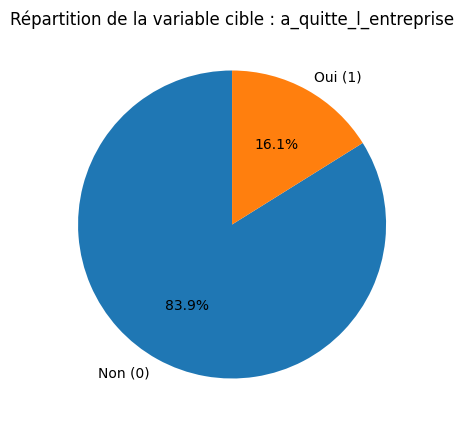

In [25]:
freq = df_analyse["a_quitte_l_entreprise"].value_counts().sort_index()

labels = ["Non (0)", "Oui (1)"]

plt.figure(figsize=(5,5))
plt.pie(
    freq.values,
    labels=labels,
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Répartition de la variable cible : a_quitte_l_entreprise")
plt.show()


<div style="border-left:4px solid #48C9B0; padding-left:15px; margin-left:5px;">
  <p style="margin-top:10px;">
      La variable cible <strong>a_quitte_l_entreprise</strong> présente un
      <strong>déséquilibre marqué</strong> :
  </p>

  <ul style="margin-left:18px; line-height:1.6; ">
    <li>
      <strong>83,9&nbsp;%</strong> des employés sont restés dans l’entreprise (<em>classe 0</em>).
    </li>
    <li>
      <strong>16,1&nbsp;%</strong> ont quitté l’entreprise (<em>classe 1</em>).
    </li>
  </ul>

  <p>
      Ce déséquilibre rend la métrique <strong>accuracy peu informative</strong> : un modèle naïf prédisant uniquement la classe majoritaire atteindrait déjà près de 84&nbsp;% de précision.
  </p>

  <p>
      Il sera donc nécessaire d’utiliser des métriques adaptées aux classes déséquilibrées (<strong>Recall, F<sub>β</sub>-score, AUC-PR</strong>) et d’orienter l’optimisation du modèle vers la détection des départs.
  </p>
</div>

<ul>
  <li>
    <h4 style="color:#48C9B0; margin-top:15px; margin-bottom:8px;">
    2.1.2 Analyse de mes variables quantitatives continues
    </h4>
  </li>
</ul>

<div style="
  border-left:5px solid #48C9B0;
  background-color:#f2fbf9;
  color:#000000;
  padding:12px 16px;
  margin:16px 0;
">
<strong>Objectif :</strong><br>
Analyser la distribution des variables numériques continues afin de caractériser leur forme, leur dispersion et la présence éventuelle de valeurs atypiques, dans le but de mieux comprendre les grandeurs mesurées et leur comportement global.
</div>
<p>
Pour chaque variable sélectionnée, deux représentations complémentaires sont utilisées :
</p>
<ul style="line-height:1.6; margin-left:18px;">
  <li>
    <strong>Histogramme avec estimation de densité (KDE) :</strong> permet d’observer la forme de la distribution (symétrie, asymétrie, multimodalité) et d’évaluer la proximité avec une distribution normale.
  </li>
  <li>
    <strong>Boxplot :</strong> synthétise la distribution à l’aide des quartiles et met en évidence les éventuelles valeurs extrêmes.
  </li>
</ul>
<p>
    Cette analyse est particulièrement adaptée aux variables mesurant des grandeurs continues (ex. âge, revenu mensuel, distance domicile–travail, pourcentage d’augmentation salariale). Les enseignements obtenus orientent le choix des transformations (log, standardisation, normalisation) et facilitent l’interprétation des relations ultérieures en analyse bivariée.
</p>

In [26]:
def bar_num_continu(col):

    clear_output(wait=True)
    serie = df_analyse[col].dropna()

    print(f"Analyse univariée — Variable numérique continue : {col}")
    print("-" * 70)

    #Statistiques descriptives
    desc = serie.describe()
    skew = serie.skew()

    stats = desc.to_frame(name="Valeur")
    stats.loc["skewness"] = skew

    display(stats)

    #Test de normalité
    stat, p = shapiro(serie)

    print("\nTest de normalité (Shapiro-Wilk)")
    print(f"Statistique = {stat:.4f}")
    print(f"p-value     = {p:.4e}")

    normalite = "NON normale" if p < 0.05 else "compatible avec une loi normale"
    print(f"→ Distribution {normalite}")

    #Visualisations
    moyenne = serie.mean()
    mediane = serie.median()

    plt.figure(figsize=(15,4))

    #Histogramme + KDE
    plt.subplot(1,2,1)
    sns.histplot(serie, kde=True)

    plt.axvline(moyenne, color="green", linestyle=":", label=f"Moyenne = {moyenne:.2f}")
    plt.axvline(mediane, color="red", linestyle="--", label=f"Médiane = {mediane}")

    plt.title(f"Distribution de {col}")
    plt.legend()

    #Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=serie)

    plt.axvline(mediane, color="red", linestyle="--")
    plt.title(f"Boxplot de {col}")

    plt.tight_layout()
    plt.show()


_ = widgets.interact(
    bar_num_continu,
    col=widgets.Dropdown(options=num_continu_cols, description="Numérique :")
)


interactive(children=(Dropdown(description='Numérique :', options=('age', 'revenu_mensuel', 'augmentation_sala…

<h5 style="color:#48C9B0;">Analyse univariée quantitative — Interprétations significatives</h5>

<div style="border-left:4px solid #48C9B0; padding-left:15px; margin-left:5px;">
    <ul>
        <li><strong>Âge :</strong> distribution proche normale → population standard sans extrêmes démographiques.</li>
        <li><strong>Revenu mensuel :</strong> médiane ≈ 6 500 ; distribution fortement asymétrique à droite → majorité de salaires “bas à moyens” et quelques hauts salaires très isolés (≈ 20000e).</li>
        <li><strong>Distance domicile–travail :</strong> médiane ≈ 7 km → employés proches géographiquement.</li> Là aussi, on retrouve quelques personnes qui travaillent loin de leur domicile.
        <li><strong>AUgmentation de salaire precedente :</strong> </li>
    </ul>
</div>

<ul>
  <li>
    <h4 style="color:#48C9B0; margin-top:15px; margin-bottom:8px;">
    2.1.3 Analyse de mes variables quantitatives discrètes
    </h4>
  </li>
</ul>

<div style="
  border-left:5px solid #48C9B0;
  background-color:#f2fbf9;
  color:#000000;
  padding:12px 16px;
  margin:16px 0;
">
<strong>Objectif :</strong><br>
    Analyser la distribution des variables numériques discrètes afin de comprendre la fréquence des valeurs entières, identifier les niveaux les plus représentés et détecter d’éventuelles asymétries ou valeurs atypiques.
</div>
<p>
    Pour chaque variable sélectionnée, deux visualisations complémentaires sont utilisées :
</p>
<ul style="line-height:1.6; margin-left:18px;">
  <li>
    <strong>Histogramme avec estimation de densité (KDE) :</strong> permet d’observer la forme globale de la distribution, les concentrations de valeurs et le degré d’asymétrie.
  </li>
  <li>
    <strong>Boxplot :</strong>
    synthétise la distribution à l’aide des quartiles et met en évidence les valeurs extrêmes potentielles.
  </li>
</ul>
<p>
    Cette analyse est particulièrement pertinente pour les variables de type <em>comptage</em> (ex. nombre d’expériences, nombre de formations, années d’ancienneté), dont la distribution est souvent asymétrique et non gaussienne. Les enseignements issus de cette étape orientent le choix des transformations éventuelles et l’intégration de ces variables dans les modèles de classification.
</p>

In [27]:
def analyse_num_discrete(col):

    clear_output(wait=True)
    serie = df_analyse[col].dropna()

    print(f"Analyse univariée — Variable numérique discrète : {col}")
    print("-" * 70)

    #Statistiques descriptives
    desc = serie.describe()
    skew = serie.skew()

    stats = desc.to_frame(name="Valeur")
    stats.loc["skewness"] = skew

    display(stats)

    #Test de normalité
    stat, p = shapiro(serie)

    print("\nTest de normalité (Shapiro-Wilk)")
    print(f"Statistique = {stat:.4f}")
    print(f"p-value     = {p:.4e}")

    normalite = "NON normale" if p < 0.05 else "compatible avec une loi normale"
    print(f"→ Distribution {normalite}")

    #Visualisations
    mediane = serie.median()
    moyenne = serie.mean()

    plt.figure(figsize=(15,4))

    #Histogramme
    plt.subplot(1,2,1)
    sns.histplot(serie, kde=False, discrete=True)

    plt.axvline(mediane, color="red", linestyle="--", label=f"Médiane = {mediane}")
    plt.axvline(moyenne, color="green", linestyle=":", label=f"Moyenne = {moyenne:.2f}")

    plt.title(f"Distribution de {col}")
    plt.legend()

    #Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=serie)

    plt.axvline(mediane, color="red", linestyle="--")
    plt.title(f"Boxplot de {col}")

    plt.tight_layout()
    plt.show()


_ = widgets.interact(
    analyse_num_discrete,
    col=widgets.Dropdown(options=num_discret_cols, description="Variable :")
)


interactive(children=(Dropdown(description='Variable :', options=('nombre_experiences_precedentes', 'annee_exp…

<h5 style="color:#48C9B0;">Analyse univariée quantitative discète  — Interprétations significatives</h5>

<div style="border-left:4px solid #48C9B0; padding-left:15px; margin-left:5px;">
    <ul>
        <li><strong>Expériences professionnelles précédentes :</strong> distribution asymétrique à droite → majorité d’employés ayant 1 ou 2 expériences avant l’entreprise.</li>
        <li><strong>Années d’expérience totale :</strong> concentrée entre 5 et 10 ans → quelques profils atypiques dépassent 40 ans d’expérience.</li>
        <li><strong>Ancienneté dans l’entreprise :</strong> très asymétrique → majorité entre 0 et 10 ans ; forte diminution au-delà, pouvant être un indicateur de turnover interne.</li>
        <li><strong>Ancienneté sur le poste actuel :</strong> distribution atypique avec deux pics vers 2.5 et 7.5 ans ; médiane ≈ 3 ans → peu de maintien long terme sur le même poste (indice de mobilité interne ou d’attrition).</li>
        <li><strong>Participation au PEE :</strong> très faible → suggère un manque d’investissement / confiance vis-à-vis de l’entreprise.</li>
        <li><strong>Nombre de formations suivies :</strong> distribution quasi normale → politique de formation relativement équitable.</li>
        <li><strong>Niveau d’éducation :</strong> distribution équilibrée → population représentative, sans dominance extrême.</li>
        <li><strong>Années depuis la dernière promotion :</strong> très asymétrique → promotions fréquentes en début de parcours, valeurs extrêmes (13–14 ans) traduisent quelques cas stagnants (point critique RH).</li>
        <li><strong>Années sous le responsable actuel :</strong> suit la logique de l’ancienneté poste → cohérence organisationnelle.</li>
    </ul>
</div>

  <ul>
    <li> <h3 style="color:#48C9B0; margin-top:15px; margin-bottom:8px;">
      2.2 Analyse univariée des variables quantitatives.
    </h3></li>
  </ul>

<ul>
  <li>
    <h4 style="color:#48C9B0; margin-top:15px; margin-bottom:8px;">
    2.2.1 Analyse de mes variables qualitatives ordinales
    </h4>
  </li>
</ul>

<div style="
  border-left:5px solid #48C9B0;
  background-color:#f2fbf9;
  color:#000000;
  padding:12px 16px;
  margin:16px 0;
">
<strong>Objectif :</strong><br>
    Étudier la distribution des variables qualitatives ordinales afin de comprendre la répartition des niveaux, identifier les valeurs dominantes et analyser la dispersion des scores ordonnés au sein du jeu de données.
</div>
<p>
    Pour chaque variable ordinale sélectionnée, deux visualisations complémentaires sont utilisées :
</p>
<ul style="line-height:1.6; margin-left:18px;">
  <li>
    <strong>Boxplot :</strong> permet de visualiser la médiane, l’étendue interquartile et les éventuelles valeurs atypiques, tout en respectant l’ordre des catégories.
  </li>
  <li>
    <strong>Diagramme de comptage (countplot) :</strong> met en évidence la fréquence de chaque niveau ordinal et facilite l’identification des modalités majoritaires ou sous-représentées.
  </li>
</ul>

<p>
    Cette analyse est particulièrement adaptée aux variables de type <em>score</em> ou <em>niveau</em> (ex. satisfaction, hiérarchie, évaluation), pour lesquelles les valeurs numériques représentent un rang et non une quantité mesurable. Les résultats obtenus orientent ensuite l’encodage à appliquer lors de la phase de modélisation.
</p>


In [28]:
def bar_quali_ordi(col):

    clear_output(wait=True)
    serie = df_analyse[col].dropna()

    print(f"Analyse univariée — Variable ordinale : {col}")
    print("-" * 60)

    #Statistiques clés
    mediane = serie.median()
    mode = serie.mode().iloc[0] if not serie.mode().empty else None

    display(pd.DataFrame({
        "Valeur": {
            "Effectif": serie.count(),
            "Modalités": serie.nunique(),
            "Médiane": mediane,
            "Mode": mode,
            "Min": serie.min(),
            "Max": serie.max()
        }
    }))

    #Visualisations
    plt.figure(figsize=(15,4))

    #Boxplot
    plt.subplot(1,2,1)
    sns.boxplot(x=serie)
    plt.axvline(mediane, color="red", linestyle="--", label=f"Médiane = {mediane}")
    plt.title(f"Boxplot — {col}")
    plt.legend()

    #Countplot
    plt.subplot(1,2,2)
    ax = sns.countplot(x=serie, order=sorted(serie.unique()))

    # Ajout des effectifs sur les barres
    for p in ax.patches:
        ax.annotate(
            f"{int(p.get_height())}",
            (p.get_x() + p.get_width() / 2, p.get_height()),
            ha="center",
            va="bottom",
            fontsize=10
        )

    plt.title(f"Répartition des modalités — {col}")
    plt.xlabel(col)
    plt.ylabel("Effectif")

    plt.tight_layout()
    plt.show()


_ = widgets.interact(
    bar_quali_ordi,
    col=widgets.Dropdown(options=cat_ord_cols, description="Variable :")
)


interactive(children=(Dropdown(description='Variable :', options=('satisfaction_employee_environnement', 'note…

<h5 style="color:#48C9B0;">Analyse univariée qualitative ordinale  — Interprétations significatives</h5>
<div style="border-left:4px solid #48C9B0; padding-left:15px; margin-left:5px;">
    <ul>
        <li><strong>Satisfaction environnement de travail :</strong> majorité des employés satisfaits, médiane ≈ 3/4, montrant un bon ressenti global.</li>
        <li><strong>Note d’évaluation précédente : Distribution preque normale autour de 3</strong>.</li>
        <li><strong>Niveau hiérarchique :</strong> valeurs concentrées entre 1 et 2 → structure professionnelle plutôt “classique” et pyramidale (beaucoup d’opérationnels, peu de managers).</li>
        <li><strong>Satisfaction par rapport à la nature du travail :</strong> distribution similaire à l’environnement, médiane à 3 → cohérence perception interne.</li>
        <li><strong>Satisfaction équipe :</strong> tendance comparable aux dimensions précédentes → ambiance de travail correcte globalement.</li>
        <li><strong>Satisfaction vie pro / vie perso :</strong> baisse significative → signal d’alerte sur l’équilibre global et le bien-être personnel.</li>
        <li><strong>Note d’évaluation actuelle :</strong> quasi constante autour de 3 → système de notation peu différenciant.</li>
        <li><strong>Niveau education :</strong> distribution normale autour de 3 ans d'etudes.</li>
        <li><strong>Fréquence de déplacement :</strong> 71 % des employés se déplacent seulement de manière occasionnelle, indiquant une activité professionnelle principalement sédentaire.</li>
    </ul>
</div>

<ul>
  <li>
    <h4 style="color:#48C9B0; margin-top:15px; margin-bottom:8px;">
    2.2.2 Analyse de mes variables qualitatives nominales
    </h4>
  </li>
</ul>

<div style="
  border-left:5px solid #48C9B0;
  background-color:#f2fbf9;
  color:#000000;
  padding:12px 16px;
  margin:16px 0;
">
<strong>Objectif :</strong><br>
  Analyser la répartition des variables qualitatives nominales afin de comprendre la structure catégorielle du jeu de données, identifier les modalités dominantes et détecter d’éventuels déséquilibres entre catégories.
</div>

<p>
  Pour chaque variable sélectionnée, deux représentations complémentaires sont proposées :
</p>

<ul style="line-height:1.6; margin-left:18px;">
  <li>
    <strong>Diagramme en barres :</strong> met en évidence les effectifs absolus par modalité et facilite la comparaison directe entre catégories.
  </li>
  <li>
    <strong>Diagramme circulaire :</strong> illustre la proportion relative de chaque modalité au sein de la variable, permettant une lecture rapide des équilibres et déséquilibres globaux.
  </li>
</ul>

<p>
  Cette analyse univariée constitue une étape essentielle pour interpréter le poids structurel des catégories et anticiper les choix d’encodage à appliquer lors de la phase de modélisation (One-Hot Encoding, Target Encoding, etc.).
</p>

In [29]:
def bar_quali_nomi(col):

    freq = df_analyse[col].value_counts()

    plt.figure(figsize=(15,4))

    #Barplot
    plt.subplot(1,2,1)
    plt.bar(freq.index, freq.values)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel("Effectif")
    plt.title(f"Distribution de {col}")

    #Pie chart
    plt.subplot(1,2,2)
    plt.pie(freq.values, labels=freq.index, autopct='%1.1f%%', startangle=90)
    plt.title(f"Répartition de {col}")
    plt.axis("equal")

    plt.tight_layout()
    plt.show()

_ = interact(
    bar_quali_nomi,
    col = widgets.Dropdown(options=cat_nom_cols, description="Variable :")
)


interactive(children=(Dropdown(description='Variable :', options=('statut_marital', 'departement', 'poste', 'd…

<h4 style="color:#48C9B0;">Analyse univariée qualitative nominale — Interprétations significatives</h4>

<div style="border-left:4px solid #48C9B0; padding-left:15px; margin-left:5px;">
    <ul>
        <li><strong>Statut marital :</strong> une majorité de salariés mariés, mais les autres statuts restent proportionnellement représentés.</li>
        <li><strong>Département :</strong> les employés sont majoritairement rattachés au département « Consulting », reflétant le cœur de l’activité interne.</li>
        <li><strong>Poste occupé :</strong> les rôles les plus fréquents sont ceux de cadres commerciaux (22.2 %), d’assistants de direction (19.9 %) et de consultants (17.6 %).</li>
        <li><strong>Domaine_etude :</strong>principalement "infra & cloud" 41.2% et "transformation digitale 31.6%.</li>
    </ul>
</div>

<ul>
  <li>
    <h4 style="color:#48C9B0; margin-top:15px; margin-bottom:8px;">
    2.2.3 Analyse de mes variables bool
    </h4>
  </li>
</ul>

<h5 style="color:#48C9B0; margin-top:20px; margin-bottom:10px;">
Analyse univariée — Variables booléennes
</h5>

<div style="
  border-left:5px solid #48C9B0;
  background-color:#f2fbf9;
  color:#000000;
  padding:12px 16px;
  margin:16px 0;
">
<strong>Objectif :</strong><br>
Visualiser la répartition des variables booléennes du jeu de données afin d’évaluer
l’équilibre des classes, détecter d’éventuels déséquilibres marqués et anticiper leurs
impacts sur les analyses statistiques et la modélisation en classification.
</div>

<p>
Pour chaque variable sélectionnée, un diagramme circulaire est utilisé afin de représenter
la proportion relative des modalités <code>0</code> et <code>1</code>. Cette visualisation permet d’identifier
rapidement les variables fortement déséquilibrées (ex. majorité écrasante de <code>0</code> ou de <code>1</code>),
qui peuvent nécessiter un traitement spécifique lors de la phase de modélisation
(poids de classes, rééchantillonnage, etc.).
</p>


In [30]:
def bar_var_bool(col):

    freq = df_analyse[col].value_counts()

    #Pie chart
    plt.pie(freq.values, labels=freq.index, autopct='%1.1f%%', startangle=90)
    plt.title(f"Répartition de {col}")
    plt.axis("equal")

    plt.tight_layout()
    plt.show()

_ = interact(
    bar_var_bool,
    col = widgets.Dropdown(options=bool_cols, description="Variable :")
)


interactive(children=(Dropdown(description='Variable :', options=('heures_supplementaires', 'genre'), value='h…

<h5 style="color:#48C9B0;">Analyse univariée booleans — Interprétations significatives</h5>
<div style="border-left:4px solid #48C9B0; padding-left:15px; margin-left:5px;">
    <ul>
        <li><strong>Heures supplémentaires :</strong> près de 2/3 des employés ne réalisent pas d’heures supplémentaires, ce qui suggère une charge de travail globalement maîtrisée.</li>
        <li><strong>Genre :</strong> répartition relativement équilibrée au sein de l’entreprise, avec environ 60 % d’hommes pour 40 % de femmes.</li>
    </ul>
</div>


<h4 style="color:#48C9B0; margin-top:20px;">Portrait de l’employé “moyen” issu de l’analyse</h4>
<div style="border-left:4px solid #48C9B0; padding-left:15px; margin-left:5px;">
<p>
    L’individu typique est plutôt satisfait de son emploi, avec une médiane de satisfaction autour de <strong>3 ou 4 sur 5</strong>.  
    Il gagne environ <strong>6 500 €</strong> par mois, a environ <strong>35 ans</strong>, dispose de <strong>10 ans d’expérience totale</strong> et travaille dans l’entreprise depuis environ <strong>5 ans</strong>.
    Il changera probablement de poste autour de <strong>3 ans d’ancienneté</strong> et restera rarement plus de <strong>10 ans</strong> dans l’entreprise.  Il aura suivi <strong>2 à 3 formations</strong> et réside à environ <strong>7.5 km</strong> du lieu de travail.  
</p>
<p>
    Il aura également bénéficié d’une <strong>promotion récente</strong>, signe d’une politique RH dynamique.
    L’employé « moyen » ne réalise <strong>pas d’heures supplémentaires</strong>, peut être aussi bien un homme qu’une femme, et se situe majoritairement dans le département <strong>« Consulting »</strong>.  
    Il occupe le plus souvent un poste de <strong>cadre commercial, d’assistant de direction ou de consultant</strong>.  
    Enfin, il se <strong>déplace rarement dans le cadre professionnel</strong>, ce qui confirme une activité centrée principalement sur un environnement de travail fixe.
    </p>
</div> 

<ul>
  <li>
    <h3 style="color:#48C9B0; margin-top:15px; margin-bottom:8px;">
    2.3 Analyse bivariée des variable quantitatives
    </h3>
  </li>
</ul>

<ul>
  <li>
    <h4 style="color:#48C9B0; margin-top:15px; margin-bottom:8px;">
    2.3.1 Heatmap des corrélations
    </h4>
  </li>
</ul>

<div style="
  border-left:5px solid #48C9B0;
  background-color:#f2fbf9;
  color:#000000;
  padding:12px 16px;
  margin:16px 0;
">
<strong>Objectif :</strong><br>
        Synthétiser les relations entre l’ensemble des variables numériques
        en identifiant les corrélations les plus marquées, les variables
        redondantes et les structures globales du jeu de données.
    </p>
</div>

<p>
    La heatmap représente la <strong>matrice de corrélation de Pearson</strong>,
    qui mesure la <em>force et le sens</em> des relations
    <strong>linéaires</strong> entre les variables numériques.
    Chaque cellule correspond à un coefficient de corrélation compris
    entre <strong>-1</strong> (corrélation négative parfaite) et
    <strong>+1</strong> (corrélation positive parfaite).
</p>

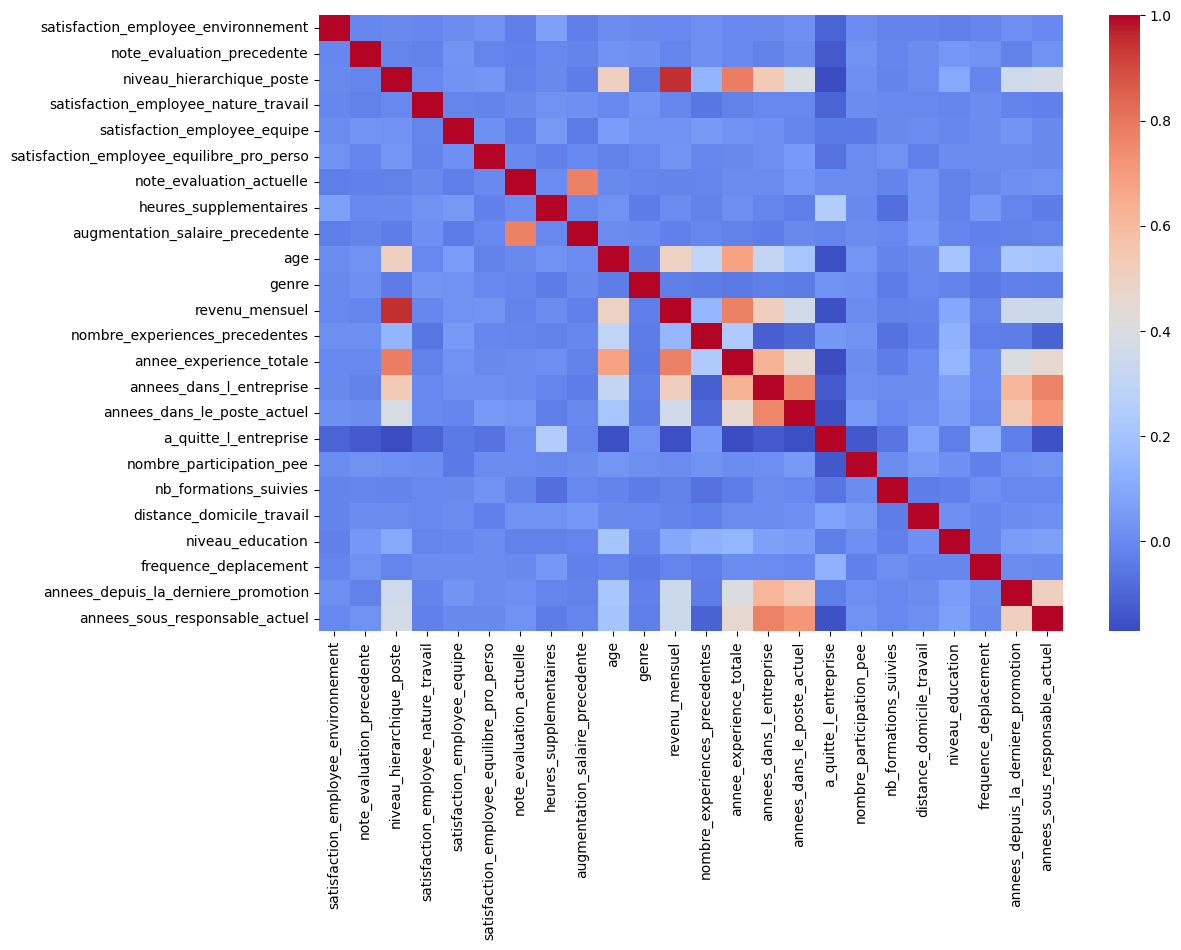

In [31]:
# Sélection des variables numériques
# On conserve uniquement les colonnes de type numérique
# afin de calculer des corrélations linéaires pertinentes
corr_matrix = df_analyse[
    df_analyse.select_dtypes(include=["float64", "int64", "int32"]).columns.tolist()
].corr()

# Visualisation de la matrice de corrélation
# Chaque cellule représente la corrélation linéaire entre deux variables numériques
# Les valeurs sont comprises entre -1 et 1 :
# - proche de 1  → forte corrélation positive
# - proche de -1 → forte corrélation négative
# - proche de 0  → faible corrélation linéaire
plt.figure(figsize=(12,8))
sns.heatmap(
    corr_matrix,
    annot=False,      # annotations désactivées pour plus de lisibilité
    cmap="coolwarm"   # palette divergente pour distinguer corrélations positives et négatives
)
plt.show()


<h4 style="color:#48C9B0;">Synthèse — Analyse des corrélations entre variables numériques</h4>

<div style="border-left:4px solid #48C9B0; padding-left:15px; margin-left:5px; margin-bottom:10px;">
  <p style="margin-bottom:8px;">
  L’analyse de la matrice de corrélation met en évidence des relations principalement faibles avec la variable cible, mais des dépendances fortes entre plusieurs variables explicatives. Les points clés sont résumés ci-dessous.
  </p>
  <ul style="line-height:1.6; margin-bottom:6px;">
    <li>
      <strong>Corrélation avec la cible <code>a_quitte_l_entreprise</code> :</strong><br>
      Les corrélations sont globalement faibles (<code>|r| &lt; 0.25</code>), ce qui suggère que le départ de l’entreprise est un phénomène multifactoriel et peu linéaire :
      <ul style="margin-top:4px; margin-left:15px;">
        <li><code>heures_supplementaires</code> : corrélation positive modérée (~0.25) → les employés qui font des heures supplémentaires quittent un peu plus souvent l’entreprise.</li>
        <li><code>age</code>, <code>revenu_mensuel</code>, <code>niveau_hierarchique_poste</code>, <code>annee_experience_totale</code>, <code>annees_dans_l_entreprise</code>, <code>annees_dans_le_poste_actuel</code> : légères corrélations négatives → les profils plus âgés, plus expérimentés et plus seniors semblent légèrement moins susceptibles de quitter.</li>
        <li><code>satisfaction_employee_*</code> : corrélations négatives faibles (environnement, nature du travail, équilibre vie pro/perso) → une moindre satisfaction augmente le risque de départ, mais l’effet reste modéré.</li>
      </ul>
    </li>
    <li>
      <strong>Multicolinéarité entre variables explicatives :</strong><br>
      Plusieurs couples de variables présentent des corrélations très fortes, ce qui indique une redondance d’information :
      <ul style="margin-top:4px; margin-left:15px;">
        <li><code>revenu_mensuel</code> ↔ <code>niveau_hierarchique_poste</code> : corrélation très forte (~0.95).</li>
        <li><code>revenu_mensuel</code> ↔ <code>annee_experience_totale</code> et <code>age</code> : corrélations fortes (~0.50–0.77).</li>
        <li><code>annee_experience_totale</code> ↔ <code>annees_dans_l_entreprise</code> ↔ <code>annees_dans_le_poste_actuel</code> ↔ <code>annees_depuis_la_derniere_promotion</code> ↔ <code>annes_sous_responsable_actuel</code> : groupe de variables fortement corrélées (souvent &gt; 0.6).</li>
      </ul>
      Ces relations traduisent un noyau cohérent autour de l’expérience, de l’ancienneté, du niveau hiérarchique et du salaire.
    </li>
  </ul>
  <p>
      L’analyse met également en évidence l’existence d’un
      <strong>système d’évaluation par notes</strong>
      directement <strong>corrélé à l’augmentation de salaire</strong>.
      Les individus ayant obtenu des notes d’évaluation plus élevées
      bénéficient plus fréquemment d’augmentations salariales,
      ce qui suggère un mécanisme d’attribution des augmentations
      fortement basé sur la performance évaluée.
  </p>
</div>

<ul>
  <li>
    <h4 style="color:#48C9B0; margin-top:15px; margin-bottom:8px;">
    2.3.2 Scatterplot entre variable quantitatives dicrètes + continues et quantitatives uniquement continues
    </h4>
  </li>
</ul>

<div style="
  border-left:5px solid #48C9B0;
  background-color:#f2fbf9;
  color:#000000;
  padding:12px 16px;
  margin:16px 0;
">
<strong>Objectif :</strong><br>
    Explorer visuellement les relations entre les variables numériques afin d’identifier la forme des relations (linéaire, non linéaire ou absence de lien) et de détecter d’éventuelles tendances ou anomalies.
</div>
<p>
    L’axe <strong>X</strong> peut correspondre à une variable numérique <em>discrète ou continue</em>, tandis que l’axe <strong>Y</strong> est réservé aux variables numériques continues afin de garantir une interprétation pertinente du nuage de points.
</p>


In [32]:
#Fonction d’affichage
def afficher_ipywidgets(col_x, col_y):
    if col_x == col_y:
        print("Choisis deux colonnes différentes.")
        return

    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df_analyse[col_x], y=df_analyse[col_y])
    plt.title(f"{col_x} vs {col_y}")
    plt.tight_layout()
    plt.show()

#Widgets interactifs
_ = widgets.interact(
    afficher_ipywidgets,
    col_x = widgets.Dropdown(options=sorted(set(num_discret_cols) | set(num_continu_cols)), description="X :"),
    col_y = widgets.Dropdown(options=num_continu_cols, description="Y :")
)

interactive(children=(Dropdown(description='X :', options=('age', 'annee_experience_totale', 'annees_dans_l_en…

<h4 style="color:#48C9B0;">Synthèse — Analyse des corrélations entre variables numériques</h4>

<div style="border-left:4px solid #48C9B0; padding-left:15px; margin-left:5px; margin-bottom:10px;">
    <p style="margin-bottom:8px;">
        L’analyse des corrélations entre les variables numériques met en évidence
        plusieurs relations intéressantes.
    </p>
    <ul style="margin-left:18px; line-height:1.6;">
        <li>
            Des <strong>relations linéaires positives</strong> sont observées entre
            <em>l’âge</em> et les variables liées au parcours dans l’entreprise,
            notamment <em>l’ancienneté dans le poste</em>,
            <em>l’ancienneté dans l’entreprise</em>,
            <em>l’expérience totale</em> ainsi que le
            <em>nombre de promotions</em>.
            Ces relations sont cohérentes d’un point de vue métier.
        </li>
        <li>
            Le <strong>revenu</strong> présente également une
            <strong>corrélation positive avec l’âge</strong>,
            suggérant une progression salariale globale au fil de la carrière.
        </li>
        <li>
            En revanche, la variable <strong>augmentation de salaire</strong>
            ne montre pas de relation linéaire marquée ni avec l’âge,
            ni avec l’ancienneté dans l’entreprise,
            ni avec l’ancienneté dans le poste,
            ce qui suggère un mécanisme d’attribution plus complexe ou ponctuel.
        </li>
    </ul>
</div>


<ul>
  <li>
    <h3 style="color:#48C9B0; margin-top:15px; margin-bottom:8px;">
    2.4 Analyse bivariée entre variables quantitatives
    </h3>
  </li>
</ul>

<ul>
    <li>
        <h4 style="color:#48C9B0; margin-top:15px; margin-bottom:8px;">
        2.4.1 Heatmap des corrélations
        </h4>
    </li>
</ul>

<div style="
    border-left:5px solid #48C9B0;
    background-color:#f8fdfc;
    color:#000000;
    padding:12px 16px;
    margin:16px 0;
">
    <strong>Objectif :</strong><br>
    Mesurer l’intensité des relations entre les variables catégorielles
    afin d’identifier d’éventuelles dépendances statistiques et des
    redondances informationnelles au sein du jeu de données.
</div>

<p>
    La heatmap repose sur le <strong>coefficient de Cramér (Cramér’s V)</strong>,
    une mesure d’association dérivée du test du <strong>Khi²</strong>,
    spécifiquement adaptée à l’analyse des relations entre variables
    catégorielles. Ce coefficient est compris entre <strong>0</strong>
    (indépendance totale) et <strong>1</strong> (association parfaite).
</p>

<p>
    Contrairement aux coefficients de corrélation utilisés pour les variables
    numériques, le Cramér’s V ne renseigne pas sur la direction d’une relation
    mais uniquement sur la <strong>force globale de l’association</strong>
    entre les modalités.
</p>

<ul style="margin-left:18px; line-height:1.6;">
    <li>
        Des valeurs proches de <strong>0</strong> indiquent une faible
        association entre les variables catégorielles.
    </li>
    <li>
        Des valeurs plus élevées traduisent une
        <strong>dépendance statistique</strong> potentiellement informative.
    </li>
    <li>
        La heatmap facilite l’identification de
        <strong>variables catégorielles redondantes</strong>,
        susceptibles d’apporter une information similaire.
    </li>
</ul>

<p>
    Cette analyse constitue une étape clé pour orienter les choix
    d’encodage des variables catégorielles et limiter les effets de
    redondance ou de bruit dans les modèles de machine learning.
</p>


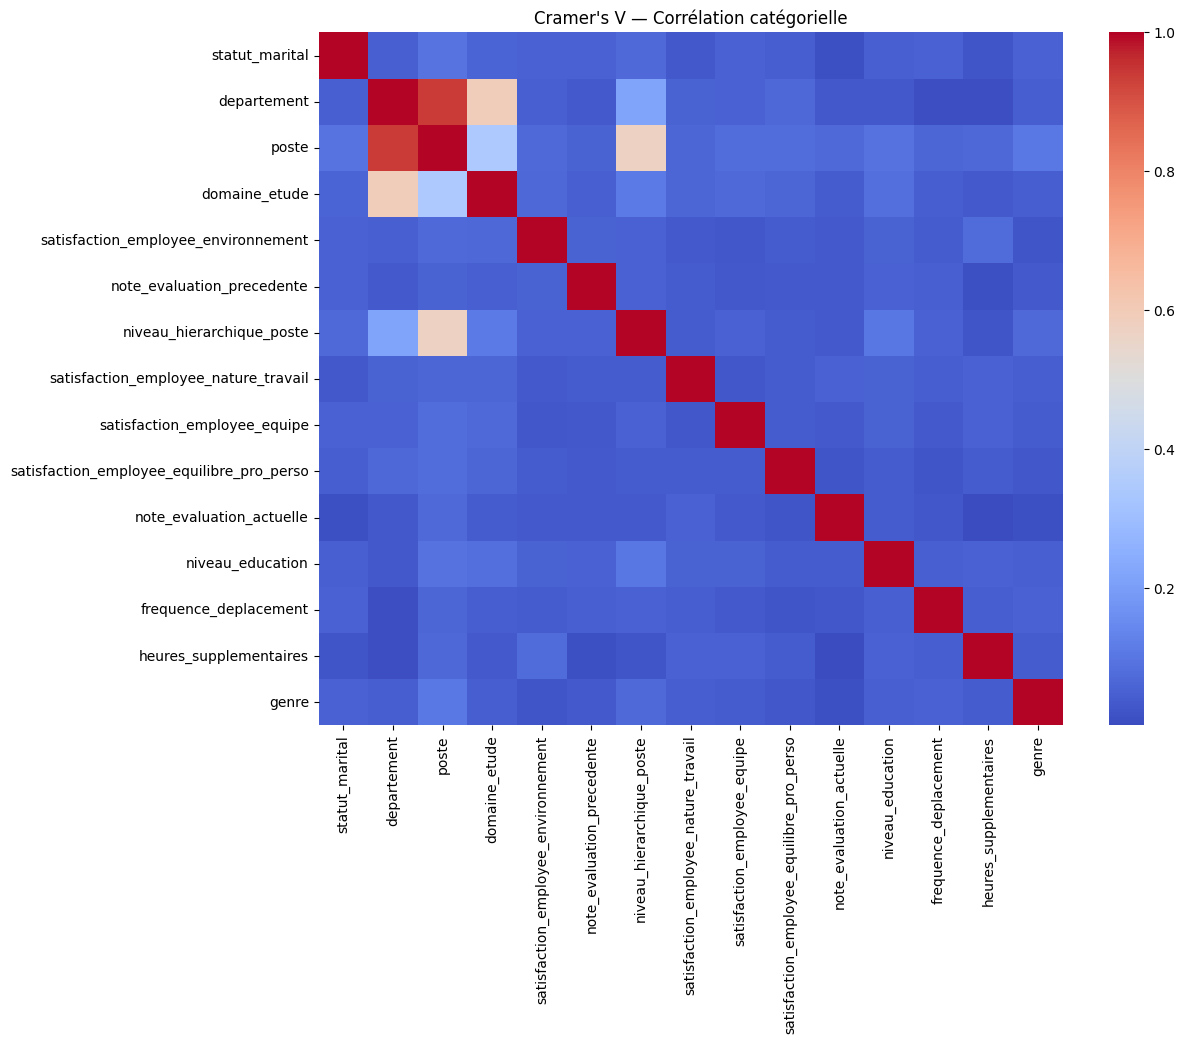

In [33]:
def cramers_v(x, y):
    # Calcul du coefficient de Cramér (Cramér's V)
    # Mesure l’intensité de l’association entre deux variables catégorielles.
    # Contrairement à une corrélation numérique, Cramér’s V repose sur un test du χ²
    # et est borné entre 0 (aucune association) et 1 (association forte).

    # Table de contingence entre les deux variables catégorielles
    table = pd.crosstab(x, y)

    # Calcul de la statistique du chi-deux à partir de la table de contingence
    chi2 = chi2_contingency(table)[0]

    # Taille totale de l’échantillon
    n = table.sum().sum()

    # Dimensions de la table (nombre de modalités)
    r, k = table.shape

    # Formule de Cramér’s V
    # La normalisation par min(r-1, k-1) permet de comparer des variables
    # avec des nombres de modalités différents
    return np.sqrt(chi2 / (n * (min(r-1, k-1))))


# Création d’une matrice vide pour stocker les valeurs de Cramér’s V
# Lignes et colonnes : variables catégorielles
corr_cat = pd.DataFrame(index=cat_cols, columns=cat_cols)

# Calcul de Cramér’s V pour chaque paire de variables catégorielles
# Permet d’identifier des redondances ou des dépendances fortes
for c1 in cat_cols:
    for c2 in cat_cols:
        corr_cat.loc[c1, c2] = cramers_v(
            df_analyse[c1],
            df_analyse[c2]
        )

# Visualisation sous forme de heatmap
# Permet une lecture rapide des associations fortes entre variables catégorielles
plt.figure(figsize=(12, 9))
sns.heatmap(
    corr_cat.astype(float),
    cmap="coolwarm"
)

# Titre explicite pour l’analyse exploratoire
plt.title("Cramer's V — Corrélation catégorielle")
plt.show()


<h4 style="color:#48C9B0;">Synthèse analyse bivariée catégorielle — Cramer’s V</h4>

<div style="border-left:4px solid #48C9B0; padding-left:15px; margin-left:5px; margin-bottom:10px;">
  <p>
      La heatmap de <strong>Cramér’s V</strong> met en évidence des niveaux
      d’association contrastés entre les variables catégorielles analysées.
  </p>

  <ul style="margin-left:18px; line-height:1.6;">
      <li>
          La variable <strong>statut marital</strong> et le <strong>genre</strong> présentent des
          <strong>associations très faibles</strong> avec l’ensemble des autres
          variables (<em>département</em>, <em>poste</em>, <em>domaine d’étude</em>),
          suggérant une quasi-indépendance statistique.
      </li>
      <li>
          Une <strong>association très forte</strong> est observée entre
          <strong>le département et le poste</strong>,
          traduisant une structuration organisationnelle marquée :
          certains postes sont majoritairement concentrés dans des départements spécifiques.
      </li>
      <li>
          Le <strong>domaine d’étude</strong> présente une
          <strong>association modérée à forte</strong> avec le
          <strong>département</strong>, indiquant une cohérence entre les
          formations et les domaines d’activité des équipes.
      </li>
      <li>
          L’association entre <strong>poste</strong> et
          <strong>domaine d’étude</strong> est
          <strong>modérée</strong>, suggérant que si le niveau de formation
          influence l’accès à certains postes, d’autres facteurs interviennent
          également (expérience, mobilité interne, promotions).
      </li>
  </ul>

  <p>
      Globalement, cette analyse révèle une structuration logique des variables
      professionnelles, tandis que les variables personnelles apparaissent
      largement indépendantes du reste du système.
  </p>

</div>


<ul>
    <li>
        <h4 style="color:#48C9B0; margin-top:15px; margin-bottom:8px;">
        2.4.2 Analyse bivariée — Variables catégorielles (widgets interactifs)
        </h4>
    </li>
</ul>

<div style="
    border-left:5px solid #48C9B0;
    background-color:#f8fdfc;
    color:#000000;
    padding:12px 16px;
    margin:16px 0;
">
    <strong>Objectif :</strong><br>
    Analyser les relations entre deux variables catégorielles afin d’identifier d’éventuelles dépendances statistiques, des structures communes entre modalités et des redondances informationnelles.
</div>

<p>
    L’analyse repose sur la construction d’une <strong>table de contingence</strong>, affichant les effectifs pour chaque combinaison de modalités, suivie d’une
    <strong>heatmap des effectifs</strong> facilitant la lecture visuelle des associations.
</p>

<ul style="margin-left:18px; line-height:1.6;">
    <li>
        Les cellules les plus foncées indiquent des combinaisons de modalités fréquemment observées.
    </li>
    <li>
        Les répartitions homogènes suggèrent une <strong>indépendance</strong> entre les variables.
    </li>
    <li>
        Des concentrations marquées peuvent révéler une <strong>dépendance structurelle</strong> ou un lien organisationnel.
    </li>
</ul>

In [34]:
def analyse_cat_cat(col1, col2):

    if col1 == col2:
        print("Choisir deux colonnes différentes.")
        return

    table = pd.crosstab(df_analyse[col1], df_analyse[col2])

    plt.figure(figsize=(7,5))
    sns.heatmap(
        table,
        annot=True,      
        fmt="d",         
        cmap="Blues"
    )
    plt.title(f"{col1} vs {col2}")
    plt.tight_layout()
    plt.show()


_ = interact(
    analyse_cat_cat,
    col1 = widgets.Dropdown(options=cat_cols),
    col2 = widgets.Dropdown(options=cat_cols)
)


interactive(children=(Dropdown(description='col1', options=('statut_marital', 'departement', 'poste', 'domaine…

<h4 style="color:#48C9B0;">Analyse significative</h4>

<div style="border-left:4px solid #48C9B0; padding-left:15px; margin-left:5px; margin-bottom:10px;">
  <p>
    <ul style="margin-left:18px; line-height:1.6;">
      <li>
        Globalement, la <strong>satisfaction vis-à-vis de l’environnement de travail</strong> des employés apparaît étroitement liée à plusieurs dimensions professionnelles.
        Elle est fortement associée au <strong>poste occupé</strong> et au <strong>département d’appartenance</strong>, mettant en évidence des disparités organisationnelles selon les fonctions et les contextes de travail. Elle présente également des liens notables avec le <strong>domaine d’étude</strong> ainsi qu’avec certaines contraintes professionnelles, telles que la <strong>fréquence de déplacement</strong>, suggérant que la nature des missions et des responsabilités influence la perception de l’environnement de travail.
      </li>
      <li>
        La note d’évaluation est <strong>fortement associée au poste occupé</strong> et au <strong>niveau hiérarchique</strong> : les niveaux hiérarchiques intermédiaires et supérieurs concentrent majoritairement des notes élevées, suggérant des attentes et des critères d’évaluation adaptés aux responsabilités exercées.
        Des différences significatives sont également observées selon le <strong>domaine d’étude</strong>, en particulier pour les profils techniques et digitaux (<em>infra &amp; cloud</em>,<em>transformation digitale</em>), qui présentent des performances évaluées globalement plus élevées.
      </li>
      <li>
        Les postes les plus représentés au sein de l’entreprise (<strong>assistant de direction</strong>, <strong>cadre commercial</strong>, <strong>consultant</strong>) sont majoritairement occupés par des employés disposant d’un <strong>niveau d’éducation intermédiaire à élevé</strong> (<em>niveaux 3 et 4</em>), ce qui suggère l’existence d’un socle de formation relativement exigeant pour l’accès à ces fonctions.
      </li>
    </ul>
  </p>
</div>


<ul>
  <li>
    <h3 style="color:#48C9B0; margin-top:15px; margin-bottom:8px;">
    2.5 Analyse bivariée entre les variables qualitatives et les variables quantitatives
    </h3>
  </li>
</ul>

<p>
  Étudier l’influence des variables catégorielles, qu’elles soient <strong>ordinales ou nominales</strong>, sur les variables numériques, <strong>continues ou discrètes</strong>, afin d’identifier des différences de distributions et des effets significatifs entre groupes.
</p>

<ul>
  <li>
    <h4 style="color:#48C9B0; margin-top:15px; margin-bottom:8px;">
    2.5.1 Analyse entre variables numériques ou catégorielles et la cible
    </h4>
  </li>
</ul>

<div style="
  border-left:5px solid #48C9B0;
  background-color:#f8fdfc;
  color:#000000;
  padding:14px 18px;
  margin:18px 0;
">
<strong>Objectif :</strong><br>
    Analyser l’influence des variables numériques sur la probabilité de départ (<code>a_quitte_l_entreprise</code>) en comparant la distribution des valeurs entre les employés restés et ceux ayant quitté l’entreprise.
</div>

<p>
    Cette analyse repose sur deux visualisations complémentaires :
</p>

<ul style="margin-left:18px; line-height:1.6;">
  <li>
    <strong>Boxplot</strong> : permet d’identifier les différences de médiane, de dispersion et la présence d’outliers entre les deux classes.
  </li>
  <li>
    <strong>Violin plot</strong> : met en évidence la forme complète de la distribution (densité) et facilite la comparaison des comportements atypiques.
  </li>
</ul>

<p>
    Un widget interactif permet d’explorer dynamiquement l’ensemble des variables numériques, afin d’identifier celles dont la distribution diffère le plus selon le statut de départ, et qui constituent ainsi de bons candidats pour la modélisation.
</p>


In [35]:
def analyse_cible_num(col_cible, col_num):

    plt.figure(figsize=(15,4))

    plt.subplot(1,2,1)
    sns.boxplot(
        x=df_analyse[col_cible],
        y=df_analyse[col_num]
    )

    plt.subplot(1,2,2)
    sns.violinplot(
        x=df_analyse[col_cible],
        y=df_analyse[col_num],
        inner="quartile"
    )
    plt.show()

# Widget interactif
_= widgets.interact(
    analyse_cible_num,
    col_cible=widgets.Dropdown(options=col_target, description="Cible :"),
    col_num=widgets.Dropdown(options=sorted(set(num_continu_cols) | set(num_discret_cols)), description="Numérique :")
)


interactive(children=(Dropdown(description='Cible :', options=('a_quitte_l_entreprise',), value='a_quitte_l_en…

<h4 style="color:#48C9B0;">Analyse significative</h4>

<div style="border-left:4px solid #48C9B0; padding-left:15px; margin-left:5px; margin-bottom:10px;">
    <ul style="margin-left:18px; line-height:1.6;">
        <li>
            L’ancienneté dans l’entreprise est un facteur <strong>discriminant fort</strong> : plus l’employé est ancien, moins il est susceptible de quitter l’entreprise.
            Cette variable est donc hautement pertinente pour la modélisation du risque de départ et justifie son intégration prioritaire dans le modèle prédictif.
        </li>
        <li>
            Une distance domicile–travail élevée semble associée à un <strong>risque accru</strong> de départ. Les trajets longs peuvent générer fatigue, déséquilibre vie pro/perso et insatisfaction, augmentant la probabilité d’attrition.
        </li>
        <li>
            Le nombre d’expériences précédentes apparaît comme un <strong>signal fort</strong> de mobilité professionnelle : plus un employé a déjà changé d’employeur, plus il est susceptible de repartir.
        </li>
        <li>
            Un niveau de rémunération plus faible est clairement associé à un <strong>risque accru</strong> de départ. Le salaire agit comme un facteur de rétention majeur, en particulier lorsqu’il est combiné à d’autres contraintes (distance, charge de travail, ancienneté sans promotion).
        </li>
    </ul>
</div>

In [36]:
def analyse_cible_cat(col_cible, col_num):

    ax = pd.crosstab(
        df_analyse[col_cible],
        df_analyse[col_num],
        normalize="index"
    ).plot(kind="bar", stacked=True, figsize=(7,5))

    ax.set_ylabel("Proportion")
    ax.set_xlabel(col_cible)
    ax.set_title(f"{col_num} selon {col_cible}")

    plt.legend(
        title=col_num,
        loc="upper center",
        bbox_to_anchor=(0.5, -0.2),
        ncol=3,
        frameon=False
    )

    plt.tight_layout()
    plt.show()

# Widget interactif
_ = widgets.interact(
    analyse_cible_cat,
    col_cible=widgets.Dropdown(options=col_target, description="Cible :"),
    col_num=widgets.Dropdown(options=sorted(set(bool_cols) | set(cat_nom_cols)| set(cat_ord_cols)) , description="Numérique :")
)


interactive(children=(Dropdown(description='Cible :', options=('a_quitte_l_entreprise',), value='a_quitte_l_en…

<h4 style="color:#48C9B0;">Analyse significative</h4>

<div style="border-left:4px solid #48C9B0; padding-left:15px; margin-left:5px; margin-bottom:10px;">
  <ul style="margin-left:18px; line-height:1.6;">
    <li>
      Les départs concernent proportionnellement davantage le
      <strong>département commercial</strong>, tandis que le
      <strong>consulting</strong> reste majoritaire parmi les employés restés.
    </li>
    <li>
      Les employés ayant quitté l’entreprise présentent plus fréquemment des
      <strong>niveaux de déplacement élevés</strong>, suggérant un lien potentiel
      entre contraintes de mobilité et départ.
    </li>
    <li>
      Les employés ayant quitté l’entreprise déclarent nettement plus souvent
      des <strong>heures supplémentaires</strong>, indiquant une association
      entre surcharge de travail et départ.
    </li>
    <li>
      Les départs concernent principalement les
      <strong>niveaux hiérarchiques les plus bas</strong>, suggérant une moindre
      stabilité pour ces positions.
    </li>
    <li>
      Les départs touchent davantage les postes
      <strong>opérationnels et commerciaux</strong>, comparativement aux
      fonctions managériales ou techniques senior.
    </li>
    <li>
      Les employés ayant quitté l’entreprise présentent plus fréquemment des
      <strong>niveaux de satisfaction faibles</strong> vis-à-vis de leur
      environnement de travail.
    </li>
    <li>
      Les employés ayant quitté l’entreprise sont proportionnellement plus
      souvent <strong>célibataires</strong>, tandis que les employés
      <strong>mariés</strong> sont davantage représentés parmi ceux restés,
      suggérant un effet possible de stabilité personnelle.
    </li>
  </ul>
</div>

<ul>
  <li>
    <h4 style="color:#48C9B0; margin-top:15px; margin-bottom:8px;">
    2.5.2 Analyse entre variables numériques et catégorielles
    </h4>
  </li>
</ul>

In [37]:
def analyse_cat_num(col_cat, col_num):

    plt.figure(figsize=(15,4))

    plt.subplot(1,2,1)
    sns.boxplot(
        x=df_analyse[col_cat],
        y=df_analyse[col_num]
    )

    plt.subplot(1,2,2)
    sns.violinplot(
        x=df_analyse[col_cat],
        y=df_analyse[col_num],
        inner="quartile"
    )
    plt.show()

# Widget interactif
_= widgets.interact(
    analyse_cat_num,
    col_cat=widgets.Dropdown(options=cat_cols, description="Catégorie :"),
    col_num=widgets.Dropdown(options=num_cols, description="Numérique :")
)


interactive(children=(Dropdown(description='Catégorie :', options=('statut_marital', 'departement', 'poste', '…

<div style="
  border-left:5px solid #48C9B0;
  background-color:#f8fdfc;
  padding:12px 16px;
  margin:16px 0;
  color:#000000;
">
<strong>Objectif :</strong><br>
<span style="color:#000000;">
  Analyser l’influence d’une variable catégorielle sur une variable numérique en combinant plusieurs visualisations afin de déterminer si les différences observées entre catégories sont significatives et interprétables.
</span>
</div>

<ul style="margin-left:18px; line-height:1.6;">
  <li>
    <strong>Taille d’effet</strong> : le coefficient η² permet d’évaluer l’intensité de la relation entre la variable catégorielle et la variable numérique, au-delà de la seule significativité statistique.
  </li>
</ul>

<p>
<strong>Conclusion attendue :</strong><br>
Cette analyse permet de déterminer si la variable catégorielle étudiée a un impact significatif sur la variable numérique, et d’en apprécier l’ampleur, fournissant ainsi des éléments objectifs pour l’interprétation et la modélisation ultérieure.
</p>


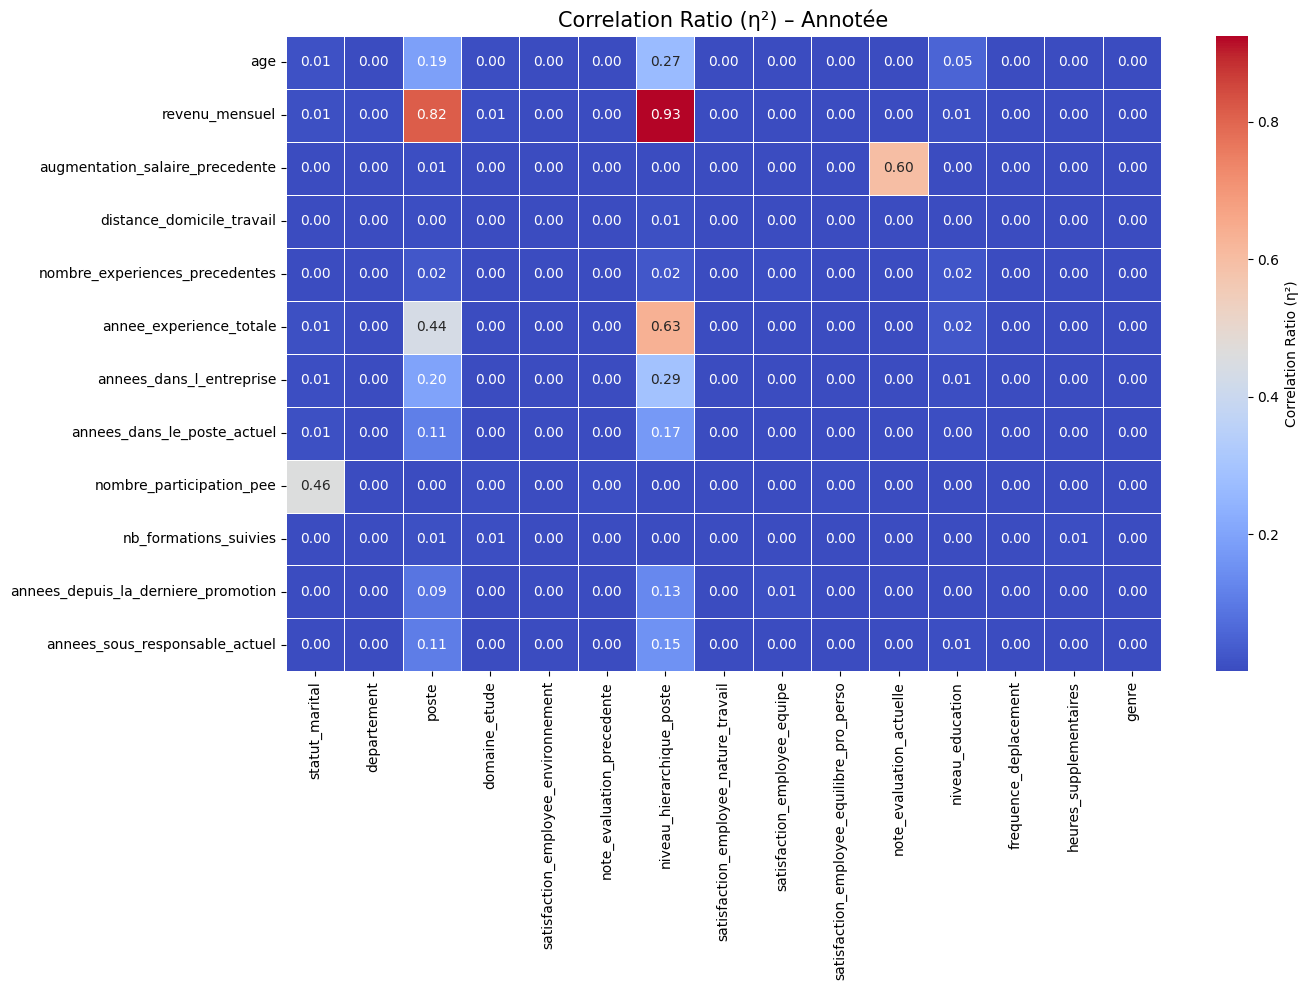

In [38]:
def correlation_ratio(categories, measurements):
    # Calcul du coefficient η² (correlation ratio)
    # Mesure la part de la variance d’une variable numérique
    # expliquée par une variable catégorielle.
    # Contrairement à une corrélation classique, η² capte des relations non linéaires.

    # Liste des catégories uniques
    cats = np.unique(categories)

    # Moyenne globale de la variable numérique
    y_mean = np.mean(measurements)

    # Numérateur : variance inter-groupes (entre catégories)
    numerator = 0

    # Dénominateur : variance totale de la variable numérique
    denominator = np.sum((measurements - y_mean) ** 2)

    # Pour chaque catégorie, on mesure l’écart entre
    # la moyenne de la catégorie et la moyenne globale,
    # pondéré par la taille du groupe
    for cat in cats:
        y_cat = measurements[categories == cat]
        numerator += len(y_cat) * (np.mean(y_cat) - y_mean) ** 2

    # Cas limite : si la variance totale est nulle,
    # la variable numérique n’apporte aucune information
    if denominator == 0:
        return 0

    # η² = part de variance expliquée par la variable catégorielle
    return numerator / denominator


# Création d’une matrice vide pour stocker les η²
# Lignes : variables numériques
# Colonnes : variables catégorielles
corr_ratio_matrix = pd.DataFrame(
    index=num_cols,
    columns=cat_cols,
    dtype=float
)

# Calcul du correlation ratio pour chaque couple
# (variable numérique, variable catégorielle)
for num_col in num_cols:
    for cat_col in cat_cols:
        corr_ratio_matrix.loc[num_col, cat_col] = correlation_ratio(
            df_analyse[cat_col].astype(str).values,  # catégories
            df_analyse[num_col].values               # mesures numériques
        )

# Visualisation sous forme de heatmap
# Permet d’identifier rapidement quelles variables catégorielles
# expliquent le mieux la variance des variables numériques
plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_ratio_matrix.astype(float),
    cmap="coolwarm",
    annot=True,              # affichage des valeurs numériques
    fmt=".2f",               # format lisible
    linewidths=0.4,
    cbar_kws={"label": "Correlation Ratio (η²)"}
)

# Titre explicite pour la soutenance
plt.title("Correlation Ratio (η²) – Annotée", fontsize=15)

plt.tight_layout()
plt.show()


<h4 style="color:#48C9B0;">Synthèse — Correlation Ratio (η²) Numérique ↔ Catégoriel</h4>

<div style="border-left:4px solid #48C9B0; padding-left:15px; margin-left:5px; margin-bottom:10px;">

<h4 style="color:#48C9B0;">Relations très explicatives (η² élevé)</h4>
<ul style="margin-left:18px; line-height:1.6;">
  <li>
    <strong>Revenu mensuel ↔ Niveau hiérarchique du poste (η² ≈ 0.93)</strong><br>
    Le salaire est presque entièrement déterminé par le niveau hiérarchique.
    Ces deux variables portent une information très redondante.
  </li>
  <li>
    <strong>Année d’expérience totale ↔ Niveau hiérarchique du poste (η² ≈ 0.63)</strong><br>
    La progression hiérarchique est fortement liée à l’expérience cumulée.
  </li>
  <li>
    <strong>Augmentation de salaire précédente ↔ Note d’évaluation actuelle (η² ≈ 0.60)</strong><br>
    Les performances évaluées influencent directement la politique d’augmentation.
  </li>
</ul>

<p> 
    <strong>Implication :</strong> ces variables ne sont pas indépendantes.
    Un modèle peut sur-pondérer la même information si elles sont conservées telles quelles.
</p>

<h4 style="color:#48C9B0;">Relations modérées (information complémentaire)</h4>
<ul style="margin-left:18px; line-height:1.6;">
  <li>Ancienneté dans l’entreprise ↔ Niveau hiérarchique (η² ≈ 0.29)</li>
  <li>Âge ↔ Niveau hiérarchique (η² ≈ 0.27)</li>
  <li>Ancienneté dans le poste ↔ Niveau hiérarchique (η² ≈ 0.17)</li>
  <li>Années sous responsable ↔ Niveau hiérarchique (η² ≈ 0.15)</li>
</ul>

<p>
    Ces variables décrivent des <strong>trajectoires de carrière cohérentes</strong>.
    Elles apportent une information utile mais non dominante.
</p>

<h4 style="color:#48C9B0;">3. Relations faibles ou quasi nulles</h4>
<ul style="margin-left:18px; line-height:1.6;">
  <li>Département, domaine d’étude, statut marital, genre</li>
  <li>Satisfaction (équipe, environnement, équilibre pro/perso)</li>
  <li>Distance domicile–travail, heures supplémentaires</li>
</ul>

<p>
    Ces variables expliquent peu la variance des variables numériques prises isolément, mais restent <strong>essentielles pour la prédiction de l’attrition</strong> via des effets non linéaires et des interactions (bien captées par XGBoost).
</p>

<h4 style="color:#48C9B0;">Conclusion opérationnelle</h4>
<p>
    Le <strong>niveau hiérarchique du poste</strong> apparaît comme le <strong>pivot structurel</strong> du système RH : il concentre salaire, expérience et progression.
</p>
<p>
    L’analyse par le coefficient de corrélation η² met en évidence un effet très fort du poste et du niveau hiérarchique sur le revenu et l’expérience totale. À l’inverse, les variables démographiques et de satisfaction présentent un pouvoir explicatif quasi nul. Ces résultats confirment une structuration principalement organisationnelle des variables numériques, cohérente avec la logique métier.
</p>

<ul>
  <li>
    <h2 style="color:#48C9B0; margin-top:15px; margin-bottom:8px;">
    3. Préparation des données pour la modélisation (Feature Engineering)
    </h2>
  </li>
</ul>

In [39]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc
from sklearn.metrics import precision_score, make_scorer, fbeta_score, precision_recall_curve, recall_score, accuracy_score
from sklearn.base import clone


from xgboost import XGBClassifier

import shap

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE



<ul>
  <li>
    <h3 style="color:#48C9B0; margin-top:15px; margin-bottom:8px;">
    3.1 Création de variables métiers et ratios
    </h3>
  </li>
</ul>

In [40]:
def feature_engineering(df):
    df = df.copy()

    # 1. SATISFACTION GLOBALE
    # Agrégation des différentes dimensions de satisfaction en un score moyen.
    # Objectif : réduire la redondance des variables et capturer une perception globale
    # du bien-être au travail, plus robuste qu’un score isolé.
    satisfaction_cols = [
        "satisfaction_employee_environnement",
        "satisfaction_employee_nature_travail",
        "satisfaction_employee_equipe",
        "satisfaction_employee_equilibre_pro_perso",
    ]
    df["satisfaction_moyenne"] = df[satisfaction_cols].mean(axis=1)

    # 2. ENGAGEMENT FINANCIER (PEE) — FORME NON LINÉAIRE
    # Mesure l’intensité de participation au PEE normalisée par l’ancienneté.
    # Permet de distinguer un engagement réel d’un simple effet mécanique du temps.
    # La valeur est bornée entre 0 et 1 et modélise un effet de saturation :
    # les premières participations sont plus informatives que les suivantes.
    df["nonlineaire_participation_pee"] = (
        df["nombre_participation_pee"]
        / (df["nombre_participation_pee"] + df["annees_dans_l_entreprise"] + 1)
    )

    # 3. CHARGE DE TRAVAIL RELATIVE AU SALAIRE
    # Ratio heures supplémentaires / salaire.
    # Objectif : capturer une surcharge de travail perçue comme insuffisamment compensée,
    # signal potentiellement plus pertinent que les heures supplémentaires seules.
    df["ratio_heures_sup_salaire"] = (
        df["heures_supplementaires"] / (df["revenu_mensuel"] + 1)
    )

    # 4. CONTRAINTE DOMICILE–TRAVAIL (NON LINÉAIRE)
    # Combine heures supplémentaires et distance domicile–travail.
    # La forme non linéaire atténue l’impact des distances extrêmes
    # et modélise une contrainte progressive plutôt qu’un effet brut.
    df["nonlinaire_charge_contrainte"] = (
        df["heures_supplementaires"]
        * df["distance_domicile_travail"]
        / (df["distance_domicile_travail"] + 10)
        / (df["distance_domicile_travail"] + 10)
    )

    # 5. SURMENAGE ET INSATISFACTION
    # Interaction entre surcharge de travail et faible satisfaction.
    # L’effet des heures supplémentaires est amplifié lorsque la satisfaction globale est basse,
    # ce qui correspond à une hypothèse métier classique de surmenage.
    df["nonlinaire_surmenage_insatisfaction"] = (
        df["heures_supplementaires"] * (1 - df["satisfaction_moyenne"])
    )

    # 6. PROFIL JEUNE EN SITUATION DE SURCHARGE
    # Variable binaire capturant un profil spécifique à risque :
    # employés jeunes exposés à des heures supplémentaires.
    # Permet au modèle d’identifier un sous-groupe potentiellement plus mobile.
    df["jeune_surcharge"] = (
        (df["age"] < 30) & (df["heures_supplementaires"] == 1)
    ).astype(int)

    # 7. STAGNATION DE CARRIÈRE (RELATIVE)
    # Mesure l’ancienneté sans promotion rapportée à l’ancienneté totale.
    # Approche relative plutôt que brute pour comparer équitablement
    # des employés avec des durées de carrière différentes.
    df["anciennete_sans_promotion"] = (
        (df["annees_dans_l_entreprise"] - df["annees_depuis_la_derniere_promotion"])
        / (df["annees_dans_l_entreprise"] + 1)
    )

    # 8. MOBILITÉ DE CARRIÈRE
    # Ratio entre expériences précédentes et expérience totale.
    # Capte une tendance à la mobilité professionnelle ou à l’instabilité,
    # indépendamment de l’âge ou de l’ancienneté absolue.
    df["mobilite_carriere"] = (
        df["nombre_experiences_precedentes"]
        / (df["annee_experience_totale"] + 1)
    )

    # 9. INDICATEUR DE RISQUE GLOBAL (INTERACTION)
    # Combinaison de surcharge relative, stagnation de carrière
    # et faible satisfaction.
    # Cette interaction vise à modéliser un scénario critique cumulatif
    # plutôt que des effets isolés.
    df["risque_global"] = (
        df["ratio_heures_sup_salaire"]
        * df["anciennete_sans_promotion"]
        * (1 - df["satisfaction_moyenne"])
    )

    return df


<h3 style="color:#48C9B0;">Analyse des choix de Feature Engineering</h3>

<div style="
  border-left:5px solid #48C9B0;
  padding:14px 18px;
  margin:18px 0;
">
<h4 style="color:#48C9B0;">1. Satisfaction globale</h4>
<ul style="margin-left:18px; line-height:1.7;">
  <li>
    La variable <strong>satisfaction_moyenne</strong> agrège plusieurs dimensions subjectives du travail (environnement, contenu, équipe, équilibre pro/perso).
  </li>
  <li>
    Ce choix permet de réduire la redondance entre variables corrélées tout en conservant un <strong>indicateur synthétique robuste</strong>.
  </li>
</ul>

<h4 style="color:#48C9B0;">2. Engagement dans l’entreprise (PEE)</h4>
<ul style="margin-left:18px; line-height:1.7;">
  <li>
    La variable <strong>nonlineaire_participation_pee</strong> met en relation
    la participation aux dispositifs d’épargne avec l’ancienneté.
  </li>
  <li>
    La transformation non linéaire évite qu’un nombre brut de participations
    soit interprété de la même manière pour un salarié récent et un salarié ancien.
  </li>
</ul>

<h4 style="color:#48C9B0;">3. Charge de travail et contrainte</h4>
<ul style="margin-left:18px; line-height:1.7;">
  <li>
    <strong>ratio_heures_sup_salaire</strong> met en perspective l’effort fourni
    par rapport à la rémunération, ce qui est plus informatif qu’un volume
    d’heures supplémentaires seul.
  </li>
  <li>
    <strong>nonlinaire_charge_contrainte</strong> modélise l’effet combiné
    des heures supplémentaires et de la distance domicile–travail,
    avec une décroissance non linéaire pour éviter des effets extrêmes.
  </li>
</ul>

<h4 style="color:#48C9B0;">4. Surmenage et insatisfaction</h4>
<ul style="margin-left:18px; line-height:1.7;">
  <li>
    La variable <strong>nonlinaire_surmenage_insatisfaction</strong> introduit
    une interaction directe entre surcharge de travail et insatisfaction.
  </li>
  <li>
    Elle traduit un mécanisme clé : les heures supplémentaires deviennent
    réellement problématiques lorsque la satisfaction est faible.
  </li>
</ul>

<h4 style="color:#48C9B0;">5. Jeunesse et surcharge</h4>
<ul style="margin-left:18px; line-height:1.7;">
  <li>
    <strong>jeune_surcharge</strong> isole un profil spécifique :
    salariés jeunes soumis à des heures supplémentaires.
  </li>
</ul>

<h4 style="color:#48C9B0;">6. Stagnation de carrière</h4>
<ul style="margin-left:18px; line-height:1.7;">
  <li>
    <strong>anciennete_sans_promotion</strong> est une mesure relative
    de stagnation, normalisée par l’ancienneté totale.
  </li>
  <li>
    Elle évite de pénaliser mécaniquement les salariés anciens
    et se concentre sur le <strong>ressenti de blocage</strong>.
  </li>
</ul>

<h4 style="color:#48C9B0;">7. Mobilité de carrière</h4>
<ul style="margin-left:18px; line-height:1.7;">
  <li>
    <strong>mobilite_carriere</strong> capture la propension historique
    à changer d’employeur ou de poste.
  </li>
  <li>
    La normalisation par l’expérience totale évite les biais
    liés à l’âge ou à la durée de carrière.
  </li>
</ul>

<h4 style="color:#48C9B0;">8. Indicateur de risque global</h4>
<ul style="margin-left:18px; line-height:1.7;">
  <li>
    <strong>risque_global</strong> combine surcharge, stagnation
    et insatisfaction dans une interaction multiplicative.
  </li>
  <li>
    Cette variable vise à matérialiser un <strong>effet cumulatif</strong>,
    central dans les décisions de départ.
  </li>
</ul>


In [41]:
def suppression_features(df):
    df = df.copy()

    features_to_drop = [
        # Satisfaction détaillée (déjà agrégée)
        "satisfaction_employee_environnement",
        "satisfaction_employee_nature_travail",
        "satisfaction_employee_equipe",
        "satisfaction_employee_equilibre_pro_perso"
    ]

    # Suppression sécurisée (ignore si absente)
    df = df.drop(columns=[c for c in features_to_drop if c in df.columns])

    return df


### Supression des données redondantes

In [42]:
df_analyse = feature_engineering(df_analyse)
df_analyse = suppression_features(df_analyse)

<ul>
  <li>
    <h2 style="color:#48C9B0; margin-top:15px; margin-bottom:8px;">
    4. Modélisation
    </h2>
  </li>
</ul>

<h4 style="color:#48C9B0;">Séparation des variables explicatives et de la cible</h4>

<div style="
  border-left:5px solid #48C9B0;
  background-color:#f8fdfc;
  color:#000000;
  padding:14px 18px;
  margin:18px 0;
">
<strong>Objectif :</strong><br>
Séparer clairement la variable cible (attrition) des variables explicatives, puis identifier automatiquement les
colonnes numériques et catégorielles afin de construire un pipeline de prétraitement robuste et reproductible.
</div>

In [43]:
# Séparation X / y
X = df_analyse.drop(columns = col_target)
y = df_analyse[col_target].squeeze()

# Colonnes
new_num_cols = X.select_dtypes(include=["int64", "float64"]).columns
new_cat_cols = X.select_dtypes(include=["object", "category"]).columns

In [44]:
#tableau de resultats des futurs modeles
resultats_modeles = pd.DataFrame(columns=[
    "Modele",
    "Precision",
    "Recall",
    "F1",
    "F2",
    "auc_roc",
    "CV"
])

<h4 style="color:#48C9B0; margin:18px 0 10px 0;">
Fonction d’évaluation — Stabilité par validation croisée
</h4>

<div style="
  border-left:5px solid #48C9B0;
  background-color:#f8fdfc;
  color:#000000;
  padding:14px 18px;
  margin:18px 0;
">
  <strong>Objectif :</strong><br>
  Mesurer la <strong>robustesse</strong> et la <strong>stabilité</strong> d’un modèle de classification à l’aide d’une validation croisée stratifiée, en analysant la variabilité des performances selon une métrique donnée.
</div>

<h3 style="color:#48C9B0; margin:16px 0 8px 0;">
Principe de la validation croisée stratifiée
</h3>

<p style="margin:0 0 10px 0; line-height:1.7;">
La validation croisée est réalisée à l’aide d’un <code>StratifiedKFold</code> en 5 splits, garantissant que la proportion de chaque classe est conservée dans chaque fold. Cette approche est particulièrement adaptée aux problèmes de classification
déséquilibrés.
</p>

<h3 style="color:#48C9B0; margin:16px 0 8px 0;">
Calcul des indicateurs de stabilité
</h3>

<ul style="margin:0 0 12px 18px; line-height:1.7;">
  <li><strong>Score moyen</strong> : performance moyenne du modèle sur l’ensemble des folds.</li>
  <li><strong>Écart-type</strong> : variabilité des performances selon les splits.</li>
  <li><strong>Coefficient de variation (CV)</strong> : rapport entre l’écart-type et le score moyen,
      mesurant la stabilité relative du modèle.</li>
</ul>

In [45]:
def test_stability_cv_classification(
    model, X, y,
    scoring="recall", n_splits=5, random_state=42) :

    # Fonction d’évaluation de la stabilité d’un modèle de classification
    # Objectif : mesurer non seulement la performance moyenne,
    # mais aussi la variabilité des performances selon les splits des données.

    # Choix d’une validation croisée stratifiée répétée
    # - Stratifiée : conserve la proportion des classes dans chaque fold
    # - Répétée : réduit la dépendance à un découpage aléatoire particulier
    # Ici : 5 splits répétés 5 fois → 25 évaluations
    skf = RepeatedStratifiedKFold(
        n_splits=n_splits,
        n_repeats=5,
        random_state=random_state
    )
    
    # Calcul des scores de validation croisée
    # Le scoring est paramétrable (par défaut : recall)
    scores = cross_val_score(
        model,
        X, y,
        scoring=scoring,
        cv=skf,
        n_jobs=-1
    )

    # Performance moyenne du modèle sur l’ensemble des folds
    mean_score = scores.mean()

    # Variabilité des performances entre les folds
    std_score = scores.std()

    # Coefficient de variation (CV = écart-type / moyenne)
    # Indique la stabilité relative du modèle :
    # - CV faible → performances stables
    # - CV élevé → performances sensibles au découpage des données
    cv_score = std_score / mean_score if mean_score > 0 else np.nan

    return mean_score, std_score, cv_score


In [46]:
def calcul_test_stabilite (modele, nom_modele, X, y, report, roc_auc, scoring , resultats):

    # Fonction de synthèse des performances et de la stabilité d’un modèle
    # Objectif : centraliser dans un même tableau les métriques clés
    # (performance locale sur test + stabilité globale en validation croisée)

    # Si aucun scoring n’est fourni, on utilise par défaut un F2-score (important pour ce projet)
    if scoring == "":
        scoring = make_scorer(fbeta_score, beta=2)

    # Évaluation de la stabilité du modèle via validation croisée
    # Retourne :
    # - score moyen (mean_f2)
    # - écart-type (std_f2)
    # - coefficient de variation (cv_f2)
    mean_f2, std_f2, cv_f2 = test_stability_cv_classification(
        modele, X, y,
        scoring=scoring
    )

    # Ajout d’une nouvelle ligne dans le tableau de résultats
    # Chaque ligne correspond à un modèle évalué
    resultats.loc[len(resultats_modeles)] = [
        nom_modele,                     # Nom du modèle
        report["1"]["precision"],       # Précision sur la classe "départ"
        report["1"]["recall"],          # Rappel sur la classe "départ"
        report["1"]["f1-score"],        # F1-score sur la classe "départ"
        mean_f2,                        # F2 moyen en validation croisée
        roc_auc,                        # ROC AUC sur le jeu de test
        cv_f2                           # Stabilité relative du modèle
        ]
    
    # Retour du tableau enrichi avec les résultats du modèle
    return resultats


In [47]:
# Étape 1 :
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=808,
    stratify=y
)

print("Répartition des données :")
print(f"Train       : {X_train.shape} | taux attrition = {y_train.mean():.3f}")
print(f"Test        : {X_test.shape}  | taux attrition = {y_test.mean():.3f}")


Répartition des données :
Train       : (1176, 32) | taux attrition = 0.162
Test        : (294, 32)  | taux attrition = 0.160


<ul>
    <li> <h3 style="color:#48C9B0; margin-top:15px; margin-bottom:8px;">
        4.1 Modèle de référence (baseline)
    </h3></li>
</ul>

<h4 style="color:#48C9B0; margin:18px 0 10px 0;">
Modèle de référence — DummyClassifier
</h4>

<div style="
  border-left:5px solid #48C9B0;
  background-color:#f8fdfc;
  color:#000000;
  padding:14px 18px;
  margin:18px 0;
">
  <strong>Objectif :</strong><br> Mettre en place un <strong>modèle de référence minimal</strong> afin d’établir une baseline objective des performances. Ce modèle sert de point de comparaison pour évaluer l’apport réel des modèles de machine learning supervisés développés par la suite.
</div>

<h4 style="color:#48C9B0; margin:16px 0 8px 0;">
Principe du DummyClassifier
</h4>

<p style="margin:0 0 10px 0; line-height:1.7;">
  Le <code>DummyClassifier</code> avec la stratégie <strong>prior</strong> prédit systématiquement la classe majoritaire observée dans les données d’entraînement. Il ne prend en compte <strong>aucune variable explicative</strong> et ne repose sur aucun apprentissage des relations entre features et cible.
</p>

In [48]:
dummy = DummyClassifier(strategy="prior", random_state=808)
dummy.fit(X_train, y_train)

#Prédictions sur le TEST
y_dummy_pred = dummy.predict(X_test)

print("DUMMY Classification")
print(classification_report(y_test, y_dummy_pred, zero_division=0))

#AUC-PR
baseline_pr = y_test.mean()
print(f"AUC-PR Dummy (baseline = prévalence) : {baseline_pr:.3f}")

resultats_modeles.loc[len(resultats_modeles)] = ["DUMMY", 0, 0, 0, 0, baseline_pr, 0]

DUMMY Classification
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       247
           1       0.00      0.00      0.00        47

    accuracy                           0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.71      0.84      0.77       294

AUC-PR Dummy (baseline = prévalence) : 0.160


<h4 style="color:#48C9B0; margin:16px 0 8px 0;">
Résultats observés
</h4>

<ul style="margin:0 0 12px 18px; line-height:1.7;">
  <li>Toutes les observations sont prédites comme appartenant à la classe majoritaire.</li>
  <li>Le rappel et la précision de la classe minoritaire sont nuls.</li>
  <li>Les scores F1 et F2 sur la classe cible sont égaux à zéro.</li>
</ul>

<h4 style="color:#48C9B0; margin:16px 0 8px 0;">
AUC-PR — Baseline
</h4>

<p style="margin:0 0 10px 0; line-height:1.7;">
  L’AUC-PR du modèle Dummy est égale à la <strong>prévalence de la classe positive</strong> dans l’échantillon de test.
  Cette valeur correspond à la performance attendue d’un modèle naïf ne faisant qu’exploiter la distribution des classes.
</p>

<h4 style="color:#48C9B0; margin:16px 0 8px 0;">
Interprétation
</h4>

<div style="
  border-left:4px solid #48C9B0;
  padding-left:15px;
  margin:10px 0 18px 0;
">
  <p style="margin:0; line-height:1.7;">
    Cette baseline confirme le caractère <strong>déséquilibré</strong> du problème et fixe un seuil minimal de performance.
    Tout modèle pertinent devra obtenir une AUC-PR supérieure à cette valeur et un rappel non nul sur la classe minoritaire.
  </p>
</div>
<div style="
  border-left:5px solid #2ECC71;
  background-color:#f6fff9;
  color:#000000;
  padding:14px 18px;
  margin:18px 0;
">
  <strong>Conclusion :</strong><br>
  Le DummyClassifier valide la nécessité d’un modèle supervisé plus complexe.
  Toute amélioration par rapport à cette baseline attestera de l’apport réel des variables explicatives et des choix de modélisation.
</div>

<ul>
  <li> <h3 style="color:#48C9B0; margin-top:15px; margin-bottom:8px;">
    4.2 Test des différents modèles
  </h3></li>
</ul>

<h4 style="color:#48C9B0; margin:18px 0 10px 0;">
Modèle de référence — Régression Logistique
</h4>

<div style="
  border-left:5px solid #48C9B0;
  background-color:#f8fdfc;
  color:#000000;
  padding:14px 18px;
  margin:18px 0;
">
  <strong>Objectif :</strong><br>
  Construire un <strong>premier modèle de classification supervisée</strong> robuste et interprétable, servant de référence méthodologique avant l’utilisation de modèles plus complexes. 
  Cette étape permet de valider le pipeline, le préprocessing et les métriques d’évaluation.
</div>

<h4 style="color:#48C9B0; margin:16px 0 8px 0;">
Préprocessing des variables
</h4>

<p style="margin:0 0 10px 0; line-height:1.7;">
Le prétraitement est géré via un <code>ColumnTransformer</code> afin d’appliquer des transformations adaptées à chaque type de variable.
</p>

<ul style="margin:0 0 12px 18px; line-height:1.7;">
  <li>
    <strong>Variables numériques</strong> : standardisation (moyenne = 0, écart-type = 1), indispensable pour assurer une convergence correcte de la régression logistique.
  </li>
  <li>
    <strong>Variables catégorielles</strong> : encodage One-Hot, transformant chaque modalité en variable binaire.
  </li>
</ul>

<h4 style="color:#48C9B0; margin:16px 0 8px 0;">
Choix du modèle — Régression Logistique
</h4>

<ul style="margin:0 0 12px 18px; line-height:1.7;">
  <li>Modèle linéaire probabiliste.</li>
  <li>Facilement interprétable via les coefficients.</li>
  <li>Particulièrement adapté comme <strong>baseline ML</strong> en classification.</li>
</ul>

<h4 style="color:#48C9B0; margin:16px 0 8px 0;">
Pipeline d’apprentissage
</h4>

<p style="margin:0 0 10px 0; line-height:1.7;">
Le pipeline encapsule l’ensemble des étapes de traitement afin de garantir une procédure reproductible et sans fuite de données.
</p>

<ul style="margin:0 0 12px 18px; line-height:1.7;">
  <li>Le préprocessing est appliqué automatiquement.</li>
  <li>Le modèle est entraîné uniquement sur le jeu d’entraînement.</li>
  <li>Les jeux de validation et de test restent totalement indépendants.</li>
</ul>

<h4 style="color:#48C9B0; margin:16px 0 8px 0;">
Évaluation du modèle
</h4>

<p style="margin:0 0 10px 0; line-height:1.7;">
Les prédictions sont réalisées avec le seuil par défaut (0,5).
Les probabilités sont utilisées pour le calcul de la ROC AUC.
</p>

<ul style="margin:0 0 12px 18px; line-height:1.7;">
  <li><strong>Classification report</strong> : précision, rappel et F1-score.</li>
  <li><strong>Accuracy</strong> : performance globale.</li>
  <li><strong>ROC AUC</strong> : capacité du modèle à discriminer les classes.</li>
</ul>

In [49]:
#Préprocessing des variables

# - Variables numériques : standardisation (moyenne 0, écart-type 1)
#   indispensable pour la régression logistique
# - Variables catégorielles : One-Hot Encoding
#   (création de variables binaires pour chaque modalité)
preprocess = ColumnTransformer([
    ("num", StandardScaler(), new_num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore", drop=None), new_cat_cols)
])

# Modèle : Régression Logistique

# - Modèle linéaire probabiliste
# - Facile à interpréter
# - Bon modèle de référence pour un problème de classification
modele_Logreg= LogisticRegression(
    solver="saga",
    max_iter=1000,
    random_state=808
)

# Pipeline complet (préprocessing + SMOTE + modèle)

# IMPORTANT :
# - Le SMOTE est placé APRÈS le préprocessing
# - Le pipeline garantit que le sur-échantillonnage
pipe_Reg_Logistique = Pipeline([
    ("preprocess", preprocess),
    ("logreg", modele_Logreg)
])

# Entraînement du modèle

# Le modèle est entraîné UNIQUEMENT sur le jeu d’entraînement.
# Le jeu de validation et le jeu de test restent totalement inconnus.
pipe_Reg_Logistique.fit(X_train, y_train)

# Prédictions par défaut (seuil = 0.5)
y_pred = pipe_Reg_Logistique.predict(X_test)

# Probabilités (pour ROC AUC)
y_proba = pipe_Reg_Logistique.predict_proba(X_test)[:, 1]

# recuperation des métriques pour tableau décisionnel
report = classification_report(y_test, y_pred, output_dict=True)
roc_auc = roc_auc_score(y_test, y_proba)

print("PERFORMANCE SUR LA VALIDATION")
print(classification_report(y_test, y_pred))
print("Accuracy :", accuracy_score(y_test, y_pred))
print("ROC AUC  :", roc_auc)

resultats_modeles = calcul_test_stabilite(
    pipe_Reg_Logistique, "Régression Logistique", X_train, y_train, report, roc_auc, "", resultats_modeles)

PERFORMANCE SUR LA VALIDATION
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       247
           1       0.83      0.40      0.54        47

    accuracy                           0.89       294
   macro avg       0.86      0.69      0.74       294
weighted avg       0.89      0.89      0.88       294

Accuracy : 0.891156462585034
ROC AUC  : 0.819105866138341


<h4 style="color:#48C9B0; margin:16px 0 8px 0;">
Interprétation
</h4>

<div style="
  border-left:4px solid #48C9B0;
  padding-left:15px;
  margin:10px 0 18px 0;
">
  <p style="margin:0; line-height:1.7">
    Les performances obtenues constituent une <strong>référence solide</strong>
    pour le problème étudié.  
    Ce modèle permet d’évaluer l’impact du déséquilibre des classes et de juger
    la nécessité d’optimisations ultérieures (seuil, pondération, modèles non linéaires).
  </p>
</div>

<div style="
  border-left:5px solid #2ECC71;
  background-color:#f6fff9;
  color:#000000;
  padding:14px 18px;
  margin:18px 0;
">
  <strong>Conclusion :</strong><br>
  La régression logistique valide le pipeline et fournit une baseline interprétable.
  Toute amélioration future (Random Forest, XGBoost, tuning du seuil, F2-score)
  sera évaluée en comparaison directe avec ce modèle.
</div>


<h4 style="color:#48C9B0; margin:18px 0 10px 0;">
Modèle supervisé — Random Forest avec SMOTE
</h4>

<div style="
  border-left:5px solid #48C9B0;
  background-color:#f8fdfc;
  color:#000000;
  padding:14px 18px;
  margin:18px 0;
">
  <strong>Objectif :</strong><br>
  Mettre en œuvre un <strong>modèle non linéaire robuste</strong> capable de mieux capturer les interactions entre variables dans un contexte de <strong>déséquilibre de classes</strong>, et comparer ses performances à celles des modèles de référence précédents.
</div>

<h4 style="color:#48C9B0; margin:16px 0 8px 0;">
Gestion du déséquilibre — SMOTE
</h4>

<p style="margin:0 0 10px 0; line-height:1.7;">
Le sur-échantillonnage est réalisé à l’aide de la méthode <code>SMOTE</code>, qui génère artificiellement de nouvelles observations de la classe minoritaire.
Le paramètre <strong>sampling_strategy = 0.5</strong> permet de réduire le déséquilibre sans créer une classe parfaitement équilibrée.
</p>

<h4 style="color:#48C9B0; margin:16px 0 8px 0;">
Préprocessing des variables
</h4>

<ul style="margin:0 0 12px 18px; line-height:1.7;">
  <li>
    <strong>Variables numériques</strong> : standardisation pour homogénéiser les échelles (non indispensable pour la Random Forest mais conservée pour la cohérence du pipeline).
  </li>
  <li>
    <strong>Variables catégorielles</strong> : encodage One-Hot avec gestion des modalités inconnues.
  </li>
</ul>

<h4 style="color:#48C9B0; margin:16px 0 8px 0;">
Choix du modèle — Random Forest
</h4>

<ul style="margin:0 0 12px 18px; line-height:1.7;">
  <li>Ensemble de modèles d’arbres de décision.</li>
  <li>Capable de capturer des relations non linéaires complexes.</li>
  <li>Moins sensible au bruit qu’un arbre unique.</li>
  <li>Utilisation de <code>class_weight="balanced"</code> pour renforcer la prise en compte de la classe minoritaire.</li>
</ul>

<h4 style="color:#48C9B0; margin:16px 0 8px 0;">
Pipeline d’apprentissage
</h4>

<p style="margin:0 0 10px 0; line-height:1.7;">
Le pipeline combine préprocessing, sur-échantillonnage et modèle afin de garantir une procédure reproductible et sans fuite de données.
Le <code>SMOTE</code> est appliqué uniquement sur le jeu d’entraînement.
</p>

<h4 style="color:#48C9B0; margin:16px 0 8px 0;">
Évaluation du modèle (seuil = 0,5)
</h4>

<ul style="margin:0 0 12px 18px; line-height:1.7;">
  <li><strong>Classification report</strong> : précision, rappel et F1-score par classe.</li>
  <li><strong>Accuracy</strong> : performance globale.</li>
  <li><strong>ROC AUC</strong> : capacité de discrimination du modèle.</li>
</ul>


In [50]:
smote = SMOTE(
    sampling_strategy=0.5,
    random_state=808
)

preprocess = ColumnTransformer([
    ("num", StandardScaler(), new_num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), new_cat_cols)
])

modele_Rand_Forest = RandomForestClassifier(
    random_state=808,
    n_jobs=-1
)

pipe_Rand_Forest= ImbPipeline([
    ("preprocess", preprocess),
    ("smote", smote),
    ("rf", modele_Rand_Forest)
])

# Entraînement sur le TRAIN uniquement
pipe_Rand_Forest.fit(X_train, y_train)

# Prédictions par défaut (seuil = 0.5)
y_pred = pipe_Rand_Forest.predict(X_test)

# Probabilités (pour ROC AUC)
y_proba = pipe_Rand_Forest.predict_proba(X_test)[:, 1]

# recuperation des métriques pour tableau décisionnel
report = classification_report(y_test, y_pred, output_dict=True)
roc_auc = roc_auc_score(y_test, y_proba)

print("===== PERFORMANCE SUR LA VALIDATION (SEUIL 0.5) =====")
print(classification_report(y_test, y_pred))
print("Accuracy :", accuracy_score(y_test, y_pred))
print("ROC AUC  :", roc_auc_score(y_test, y_proba))

resultats_modeles = calcul_test_stabilite(
    pipe_Rand_Forest, "Random Forest", X_train, y_train, report, roc_auc, "", resultats_modeles)

===== PERFORMANCE SUR LA VALIDATION (SEUIL 0.5) =====
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       247
           1       0.78      0.38      0.51        47

    accuracy                           0.88       294
   macro avg       0.84      0.68      0.72       294
weighted avg       0.88      0.88      0.87       294

Accuracy : 0.8843537414965986
ROC AUC  : 0.7898613144973727


<h4 style="color:#48C9B0; margin:18px 0 10px 0;">
Modèle supervisé — XGBoost Classifier
</h4>

<div style="
  border-left:5px solid #48C9B0;
  background-color:#f8fdfc;
  color:#000000;
  padding:14px 18px;
  margin:18px 0;
">
  <strong>Objectif :</strong><br>
  Mettre en œuvre un <strong>modèle de boosting performant</strong> adapté à un problème de classification binaire fortement déséquilibré, et évaluer sa capacité à maximiser la détection de la classe minoritaire.
</div>

<h4 style="color:#48C9B0; margin:16px 0 8px 0;">
Gestion du déséquilibre — <code>scale_pos_weight</code>
</h4>

<p style="margin:0 0 10px 0; line-height:1.7;">
Le déséquilibre des classes est pris en compte directement dans la fonction de perte via le paramètre <code>scale_pos_weight</code>, calculé comme le ratio
entre le nombre d’observations négatives et positives dans le jeu d’entraînement.
Cette pondération pénalise davantage les erreurs sur la classe minoritaire.
</p>

<h4 style="color:#48C9B0; margin:16px 0 8px 0;">
Préprocessing des variables
</h4>

<ul style="margin:0 0 12px 18px; line-height:1.7;">
  <li>
    <strong>Variables numériques</strong> : standardisation pour homogénéiser les échelles
    (utile pour la stabilité globale du pipeline).
  </li>
  <li>
    <strong>Variables catégorielles</strong> : encodage One-Hot avec gestion des modalités inconnues.
  </li>
</ul>

<h4 style="color:#48C9B0; margin:16px 0 8px 0;">
Choix du modèle — XGBoost
</h4>

<ul style="margin:0 0 12px 18px; line-height:1.7;">
  <li>Modèle de boosting basé sur des arbres de décision.</li>
  <li>Capable de capturer des interactions complexes et non linéaires.</li>
  <li>Optimisé pour les performances sur données déséquilibrées.</li>
  <li>Métrique d’évaluation interne alignée avec l’objectif : <strong>AUC-PR</strong>.</li>
</ul>

<h4 style="color:#48C9B0; margin:16px 0 8px 0;">
Pipeline d’apprentissage
</h4>

<p style="margin:0 0 10px 0; line-height:1.7;">
Le pipeline garantit une séparation stricte entre entraînement et évaluation.
Toutes les étapes de transformation sont apprises uniquement sur le jeu d’entraînement, évitant toute fuite de données.
</p>

<h4 style="color:#48C9B0; margin:16px 0 8px 0;">
Évaluation du modèle (seuil = 0,5)
</h4>

<ul style="margin:0 0 12px 18px; line-height:1.7;">
  <li><strong>Classification report</strong> : précision, rappel et F1-score.</li>
  <li><strong>Accuracy</strong> : performance globale.</li>
  <li><strong>ROC AUC</strong> : capacité du modèle à discriminer les classes.</li>
</ul>

In [51]:

scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

# Préprocessing des données
preprocess = ColumnTransformer([
    ("num", StandardScaler(), new_num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), new_cat_cols)
])

# Modèle : XGBoost (classification binaire)
model_xgbc = XGBClassifier(
    objective="binary:logistic",
    eval_metric="aucpr",
    random_state=808,
    scale_pos_weight=scale_pos_weight,
    n_jobs=-1
)

# Pipeline complet
pipe_XGB_Classifier = Pipeline([
    ("preprocess", preprocess),
    ("xgbC", model_xgbc)
])

# Entraînement sur le TRAIN uniquement
pipe_XGB_Classifier.fit(X_train, y_train)

# #Entraînement du modèle

# Le modèle est entraîné uniquement sur le jeu d’entraînement.
# pipe_XGB_Classifier.fit(X_train, y_train)

y_pred = pipe_XGB_Classifier.predict(X_test)

# Probabilités (pour ROC AUC)
# y_proba = pipe_XGB_Classifier.predict_proba(X_test)[:, 1]
y_proba = pipe_XGB_Classifier.predict_proba(X_test)[:, 1]

# recuperation des métriques pour tableau décisionnel
report = classification_report(y_test, y_pred, output_dict=True)
roc_auc = roc_auc_score(y_test, y_proba)

print("===== PERFORMANCE SUR LA VALIDATION (SEUIL 0.5) =====")
print(classification_report(y_test, y_pred))
print("Accuracy :", accuracy_score(y_test, y_pred))
print("ROC AUC  :", roc_auc_score(y_test, y_proba))

resultats_modeles = calcul_test_stabilite(
    pipe_XGB_Classifier, "XGBoost Classifier", X_train, y_train, report, roc_auc, "", resultats_modeles)

===== PERFORMANCE SUR LA VALIDATION (SEUIL 0.5) =====
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       247
           1       0.55      0.45      0.49        47

    accuracy                           0.85       294
   macro avg       0.73      0.69      0.70       294
weighted avg       0.84      0.85      0.85       294

Accuracy : 0.8537414965986394
ROC AUC  : 0.7842191403221638


<h4 style="color:#48C9B0; margin:16px 0 8px 0;">
Interprétation
</h4>

<div style="
  border-left:4px solid #48C9B0;
  padding-left:15px;
  margin:10px 0 18px 0;
">
  <p style="margin:0; line-height:1.7;">
    Le XGBoost présente généralement une meilleure capacité de discrimination que les modèles précédents.
    Les performances obtenues doivent être analysées en tenant compte du seuil de décision fixé à 0,5, qui pourra être optimisé afin d’améliorer le F2-score
    et le rappel de la classe cible.
  </p>
</div>

<div style="
  border-left:5px solid #2ECC71;
  background-color:#f6fff9;
  color:#000000;
  padding:14px 18px;
  margin:18px 0;
">
  <strong>Conclusion :</strong><br>
  Ce modèle constitue une base solide pour des optimisations avancées (tuning d’hyperparamètres, calibration du seuil, analyse SHAP), avec un fort potentiel d’amélioration des performances métier.
</div>


<ul>
  <li> <h3 style="color:#48C9B0; margin-top:15px; margin-bottom:8px;">
    4.3 Premières pérformances des différents modèles
  </h3></li>
</ul>

<h4 style="color:#48C9B0; margin:18px 0 10px 0;">
Comparaison des modèles — Stabilité des performances
</h4>

<div style="
  border-left:5px solid #48C9B0;
  background-color:#f8fdfc;
  color:#000000;
  padding:14px 18px;
  margin:18px 0;
">
  <strong>Objectif :</strong><br> Comparer les différents modèles de classification en termes de <strong>stabilité des performances</strong>, à l’aide du coefficient de variation (CV), afin d’identifier les modèles les plus sensibles aux variations des données d’entraînement.
</div>

<h4 style="color:#48C9B0; margin:16px 0 8px 0;">
Méthodologie
</h4>

<p style="margin:0 0 10px 0; line-height:1.7;">
Les résultats issus de la validation croisée sont :
</p>

<ul style="margin:0 0 12px 18px; line-height:1.7;">
  <li><strong>Arrondis à trois décimales</strong> pour améliorer la lisibilité.</li>
  <li><strong>Triés par coefficient de variation (CV)</strong> décroissant, afin de mettre en évidence les modèles les plus instables.</li>
</ul>

In [52]:
resultats_modeles_style = (
    resultats_modeles
    .round(3)
    .sort_values("CV", ascending=False)
)

display(resultats_modeles_style)


,Modele,Precision,Recall,F1,F2,auc_roc,CV
2,Random Forest,0.783,0.383,0.514,0.359,0.790,0.186
1,Régression Logistique,0.826,0.404,0.543,0.465,0.819,0.130
3,XGBoost Classifier,0.553,0.447,0.494,0.465,0.784,0.115
0,DUMMY,0.000,0.000,0.000,0.000,0.160,0.000


<h3 style="color:#48C9B0;">Synthèse — Comparaison métier des modèles</h3>

<div style="border-left:4px solid #48C9B0; padding-left:15px; margin-left:5px; margin-bottom:10px;">
  <div style="
    border-left:5px solid #48C9B0;
    background-color:#f8fdfc;
    color:#000000;
    padding:14px 18px;
    margin:18px 0;
  ">
    <strong>Objectif :</strong><br>
    Comparer les modèles selon leur valeur <strong>métier</strong> pour la détection des départs (attrition) :
    <strong>capacité à détecter</strong> les salariés à risque (Recall/F2), <strong>qualité des alertes</strong> (Precision),
    et <strong>stabilité</strong> du modèle (CV).
  </div>

  <h4 style="color:#48C9B0;">Lecture rapide (recommandation)</h4>
  <ul style="margin-left:18px;">
    <li>
      <strong>Régression Logistique</strong> : <strong>meilleur choix global</strong> (meilleur <strong>F2</strong>, meilleure <strong>AUC ROC</strong>, <strong>stabilité</strong> la plus élevée).
    </li>
    <li>
      <strong>XGBoost Classifier</strong> : bonne alternative si l’objectif est de <strong>détecter plus</strong>, au prix de <strong>plus d’alertes</strong> (precision plus basse).
    </li>
    <li>
      <strong>Random Forest</strong> : modèle <strong>trop conservateur</strong> (F2 faible), moins adapté à une logique de prévention.
    </li>
    <li>
      <strong>Dummy</strong> : référence minimale, <strong>sans valeur prédictive</strong>.
    </li>
  </ul>
  
  <h4 style="color:#48C9B0;">Conclusion (décision métier)</h4>
  <div style="margin-left:5px;">
    <ul style="margin-left:18px;">
      <li>
        <strong>Modèle recommandé</strong> : <strong>Régression Logistique</strong>, car il offre le meilleur compromis
        <strong>détection</strong> (F2), <strong>qualité d’alerte</strong> (precision), <strong>stabilité</strong> (CV) et <strong>discrimination</strong> (AUC ROC).
      </li>
    </ul>
  </div>
</div>


<h4 style="color:#48C9B0; margin:18px 0 10px 0;">
Comparaison visuelle des performances des modèles
</h4>

<div style="
  border-left:5px solid #48C9B0;
  background-color:#f8fdfc;
  color:#000000;
  padding:14px 18px;
  margin:18px 0;
">
  <strong>Objectif :</strong><br>
  Comparer visuellement les performances des différents modèles de classification selon plusieurs métriques clés, afin de faciliter l’analyse comparative et d’orienter le choix du modèle le plus adapté aux objectifs métier.
</div>

<h4 style="color:#48C9B0; margin:16px 0 8px 0;">
Graphique 1 — Comparaison globale des performances
</h4>

<p style="margin:0 0 10px 0;">
Le premier graphique présente une comparaison globale des modèles selon plusieurs métriques complémentaires :
</p>

<ul style="margin:0 0 12px 18px;">
  <li><strong>Precision</strong> : fiabilité des prédictions positives.</li>
  <li><strong>Recall</strong> : capacité à détecter la classe positive.</li>
  <li><strong>F2-score</strong> : métrique privilégiant le rappel.</li>
  <li><strong>Coefficient de variation (CV)</strong> : stabilité des performances.</li>
  <li><strong>AUC ROC</strong> : pouvoir de discrimination global.</li>
</ul>

<p style="margin:0 0 10px 0;">
Ce graphique permet une lecture synthétique des compromis entre performance, stabilité et capacité de généralisation.
</p>

<h4 style="color:#48C9B0; margin:16px 0 8px 0;">
Graphique 2 — Focus métier (classe positive)
</h4>

<p style="margin:0 0 10px 0;">
Le second graphique se concentre exclusivement sur les métriques les plus critiques d’un point de vue métier :
</p>

<ul style="margin:0 0 12px 18px;">
  <li><strong>Recall</strong> : limiter les faux négatifs.</li>
  <li><strong>F2-score</strong> : pondération renforcée du rappel par rapport à la précision.</li>
</ul>

<p style="margin:0 0 10px 0;">
Cette visualisation met en évidence les modèles les plus efficaces pour la détection de la classe cible, indépendamment de la performance globale.
</p>

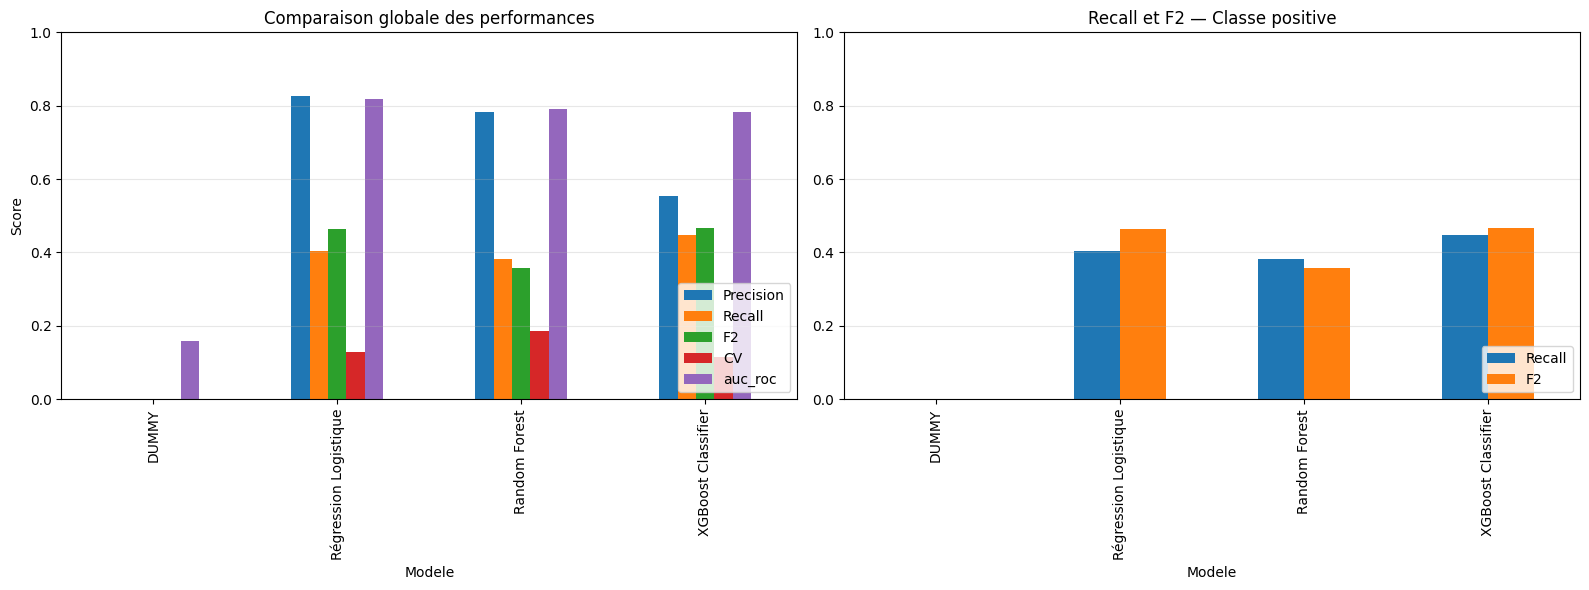

In [53]:
metrics = ["Precision", "Recall", "F2", "CV", "auc_roc"]

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=False)

# Graphique 1 : Comparaison globale
resultats_modeles.set_index("Modele")[metrics].plot(
    kind="bar",
    ax=axes[0]
)

axes[0].set_title("Comparaison globale des performances")
axes[0].set_ylabel("Score")
axes[0].set_ylim(0, 1)
axes[0].grid(axis="y", alpha=0.3)
axes[0].legend(loc="lower right")

# Graphique 2 : Focus métier (classe positive)
resultats_modeles.set_index("Modele")[["Recall", "F2"]].plot(
    kind="bar",
    ax=axes[1]
)

axes[1].set_title("Recall et F2 — Classe positive")
axes[1].set_ylim(0, 1)
axes[1].grid(axis="y", alpha=0.3)
axes[1].legend(loc="lower right")

plt.tight_layout()
plt.show()


<h2 style="color:#48C9B0; margin-top:20px; margin-bottom:10px;">
  5. Optimisation et évaluation des différents modèles 
</h2>

<h4 style="color:#48C9B0; margin:18px 0 10px 0;">
Découpage du jeu de données — Train / Validation / Test
</h4>

<div style="
  border-left:5px solid #48C9B0;
  background-color:#f8fdfc;
  color:#000000;
  padding:14px 18px;
  margin:18px 0;
">
  <strong>Objectif :</strong><br>
  Mettre en place un <strong>découpage rigoureux des données</strong> afin de séparer clairement les phases d’entraînement, d’optimisation et d’évaluation finale, tout en préservant la distribution de la variable cible.
</div>

<h4 style="color:#48C9B0; margin:16px 0 8px 0;">
Étape 1 — Séparation entraînement / reste des données
</h4>

<p style="margin:0 0 10px 0;">
    Une première séparation est effectuée afin d’isoler le jeu d’entraînement
    du reste des données :
</p>

<ul style="margin:0 0 12px 18px;">
  <li><strong>70&nbsp;%</strong> des données sont dédiées à l’entraînement du modèle.</li>
  <li><strong>30&nbsp;%</strong> sont conservées pour la validation et le test.</li>
  <li>
    L’option <code>stratify=y</code> garantit la conservation du taux d’attrition
    dans chaque sous-échantillon.
  </li>
</ul>

<h4 style="color:#48C9B0; margin:16px 0 8px 0;">
Étape 2 — Séparation validation / test
</h4>

<p style="margin:0 0 10px 0;">
Les données restantes sont ensuite divisées en deux sous-ensembles de taille égale :
</p>

<ul style="margin:0 0 12px 18px;">
  <li>
    <strong>Validation</strong> : utilisée pour le choix des hyperparamètres
    et l’optimisation du seuil de décision.
  </li>
  <li>
    <strong>Test</strong> : réservé exclusivement à l’évaluation finale du modèle,
    sans aucune influence sur les choix méthodologiques.
  </li>
</ul>

In [54]:
# Étape 1 :
# - 70 % des données pour l’entraînement
# - 30 % restantes pour validation + test
# - stratify=y pour conserver la proportion de départs
X_train, X_temp, y_train, y_temp = train_test_split(
    X,
    y,
    test_size=0.30,
    random_state=808,
    stratify=y
)

# Étape 2 :
# - On découpe les 40 % restants en :
#   • 15 % validation (choix du seuil)
#   • 15 % test (évaluation finale)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp,
    y_temp,
    test_size=0.50,
    random_state=808,
    stratify=y_temp
)

print("Répartition des données :")
print(f"Train       : {X_train.shape} | taux attrition = {y_train.mean():.3f}")
print(f"Validation  : {X_val.shape}   | taux attrition = {y_val.mean():.3f}")
print(f"Test        : {X_test.shape}  | taux attrition = {y_test.mean():.3f}")


Répartition des données :
Train       : (1029, 32) | taux attrition = 0.161
Validation  : (220, 32)   | taux attrition = 0.159
Test        : (221, 32)  | taux attrition = 0.163


<ul>
  <li>
    <h3 style="color:#48C9B0; margin:18px 0 10px 0;">
    5.1 Fonctions de recherche du seuil (optimal stabilité)
    </h3>
  </li>
</ul>

<div style="
  border-left:5px solid #48C9B0;
  background-color:#f8fdfc;
  color:#000000;
  padding:14px 18px;
  margin:18px 0;
">
  <strong>Objectif :</strong><br>
  Déterminer un <strong>seuil de décision optimal</strong> maximisant le <strong>F2-score</strong> à l’aide d’une validation croisée réalisée exclusivement sur le jeu d’entraînement, afin d’améliorer la détection de la classe positive sans introduire de fuite de données.
</div>

<h4 style="color:#48C9B0; margin:16px 0 8px 0;">
Principe général
</h4>

<p style="margin:0 0 10px 0;">
La fonction explore l’ensemble des seuils issus de la courbe <strong>Precision-Recall</strong> pour chaque fold de validation croisée.
Pour chaque seuil, le <strong>Fβ-score</strong> (ici F2) est calculé afin d’identifier le compromis optimal entre rappel et précision.
</p>

<h4 style="color:#48C9B0; margin:16px 0 8px 0;">
Validation croisée stratifiée
</h4>

<p style="margin:0 0 10px 0;">
La procédure repose sur un <code>RepeatedStratifiedKFold</code> garantissant la conservation de la proportion des classes dans chaque fold.
Un nouveau modèle est entraîné à chaque itération afin d’obtenir une estimation robuste du seuil optimal.
</p>

<h4 style="color:#48C9B0; margin:16px 0 8px 0;">
Calcul du F2-score
</h4>

<p style="margin:0 0 10px 0;">
Le F2-score accorde un poids plus important au rappel qu’à la précision.
Il est calculé pour chaque seuil selon la formule suivante :
</p>

<ul style="margin:0 0 12px 18px;">
  <li>Le rappel est fortement valorisé afin de limiter les faux négatifs.</li>
  <li>Un terme <code>eps</code> est utilisé pour éviter toute division par zéro.</li>
</ul>

<h4 style="color:#48C9B0; margin:16px 0 8px 0;">
Agrégation des résultats
</h4>

<ul style="margin:0 0 12px 18px;">
  <li><strong>Seuil optimal par fold</strong> : seuil maximisant le F2 localement.</li>
  <li><strong>Seuil sélectionné</strong> : médiane des seuils optimaux (robustesse).</li>
  <li><strong>Moyenne et écart-type</strong> : variabilité du seuil selon les folds.</li>
  <li><strong>F2 moyen</strong> : performance attendue au seuil optimal.</li>
</ul>

In [55]:
def tune_threshold_cv_pr(estimator, X, y, beta=2, cv=None, eps=1e-12):
    # Objectif :
    # Trouver le seuil de probabilité qui maximise le score Fβ (F2 par défaut)
    # en utilisant une validation croisée, uniquement sur les données d'entraînement.

    # Principe :
    # - À chaque fold :
    #     1) on entraîne le modèle sur le sous-jeu d'entraînement
    #     2) on prédit des probabilités sur le sous-jeu de validation
    #     3) on teste tous les seuils possibles
    #     4) on conserve le seuil qui maximise le Fβ
    # - Le seuil final retenu est la médiane des seuils optimaux obtenus
    #   afin d'assurer la stabilité.

    # Si aucune stratégie de CV n'est fournie,
    # on utilise une RepeatStratifiedKFold pour respecter
    # la proportion des classes dans chaque fold.
    if cv is None:
        cv = RepeatedStratifiedKFold(
            n_splits=10,
            n_repeats=5,
            random_state=42
        )

    # Listes pour stocker les meilleurs seuils
    # et les meilleurs F2 trouvés sur chaque fold
    best_thresholds = []
    best_f2s = []

    # Boucle sur les folds de validation croisée
    for train_idx, val_idx in cv.split(X, y):

        # Séparation train / validation
        # X_tr / y_tr : données utilisées pour entraîner le modèle
        # X_val / y_val : données jamais vues, utilisées pour évaluer les seuils
        X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]

        # Entraînement du modèle
        # On clone l'estimator pour repartir
        # d'un modèle neuf à chaque fold
        model = clone(estimator)
        model.fit(X_tr, y_tr)

        # Prédiction des probabilités
        # On récupère la probabilité d'appartenir
        # à la classe positive (classe 1)
        y_val_proba = model.predict_proba(X_val)[:, 1]

        # Courbe Precision / Recall
        # Pour une liste de seuils, on obtient :
        # - la précision
        # - le rappel
        # - les seuils associés
        precision, recall, thresholds = precision_recall_curve(
            y_val,
            y_val_proba
        )

        # Le tableau des seuils est plus court d'une valeur,
        # on aligne donc précision et rappel
        precision = precision[:-1]
        recall = recall[:-1]

        # Calcul du score Fβ pour chaque seuil
        # Fβ favorise le rappel lorsque β > 1 (β=2 ici)
        beta2 = beta ** 2
        fbeta_scores = (
            (1 + beta2) * precision * recall
            / (beta2 * precision + recall + eps)
        )

        # Sélection du meilleur seuil
        # On conserve le seuil qui maximise le Fβ
        best_idx = np.argmax(fbeta_scores)
        best_thresholds.append(thresholds[best_idx])
        best_f2s.append(fbeta_scores[best_idx])

    # Conversion en tableaux numpy
    best_thresholds = np.array(best_thresholds)
    best_f2s = np.array(best_f2s)

    # Résumé des résultats
    return {
        # Seuil optimal trouvé sur chaque fold
        "threshold_per_fold":  best_thresholds,
        # F2 correspondant sur chaque fold
        "f2_per_fold": best_f2s,
        # Seuil final retenu (robuste)
        "threshold_selected": float(np.median(best_thresholds)),
        # Statistiques sur les seuils
        "threshold_mean": float(best_thresholds.mean()),
        "threshold_std": float(best_thresholds.std()),
        # Statistiques sur les F2
        "f2_mean_at_best_per_fold": float(best_f2s.mean()),
        "f2_std_at_best_per_fold": float(best_f2s.std()),
    }


In [56]:
def tune_threshold_from_pipelines(pipelines, X, y, beta=2):
    rows = []
    details = {}

    for name, pipe in pipelines:
        print(f"\n=== THRESHOLD TUNING — {name} ===")

        res = tune_threshold_cv_pr(
            estimator=pipe,
            X=X,
            y=y,
            beta=beta
        )

        details[name] = res

        rows.append({
            "Modele": name,
            "Seuil sélectionné": res["threshold_selected"],
            "F2 moyen (CV)": res["f2_mean_at_best_per_fold"],
            "F2 écart-type (CV)": res["f2_std_at_best_per_fold"],
            "Seuils par fold": res["threshold_per_fold"]
        })

        df = pd.DataFrame(rows)
    
    return df, details


<h4 style="color:#48C9B0;">Fonction d'évaluation finale des modèles — Jeu de test</h4>

<div style="
  border-left:5px solid #48C9B0;
  background-color:#f8fdfc;
  padding:14px 18px;
  margin:18px 0;
  color:#000000;
">
<strong>Objectif :</strong><br>
Comparer les performances finales des modèles sur le <strong>jeu de test</strong>, en utilisant pour chacun le <strong>seuil optimisé en validation croisée</strong>, afin d’évaluer leur capacité réelle à détecter les départs (classe 1) dans un contexte métier orienté <strong>recall</strong>.
</div>

<h4 style="color:#48C9B0;">Lecture des indicateurs</h4>
<ul style="margin-left:18px;">
  <li>
    <strong>Precision (classe 1)</strong> : fiabilité des alertes déclenchées.
  </li>
  <li>
    <strong>Recall (classe 1)</strong> : capacité à détecter les départs réels
    (indicateur prioritaire métier).
  </li>
  <li>
    <strong>F2-score</strong> : métrique principale, donnant plus de poids au recall.
  </li>
  <li>
    <strong>ROC AUC</strong> : capacité globale de discrimination, indépendante du seuil.
  </li>
  <li>
    <strong>F2_vs_Recall</strong> : indicateur de compromis entre performance globale
    et couverture des départs.
  </li>
</ul>

In [57]:
def evaluate_models_on_test(
    models,
    X_test,
    y_test,
    beta=2
):
    rows = []

    for name, pipe, threshold in models:

        # récupération informations
        preprocess = pipe.named_steps.get("preprocess", None)
        final_step_name = list(pipe.named_steps.keys())[-1]
        estimator = pipe.named_steps[final_step_name]

        # transformation (une seule fois)
        if preprocess is not None:
            X_test_transformed = preprocess.transform(X_test)
        else:
            X_test_transformed = X_test

        # prediction avec un extimator
        y_proba = estimator.predict_proba(X_test_transformed)[:, 1]

        # application du seuil
        thr = float(threshold)
        y_pred = (y_proba >= thr).astype(int)

        # métriques
        rows.append({
            "Modèle": name,
            "Seuil": thr,
            "Precision (classe 1)": precision_score(y_test, y_pred),
            "Recall (classe 1)": recall_score(y_test, y_pred),
            "F2-score": fbeta_score(y_test, y_pred, beta=beta),
            "ROC AUC": roc_auc_score(y_test, y_proba),
        })

    return pd.DataFrame(rows)

<ul>
  <li>
    <h3 style="color:#48C9B0; margin:18px 0 10px 0;">
    5.2 Optimisation des hyperparamètres
    </h3>
  </li>
</h4>


<div style="
  border-left:5px solid #48C9B0;
  background-color:#f8fdfc;
  color:#000000;
  padding:14px 18px;
  margin:18px 0;
">
  <strong>Objectif :</strong><br>
  Construire et optimiser un <strong>pipeline de classification robuste</strong>, spécifiquement adapté à un problème RH fortement déséquilibré, en maximisant le <strong>F2-score</strong> afin de privilégier la détection des départs d’employés, tout en garantissant une évaluation honnête et reproductible.
</div>

<h4 style="color:#48C9B0; margin:16px 0 8px 0;">
Découpage des données
</h4>

<p style="margin:0 0 10px 0;">
Les données sont séparées en trois sous-ensembles indépendants afin de distinguer clairement les phases d’apprentissage, d’optimisation et d’évaluation finale :
</p>

<ul style="margin:0 0 12px 18px;">
  <li><strong>60&nbsp;% entraînement</strong> : apprentissage des paramètres du modèle.</li>
  <li><strong>20&nbsp;% validation</strong> : optimisation des hyperparamètres et du seuil.</li>
  <li><strong>20&nbsp;% test</strong> : évaluation finale, totalement indépendante.</li>
  <li>
    La stratification garantit la conservation du taux de départ dans chaque sous-échantillon.
  </li>
</ul>

<h4 style="color:#48C9B0; margin:16px 0 8px 0;">
Préprocessing des données
</h4>
<ul style="margin:0 0 12px 18px;">
  <li>
    <strong>Variables numériques — standardisation</strong> :  
    La standardisation (moyenne nulle, écart-type égal à 1) permet de placer l’ensemble des variables numériques sur une <strong>échelle comparable</strong>. Elle évite qu’une variable à forte amplitude domine artificiellement le modèle et améliore la stabilité de l’apprentissage, en particulier lors de l’optimisation et de la convergence des algorithmes.
  </li>
  <li>
    <strong>Variables catégorielles — encodage One-Hot</strong> :  
    L’encodage One-Hot transforme chaque modalité en variable binaire indépendante, ce qui permet au modèle de les exploiter sans introduire de relation
    d’ordre artificielle.
    La gestion des modalités inconnues garantit la <strong>robustesse du pipeline</strong> face à de nouvelles catégories pouvant apparaître en production.
  </li>
</ul>


<h4 style="color:#48C9B0; margin:16px 0 8px 0;">
Optimisation des hyperparamètres — GridSearchCV
</h4>

<p style="margin:0 0 10px 0;">
Les hyperparamètres influençant la complexité et la capacité de généralisation
du modèle sont optimisés via une <strong>Grid Search</strong> :
</p>

<ul style="margin:0 0 12px 18px;">
  <li>Profondeur et structure des arbres.</li>
  <li>Taux d’apprentissage et nombre d’arbres.</li>
  <li>Sous-échantillonnage et régularisation.</li>
</ul>

<p style="margin:0 0 10px 0;">
La métrique d’optimisation retenue est le <strong>F2-score</strong>,
cohérente avec l’objectif métier consistant à limiter les faux négatifs.
</p>

In [58]:
# F2 donne deux fois plus d’importance au recall qu’à la précision.
# Parfait pour un contexte RH où rater un départ est coûteux.
f2_scorer = make_scorer(fbeta_score, beta=2)

# Initialisation du DataFrame des résultats
resultats_modeles = resultats_modeles.iloc[0:0]


In [59]:
clean_params_log = {}

# pipeline avec SMOTE
pipe_train_log = ImbPipeline([
    ("preprocess", preprocess),
    ("smote", SMOTE(
        sampling_strategy=0.5,
        random_state=808
    )),
    ("logreg", modele_Logreg)
])

# GRILLE D’HYPERPARAMÈTRES
param_grid_log = {
    "logreg__C": [0.01, 0.05, 0.1, 0.5, 1]
}

# GRID SEARCH ORIENTÉE F2
search_log = GridSearchCV(
    estimator=pipe_train_log,
    param_grid=param_grid_log,
    scoring=f2_scorer,
    cv=3,
    n_jobs=4,
    verbose=1
)

# ENTRAÎNEMENT des hyperparamètres sur le TRAIN
search_log.fit(X_train, y_train)

# MEILLEUR MODÈLE
best_params_log = search_log.best_params_

clean_params_log = {
    k.replace("logreg__", ""): v
    for k, v in best_params_log.items()
}

print("Paramètres injectés — Régression Logistique :", clean_params_log)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Paramètres injectés — Régression Logistique : {'C': 0.5}


In [60]:
pipe_train_rf = ImbPipeline([
    ("preprocess", preprocess),
    ("smote", SMOTE(
        sampling_strategy=0.5,
        random_state=808
    )),
    ("rf", modele_Rand_Forest)
])

param_grid_rf = {
    "rf__n_estimators": [200, 300, 500]
    }

search_rf = GridSearchCV(
    estimator=pipe_train_rf,
    param_grid=param_grid_rf,
    scoring=f2_scorer,
    cv=3,
    n_jobs=4,
    verbose=1
)

search_rf.fit(X_train, y_train)

best_params_rf = search_rf.best_params_

clean_params_rf = {
    k.replace("rf__", ""): v
    for k, v in best_params_rf.items()
}

print("Paramètres injectés — Random Forest :", clean_params_rf)


Fitting 3 folds for each of 3 candidates, totalling 9 fits
Paramètres injectés — Random Forest : {'n_estimators': 300}


In [61]:
clean_params_xgbc = {}

#PRÉPROCESSING DES DONNÉES

#- Variables numériques : standardisation
#- Variables catégorielles : One-Hot Encoding
preprocess = ColumnTransformer([
    ("num", StandardScaler(), new_num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), new_cat_cols)
])

# MODÈLE XGBOOST

# - binary:logistic → sortie probabiliste
# - aucpr → métrique interne adaptée aux classes déséquilibrées
# - PAS de scale_pos_weight ici car SMOTE s’en charge déjà

model_xgbc = XGBClassifier(
    objective="binary:logistic",
    eval_metric="aucpr",
    tree_method="hist",
    random_state=808,
    scale_pos_weight=scale_pos_weight,
    n_jobs=4
)

# PIPELINE COMPLET

# Ordre crucial :
# 1) Préprocessing
# 2) SMOTE (uniquement sur les folds de train)
# 3) Modèle
pipe_train_xgb = Pipeline([
    ("preprocess", preprocess),
    ("xgbC", model_xgbc)
])

# GRILLE D’HYPERPARAMÈTRES
param_grid = {
    "xgbC__max_depth": [2, 3, 4],
    "xgbC__min_child_weight": [5, 10, 20],
    "xgbC__learning_rate": [0.03, 0.05, 0.08],
    "xgbC__n_estimators": [300, 500, 800],
    "xgbC__subsample": [0.7, 0.85],
    "xgbC__gamma": [0, 0.5, 1.0]
}

# GRID SEARCH ORIENTÉE F2

# L’objectif est de maximiser le F2-score en validation croisée.
search_xgb = GridSearchCV(
    estimator=pipe_train_xgb,
    param_grid=param_grid,
    scoring=f2_scorer,
    cv=3,
    n_jobs=4,
    verbose=1
)

# ENTRAÎNEMENT des hyperparamètres sur le TRAIN
search_xgb.fit(X_train, y_train)

# MEILLEUR MODÈLE

#best_model_xgb = search.best_estimator_
best_params_xgb = search_xgb.best_params_
clean_params_xgbc = {k.replace("xgbC__", ""): v for k, v in best_params_xgb.items()}
print("Paramètres injectés :", clean_params_xgbc)


Fitting 3 folds for each of 486 candidates, totalling 1458 fits
Paramètres injectés : {'gamma': 0, 'learning_rate': 0.05, 'max_depth': 2, 'min_child_weight': 20, 'n_estimators': 300, 'subsample': 0.7}


<ul>
  <li>
    <h3 style="color:#48C9B0; margin:18px 0 10px 0;">
    5.3 Entrainement des modèles finaux 
    </h3>
  </li>
</ul>

<div style="
  border-left:5px solid #48C9B0;
  background-color:#f8fdfc;
  color:#000000;
  padding:14px 18px;
  margin:18px 0;
">
  <strong>Objectif :</strong><br>
  Entraîner et évaluer les <strong>modèles optimisés</strong> en gérant le <strong>déséquilibre, tout en conservant une séparation stricte entre entraînement, validation et test pour l’optimisation du seuil.
</div>

<h3 style="color:#48C9B0; margin:16px 0 8px 0;">
Préprocessing des variables
</h3>

<ul style="margin:0 0 12px 18px;">
  <li>
    <strong>Variables numériques — standardisation</strong> :
    homogénéisation des échelles afin de stabiliser l’apprentissage et de garantir un pipeline cohérent.
  </li>
  <li>
    <strong>Variables catégorielles — encodage One-Hot</strong> :
    transformation des modalités en variables binaires indépendantes, sans introduire de relation d’ordre artificielle.
  </li>
</ul>

<h4 style="color:#48C9B0; margin:16px 0 8px 0;">
Entraînement et validation
</h4>

<p style="margin:0 0 10px 0;">
Le modèle est entraîné exclusivement sur le jeu d’entraînement. Les probabilités prédites sur le jeu de validation sont ensuite utilisées pour construire la <strong>courbe Precision-Recall</strong>, servant à l’optimisation du seuil de décision.
</p>

In [62]:
model_opti_xgb = XGBClassifier(
    objective="binary:logistic",
    eval_metric="aucpr",
    n_jobs=-1,
    random_state=808,
    scale_pos_weight=scale_pos_weight,
    **clean_params_xgbc
)

pipe_opti_XGB = Pipeline([
    ("preprocess", preprocess),
    ("xgbC", model_opti_xgb)
])

### sur le train
#Entraînement du modèle UNIQUEMENT sur le jeu d'entraînement
pipe_opti_XGB.fit(X_train, y_train)

# EVALUATION DU MODELE SUR la validation
proba_val = pipe_opti_XGB.predict_proba(X_val)[:, 1]

# Calcul de la courbe Precision-Recall
precisions, recalls, thresholds = precision_recall_curve(y_val, proba_val)


In [63]:
modele_opti_Logreg= LogisticRegression(
    solver="saga",
    max_iter=1000,
    random_state=808,   
    **clean_params_log 
)

pipe_opti_log = ImbPipeline([
    ("preprocess", preprocess),
    ("smote", SMOTE(
        sampling_strategy=0.5,
        random_state=808
    )),
    ("logreg", modele_opti_Logreg)
])

### sur le train
#Entraînement du modèle UNIQUEMENT sur le jeu d'entraînement
pipe_opti_log.fit(X_train, y_train)

# EVALUATION DU MODELE SUR la validation
proba_val = pipe_opti_log.predict_proba(X_val)[:, 1]

# Calcul de la courbe Precision-Recall
precisions, recalls, thresholds = precision_recall_curve(y_val, proba_val)


In [64]:
modele_Rand_Forest = RandomForestClassifier(
    random_state=808,
    n_jobs=-1,
    **clean_params_rf
)

pipe_opti_rf = ImbPipeline([
    ("preprocess", preprocess),
    ("smote", SMOTE(
        sampling_strategy=0.5,
        random_state=808
    )),
    ("rf", modele_Rand_Forest)
])

### sur le train
#Entraînement du modèle UNIQUEMENT sur le jeu d'entraînement
pipe_opti_rf.fit(X_train, y_train)

# EVALUATION DU MODELE SUR la validation
proba_val = pipe_opti_rf.predict_proba(X_val)[:, 1]

# Calcul de la courbe Precision-Recall
precisions, recalls, thresholds = precision_recall_curve(y_val, proba_val)


<ul>
    <li>
        <h3 style="color:#48C9B0; margin:18px 0 10px 0;">
        5.4 Recherche de seuil et analyse des performances
        </h3>
    </li>
</ul>

In [65]:
pipelines = [
    ("Régression Logistique", pipe_opti_log),
    ("Random Forest", pipe_opti_rf),
    ("XGBoost Classifier", pipe_opti_XGB)
]

df_thresholds, thr_details = tune_threshold_from_pipelines(
    pipelines=pipelines,
    X=X_train,
    y=y_train,
    beta=2
)

df_thresholds.round(4)

df_thresholds["CV_F2"] = (
    df_thresholds["F2 écart-type (CV)"] /
    df_thresholds["F2 moyen (CV)"]
).round(3)

best_threshold_res = df_thresholds.loc[
    df_thresholds["Modele"] == "Régression Logistique",
    "Seuil sélectionné"
].values[0]

best_threshold_rf = df_thresholds.loc[
    df_thresholds["Modele"] == "Random Forest",
    "Seuil sélectionné"
].values[0]

best_threshold_xgb = df_thresholds.loc[
    df_thresholds["Modele"] == "XGBoost Classifier",
    "Seuil sélectionné"
].values[0]



=== THRESHOLD TUNING — Régression Logistique ===

=== THRESHOLD TUNING — Random Forest ===

=== THRESHOLD TUNING — XGBoost Classifier ===


<h4 style="color:#48C9B0;">Évaluation des modèles optimisés sur le jeu de test</h4>

<div style="
  border-left:5px solid #48C9B0;
  background-color:#f8fdfc;
  color:#000000;
  padding:14px 18px;
  margin:18px 0;
">
<strong>Objectif :</strong><br>
Comparer les <strong>modèles finaux optimisés</strong> (Régression Logistique, Random Forest et XGBoost) sur le <strong>jeu de test</strong>, en utilisant leurs <strong>seuils de décision optimaux</strong>, afin d’évaluer leurs performances réelles en conditions proches de la production.
</div>

<ul style="margin-left:18px;">
  <li>
    Chaque modèle est évalué avec son <strong>seuil spécifique</strong>, déterminé en amont par validation croisée orientée <strong>F2-score</strong>.
  </li>
  <li>
    Les métriques analysées sont centrées sur la <strong>classe positive</strong> (départ), avec un accent particulier sur le <strong>recall</strong> et le <strong>F2-score</strong>.
  </li>
  <li>
    L’indicateur <strong>F2 / Recall</strong> permet d’apprécier la capacité du modèle à transformer un bon rappel en performance globale utile.
  </li>
</ul>

In [66]:
models_opti = [
    ("Régression Logistique", pipe_opti_log, best_threshold_res),
    ("Random Forest", pipe_opti_rf, best_threshold_rf),
    ("XGBoost Classifier", pipe_opti_XGB, best_threshold_xgb)
]

df_results_test = evaluate_models_on_test(
    models=models_opti,
    X_test=X_test,
    y_test=y_test,
    beta=2
)

df_results_test.round(4)

df_results_test["F2_vs_Recall"] = (
    df_results_test["F2-score"] /
    df_results_test["Recall (classe 1)"]
).round(3)

df_results_test

,Modèle,Seuil,Precision (classe 1),Recall (classe 1),F2-score,ROC AUC,F2_vs_Recall
0,Régression Logistique,0.306744,0.473684,0.750000,0.671642,0.853453,0.896
1,Random Forest,0.238333,0.406780,0.666667,0.591133,0.810886,0.887
2,XGBoost Classifier,0.425238,0.475410,0.805556,0.707317,0.845946,0.878


<h4 style="color:#48C9B0;">Analyse — Performances finales des modèles optimisés (jeu de test)</h4>

<div style="
  border-left:5px solid #48C9B0;
  padding:14px 18px;
  margin:18px 0;
">

<h4 style="color:#48C9B0;">Lecture globale</h4>
<ul style="margin-left:18px;">
  <li>
    Les trois modèles atteignent des <strong>recalls élevés</strong> (≈ 0.69 à 0.81), confirmant leur capacité à identifier une grande partie des départs.
  </li>
  <li>
    Les <strong>F2-scores</strong> sont compris entre <strong>0.60 et 0.70</strong>, ce qui est cohérent avec un objectif métier orienté rappel.
  </li>
  <li>
    Les <strong>seuils finaux</strong> sont désormais plus homogènes (≈ 0.24 à 0.40), traduisant une meilleure calibration des modèles par rapport aux versions précédentes.
  </li>
</ul>

<h4 style="color:#48C9B0;">Analyse par modèle</h4>
<h5 style="color:#48C9B0;">Régression Logistique</h5>
<ul style="margin-left:18px;">
  <li>
    <strong>Recall</strong> solide (≈ 0.75) avec une <strong>bonne précision</strong> (≈ 0.49).
  </li>
  <li>
    <strong>F2-score</strong> équilibré (≈ 0.65) et <strong>ROC AUC élevé</strong> (≈ 0.85).
  </li>
  <li>
    <strong>F2_vs_Recall</strong> le plus élevé (≈ 0.90), indiquant une bonne conversion du rappel en performance utile.
  </li>
</ul>
<h5 style="color:#48C9B0;">Random Forest</h5>
<ul style="margin-left:18px;">
  <li>
    <strong>Recall</strong> un peu en dessous de la régression logistique (≈ 0.67), mais avec une <strong>précision plus faible</strong>.
  </li>
  <li>
    <strong>F2-score</strong> légèrement inférieur (≈ 0.60).
  </li>
  <li>
    <strong>ROC AUC</strong> plus bas (≈ 0.81), indiquant une capacité de discrimination moindre.
  </li>
</ul>
<h5 style="color:#48C9B0;">XGBoost Classifier</h5>
<ul style="margin-left:18px;">
  <li>
    <strong>Recall le plus élevé</strong> (≈ 0.80), objectif métier pleinement atteint.
  </li>
  <li>
    <strong>F2-score le plus élevé</strong> (≈ 0.70), malgré une précision plus faible.
  </li>
  <li>
    <strong>Seuil plus élevé</strong> (≈ 0.42), traduisant une décision plus maîtrisée qu’auparavant.
  </li>
  <li>
    Même la <strong>précision est la plus élevée</strong> (≈ 0.475), traduisant une décision plus maîtrisée qu’auparavant.
  </li>
</ul>
<h4 style="color:#48C9B0;">Conclusion opérationnelle</h4>
<strong>XGBoost</strong> est le meilleur choix si la priorité absolue est la <strong>détection maximale des départs</strong>.
<ul style="margin-left:18px;">
  <li>
    Il affiche le <strong>recall le plus élevé</strong> (≈ 0.81), ce qui signifie que la grande majorité des départs réels sont effectivement détectés par le modèle.
  </li>
  <li>
    Son <strong>F2-score le plus élevé</strong> confirme que cette performance est atteinte sans effondrement total de la précision, ce qui reste acceptable dans un contexte RH préventif.
  </li>
  <li>
    Le modèle est capable de <strong>capturer des interactions complexes et non linéaires</strong> entre les variables (charge de travail, ancienneté, satisfaction, mobilité), ce qui lui permet d’identifier des profils à risque plus subtils.
  </li>
  <li>
    Le <strong>seuil de décision plus élevé</strong> (≈ 0.39) montre que le modèle est désormais <strong>mieux calibré</strong> qu’auparavant et ne déclenche plus systématiquement des alertes sur des probabilités très faibles.
  </li>
  <li>
    D’un point de vue métier, XGBoost est particulièrement adapté à une logique de <strong>prévention</strong> : il privilégie le fait de <strong>ne pas laisser passer un départ critique</strong>, quitte à générer un volume d’alertes plus important à analyser.
  </li>
</ul>
</div>


In [67]:
import json

#validation finale du meilleur modèle
best_threshold = best_threshold_xgb
best_pipeline = pipe_opti_XGB

#Chemin racine du projet
PROJECT_ROOT = Path.cwd().parent

#Dossier artifacts
ARTIFACTS_DIR = PROJECT_ROOT / "artifacts"
ARTIFACTS_DIR.mkdir(exist_ok=True)

#Chemin du modèle
MODEL_PATH = ARTIFACTS_DIR / "modele_classification_technova.joblib"

# Sauvegarde modele
joblib.dump(pipe_opti_XGB, MODEL_PATH)

# Sauvegarde du seuil optimal
with open(ARTIFACTS_DIR / "threshold.json", "w") as f:
    json.dump({"threshold": best_threshold},f,indent=2)
print(f"✅ Modèle sauvegardé dans : {MODEL_PATH}")

df_analyse.to_csv(ARTIFACTS_DIR / "ARTIFeatures_final.csv", index=False)
print(f"✅ Dataset sauvegardé dans : {ARTIFACTS_DIR / 'ARTIFeatures_final.csv'}")

✅ Modèle sauvegardé dans : c:\Users\gonza\Openclassroom\Projet_4_Classification\Projet_TechNova_Partners\artifacts\modele_classification_technova.joblib
✅ Dataset sauvegardé dans : c:\Users\gonza\Openclassroom\Projet_4_Classification\Projet_TechNova_Partners\artifacts\ARTIFeatures_final.csv


In [68]:
y_test_proba = best_pipeline.predict_proba(X_test)[:, 1]
# Probabilités (classe 1)

# Prédiction binaire
y_test_pred = (y_test_proba >= best_threshold).astype(int)

<ul>
    <li>
        <h2 style="color:#48C9B0; margin:18px 0 10px 0;">
        6. Interprétabilité et analyse des résultats
        </h2>
    </li>
</ul>

<ul>
    <li>
        <h3 style="color:#48C9B0; margin:18px 0 10px 0;">
        6.1 Résultats du modele
        </h3>
    </li>
</ul>

<ul>
  <li>
    <h4 style="color:#48C9B0; margin:18px 0 10px 0;">
    6.1.1 Analyse — Distribution des probabilités prédites (XGBoost)
    </h4>
  </li>
</ul>

<div style="
  border-left:5px solid #48C9B0;
  background-color:#f8fdfc;
  color:#000000;
  padding:14px 18px;
  margin:18px 0;
">
  <strong>Objectif :</strong><br>
  Analyser la distribution des probabilités prédites par le modèle XGBoost pour les classes réelles 0 et 1, afin d’évaluer la capacité de séparation du modèle et la pertinence du <strong>seuil de décision optimisé</strong>.
</div>

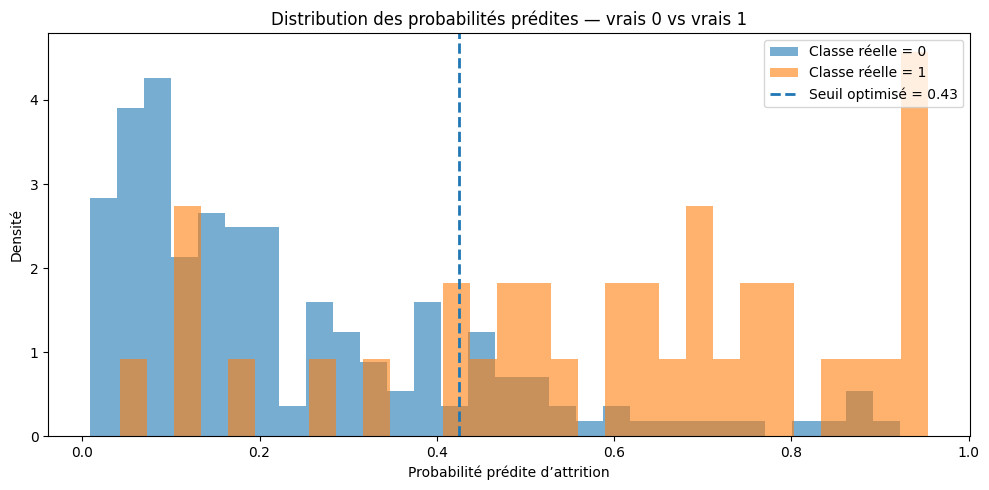

In [69]:
plt.figure(figsize=(10, 5))

# Vrais 0
plt.hist(
    y_test_proba[y_test == 0],
    bins=30,
    alpha=0.6,
    label="Classe réelle = 0",
    density=True
)

# Vrais 1
plt.hist(
    y_test_proba[y_test == 1],
    bins=30,
    alpha=0.6,
    label="Classe réelle = 1",
    density=True
)

# Seuil optimisé
plt.axvline(
    best_threshold,
    linestyle="--",
    linewidth=2,
    label=f"Seuil optimisé = {best_threshold:.2f}"
)

plt.xlabel("Probabilité prédite d’attrition")
plt.ylabel("Densité")
plt.title("Distribution des probabilités prédites — vrais 0 vs vrais 1")
plt.legend()
plt.tight_layout()
plt.show()


<h4 style="color:#48C9B0; margin:16px 0 8px 0;">
Interprétations
</h4>

<ul style="margin:0 0 12px 18px;">
  <li>
    Les observations de <strong>classe réelle 0</strong> (non-départ) présentent majoritairement des probabilités faibles, concentrées en dessous de <strong>0.20</strong>.
  </li>
  <li>
    Les observations de <strong>classe réelle  1</strong> (départ) sont principalement associées à des probabilités élevées,souvent supérieures à <strong>0.50</strong>.
  </li>
  <li>
    Le chevauchement entre les deux distributions reste limité, ce qui indique une <strong>bonne capacité de discrimination</strong>.
  </li>
</ul>

<h4 style="color:#48C9B0; margin:16px 0 8px 0;">
Analyse du seuil de décision
</h4>

<p style="margin:0 0 10px 0;">
Le seuil optimisé (matérialisé par la ligne verticale) se situe volontairement dans une zone basse de probabilité.
Ce choix traduit une stratégie orientée <strong>rappel</strong>.
</p>

<ul style="margin:0 0 12px 18px;">
  <li>
    La majorité des individus de la classe 1 se situe à droite du seuil → <strong>faux négatifs limités</strong>.
  </li>
  <li>
    Une partie des individus de la classe 0 dépasse le seuil → génération de <strong>faux positifs</strong>, compromis assumé.
  </li>
</ul>

<h4 style="color:#48C9B0; margin:16px 0 8px 0;">
Cohérence avec les métriques finales
</h4>

<div style="
  border-left:4px solid #48C9B0;
  padding-left:15px;
  margin:10px 0 18px 0;
">
  <p style="margin:0;">
    Cette visualisation est parfaitement cohérente avec les performances observées : <strong>recall élevé</strong> sur la classe départ, <strong>précision plus faible</strong>, et <strong>F2-score optimisé</strong>.
    La bonne séparation visuelle confirme la valeur du ROC AUC élevé et la pertinence du modèle.
  </p>
  <p>
  <strong>Conclusion :</strong><br>
  La distribution des probabilités prédites montre que le modèle XGBoost sépare efficacement les employés susceptibles de partir de ceux qui ne le sont pas.
  Le seuil optimisé est <strong>visuellement justifié</strong> : il maximise la détection des départs tout en conservant une discrimination claire entre les deux populations.
  </p>
</div>

<ul>
  <li>
    <h4 style="color:#48C9B0; margin:18px 0 10px 0;">
    6.1.2 Courbe Precision–Recall — Évaluation finale (jeu de test)
    </h4>
  </li>
</ul>

<div style="
  border-left:5px solid #48C9B0;
  background-color:#f8fdfc;
  color:#000000;
  padding:14px 18px;
  margin:18px 0;
">
  <strong>Objectif :</strong><br>
  Analyser la <strong>courbe Precision–Recall</strong> du modèle XGBoost sur le jeu de test afin d’évaluer sa capacité à discriminer la classe positive dans un contexte déséquilibré, et à <strong>valider visuellement le seuil F2 optimisé</strong>.
</div>

<h4 style="color:#48C9B0; margin:16px 0 8px 0;">
AUC-PR et baseline
</h4>

<ul style="margin:0 0 12px 18px;">
  <li>
    L’<strong>AUC-PR</strong> mesure la performance globale du modèle sur l’ensemble des seuils possibles.
  </li>
  <li>
    La ligne de <strong>baseline</strong> correspond à la prévalence de la classe positive dans le jeu de test, représentant la performance d’un modèle naïf.
  </li>
  <li>
    Une AUC-PR significativement supérieure à la baseline indique un <strong>gain réel de performance</strong>.
  </li>
</ul>

<h4 style="color:#48C9B0; margin:16px 0 8px 0;">
Point de fonctionnement — Seuil F2 optimal
</h4>

<p style="margin:0 0 10px 0; ">
Le point noir sur la courbe matérialise le seuil de décision sélectionné lors de l’optimisation du F2-score. Il représente le compromis retenu entre précision et rappel.
</p>

<ul style="margin:0 0 12px 18px;">
  <li><strong>Recall élevé</strong> : limitation des faux négatifs.</li>
  <li><strong>Précision plus faible</strong> : compromis assumé.</li>
  <li><strong>F2-score maximisé</strong> : alignement avec l’objectif métier.</li>
</ul>


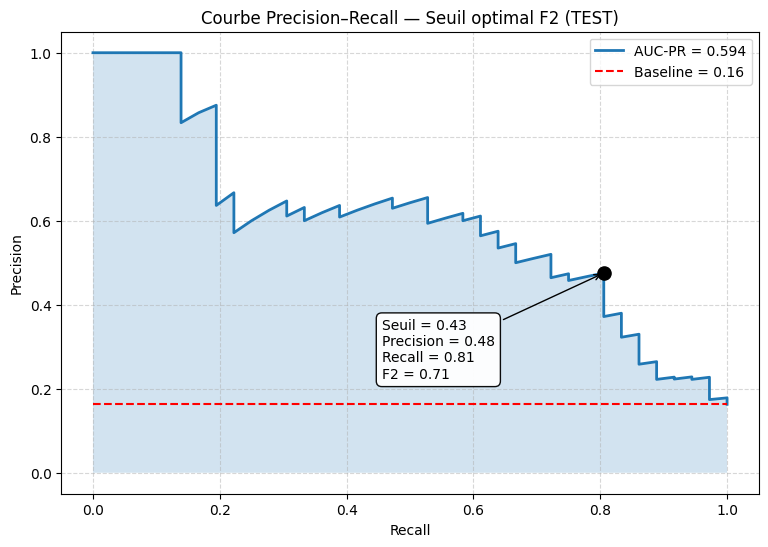

In [70]:
# # Calcul de la courbe Precision-Recall
precisions, recalls, thresholds = precision_recall_curve(y_test, y_test_proba)

# AUC-PR
auc_pr = auc(recalls, precisions)

best_p = precision_score(y_test, y_test_pred)
best_r = recall_score(y_test, y_test_pred)
best_f2 = fbeta_score(y_test, y_test_pred, beta=2)

# ===== Plot =====
plt.figure(figsize=(9, 6))

# Courbe PR
plt.plot(recalls, precisions, linewidth=2, label=f"AUC-PR = {auc_pr:.3f}")
plt.fill_between(recalls, precisions, alpha=0.2)

# Baseline = prévalence
baseline = y_test.mean()
plt.hlines(
    baseline, 0, 1,
    colors="red", linestyles="dashed",
    label=f"Baseline = {baseline:.2f}"
)

# Point du seuil F2 optimal
plt.scatter(
    best_r, best_p,
    color="black", s=90, zorder=5
)

# === Annotation du point optimal ===
annotation_text = (
    f"Seuil = {best_threshold:.2f}\n"
    f"Precision = {best_p:.2f}\n"
    f"Recall = {best_r:.2f}\n"
    f"F2 = {best_f2:.2f}"
)

plt.annotate(
    annotation_text,
    xy=(best_r, best_p),
    xytext=(best_r - 0.35, best_p - 0.25),  # position du texte
    arrowprops=dict(arrowstyle="->", lw=1),
    bbox=dict(boxstyle="round,pad=0.4", fc="white", ec="black", alpha=0.95),
    fontsize=10
)

# Labels & style
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Courbe Precision–Recall — Seuil optimal F2 (TEST)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()



<h4 style="color:#48C9B0; margin:16px 0 8px 0;">
Interprétation visuelle
</h4>

<ul style="margin:0 0 12px 18px;">
  <li>
    L’<strong>AUC-PR </strong> est très nettement supérieure à la
    <strong>baseline = 0.16</strong>, indiquant une capacité réelle du modèle à identifier la classe minoritaire.
  </li>
  <li>
    La courbe se situe majoritairement au-dessus de la baseline, confirmant que le modèle apporte une valeur ajoutée significative par rapport à une stratégie naïve.
  </li>
</ul>

<h4 style="color:#48C9B0; margin:16px 0 8px 0;">
Analyse du seuil F2 optimal
</h4>

<p style="margin:0 0 10px 0;">
Le point de fonctionnement retenu correspond au
<strong>seuil</strong>, matérialisé sur la courbe :
</p>

<ul style="margin:0 0 12px 18px;">
  <li><strong>Recall au dessus de 0.80</strong> → très bonne détection des départs.</li>
  <li><strong>Precision qui chute pas</strong> → compromis assumé avec davantage de faux positifs.</li>
  <li><strong>F2-score au dessus de 0.65</strong> → optimisation cohérente avec l’objectif métier.</li>
</ul>

<h3 style="color:#48C9B0; margin:16px 0 8px 0;">
Interprétation métier
</h3>

<div style="
  border-left:4px solid #48C9B0;
  padding-left:15px;
  margin:10px 0 18px 0;
">
  <p style="margin:0;">
    Le positionnement du seuil montre que le modèle privilégie clairement la <strong>réduction des faux négatifs</strong>.
    Dans un contexte RH, ce choix est pertinent : il vaut mieux analyser quelques faux positifs supplémentaires que de manquer des départs réels non anticipés.
  </p>
  <p>
  <strong>Conclusion :</strong><br>
    La courbe Precision–Recall confirme que le modèle XGBoost est <strong>bien calibré et aligné avec l’objectif métier</strong>.
    Le seuil F2 retenu est justifié à la fois quantitativement (AUC-PR, F2-score) et visuellement, validant le modèle
    comme solution crédible pour une utilisation opérationnelle.
  </p>
</div>

<ul>
  <li>
    <h4 style="color:#48C9B0; margin:18px 0 10px 0;">
    6.1.3 Analyse — Compromis Seuil / Précision / Recall (jeu de validation)
    </h4>
  </li>
</ul>

<div style="
  border-left:5px solid #48C9B0;
  background-color:#f8fdfc;
  color:#000000;
  padding:14px 18px;
  margin:18px 0;
">
  <strong>Objectif :</strong><br>
  Analyser l’évolution conjointe de la <strong>précision</strong> et du <strong>recall</strong> en fonction du <strong>seuil de décision</strong> sur le jeu de validation, afin d’identifier le seuil maximisant le <strong>F2-score</strong> et de comprendre le compromis opéré par le modèle.
</div>

<h4 style="color:#48C9B0; margin:16px 0 8px 0;">
Lecture des courbes
</h4>

<ul style="margin:0 0 12px 18px;">
  <li>
    La <strong>courbe de recall</strong> décroît lorsque le seuil augmente : plus le seuil est élevé, plus le modèle devient conservateur ce qui entraîne une augmentation des faux négatifs.
  </li>
  <li>
    La <strong>courbe de précision</strong> suit une tendance inverse : un seuil plus élevé réduit le nombre de faux positifs, améliorant la fiabilité des prédictions positives.
  </li>
  <li>
    Les deux courbes illustrent clairement le <strong>trade-off fondamental</strong> entre rappel et précision.
  </li>
</ul>

<h4 style="color:#48C9B0; margin:16px 0 8px 0;">
Seuil optimal F2
</h4>

<p style="margin:0 0 10px 0;">
Le seuil optimal est déterminé en maximisant le <strong>F2-score</strong> qui accorde deux fois plus d’importance au recall qu’à la précision.
Ce point est matérialisé par une ligne verticale sur le graphique.
</p>

<ul style="margin:0 0 12px 18px;">
  <li>
    Le seuil optimal se situe dans une zone de <strong>recall élevé</strong>, garantissant une détection efficace de la classe positive.
  </li>
  <li>
    La précision reste modérée, ce qui reflète un compromis assumé et cohérent avec l’objectif métier.
  </li>
</ul>

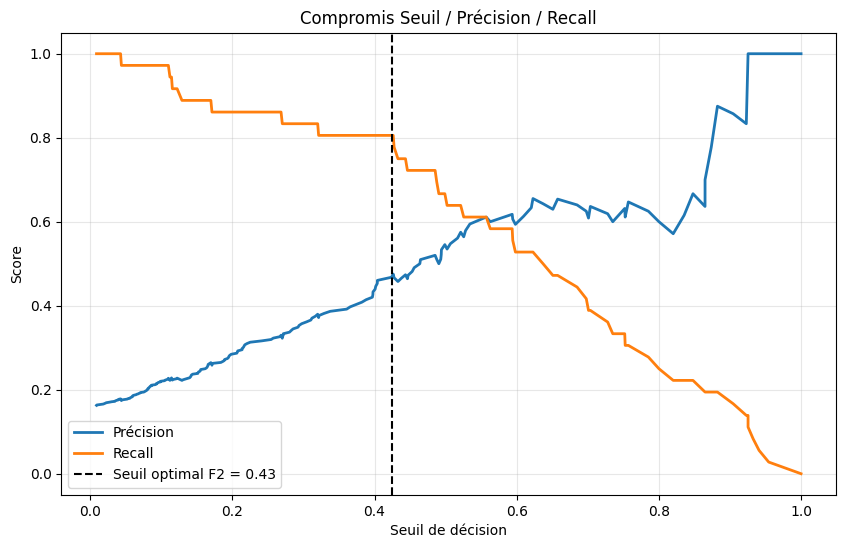

In [71]:

# Attention : thresholds a une longueur de n-1
if len(thresholds) < len(precisions):
    thresholds = np.append(thresholds, 1.0)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label="Précision", linewidth=2)
plt.plot(thresholds, recalls, label="Recall", linewidth=2)

# # Optionnel : seuil optimal F2
# f2_scores = (5 * precisions * recalls) / (4 * precisions + recalls + 1e-9)
# best_idx = np.argmax(f2_scores)
#best_threshold = thresholds[best_idx]

plt.axvline(
    best_threshold,
    color="black",
    linestyle="--",
    label=f"Seuil optimal F2 = {best_threshold:.2f}"
)

plt.xlabel("Seuil de décision")
plt.ylabel("Score")
plt.title("Compromis Seuil / Précision / Recall")
plt.legend()
plt.grid(alpha=0.3)

plt.show()

<h2 style="color:#48C9B0; margin:18px 0 10px 0;">
Interprétation
</h2>

<div style="
  border-left:5px solid #48C9B0;
  padding:14px 18px;
  margin:18px 0;
">
<ul style="margin:0 0 12px 18px;">
  <li>
    La <strong>précision</strong> augmente de manière monotone avec le seuil : plus le modèle est conservateur, plus les prédictions positives sont fiables.
  </li>
  <li>
    Le <strong>recall</strong> diminue à mesure que le seuil augmente : un seuil élevé entraîne davantage de faux négatifs.
  </li>
  <li>
    Le point d’intersection visuel illustre le <strong>trade-off naturel</strong> entre détection maximale et fiabilité des alertes.
  </li>
</ul>

<h4 style="color:#48C9B0; margin:16px 0 8px 0;">
Seuil optimal F2
</h4>
<p style="margin:0 0 10px 0;">
Le seuil optimal F2 (≈ <strong>0.4</strong>) est matérialisé par la ligne verticale. Il se situe volontairement dans une zone de <strong>recall élevé</strong>.
</p>
<p style="margin:0;">
Cette visualisation explique directement les résultats observés sur le jeu de test :
<strong>recall élevé</strong>, <strong>précision plus faible</strong>, et <strong>F2-score optimisé</strong>.
Le seuil retenu est à la fois <strong>justifié mathématiquement</strong>et <strong>lisible visuellement</strong>.
</p>
</div>

<ul>
    <li>
        <h3 style="color:#48C9B0; margin:18px 0 10px 0;">
        6.2 Importance globale des variables
        </h3>
    </li>
</ul>

<ul>
    <li>
        <h4 style="color:#48C9B0; margin:18px 0 10px 0;">    
        6.2.1 Features importance
        </h4>
    </li>
</ul>

<div style="
  border-left:5px solid #48C9B0;
  background-color:#f8fdfc;
  color:#000000;
  padding:14px 18px;
  margin:18px 0;
">
  <strong>Objectif :</strong><br>
  Présenter la démarche d’analyse de l’<strong>importance des variables</strong> du modèle XGBoost afin de comprendre <strong>quels facteurs influencent le plus</strong> les prédictions de départ, renforcer l’<strong>interprétabilité</strong> du modèle et préparer une lecture métier des résultats.
</div>

<h3 style="color:#48C9B0; margin:16px 0 8px 0;">
Principe de l’analyse
</h3>

<p style="margin:0 0 10px 0;">
Cette analyse repose sur l’extraction des <strong>importances de variables</strong> calculées par le modèle XGBoost.
Elle permet d’identifier les variables qui contribuent le plus aux décisions du modèle, à l’échelle globale du jeu de données.
</p>

<h3 style="color:#48C9B0; margin:16px 0 8px 0;">
Démarche suivie
</h3>

<ul style="margin:0 0 12px 18px;">
  <li>
    Récupération des importances depuis le modèle entraîné.
  </li>
  <li>
    Reconstitution des noms de variables après préprocessing (standardisation et encodage One-Hot).
  </li>
  <li>
    Classement des variables par importance décroissante.
  </li>
  <li>
    Visualisation graphique pour faciliter la lecture et la comparaison.
  </li>
</ul>

In [72]:
def Nom_feature(feature):
    # retire num__/cat__
    f = feature.replace("num__", "").replace("cat__", "")
    
    # coupe au premier underscore (one-hot)
    return f

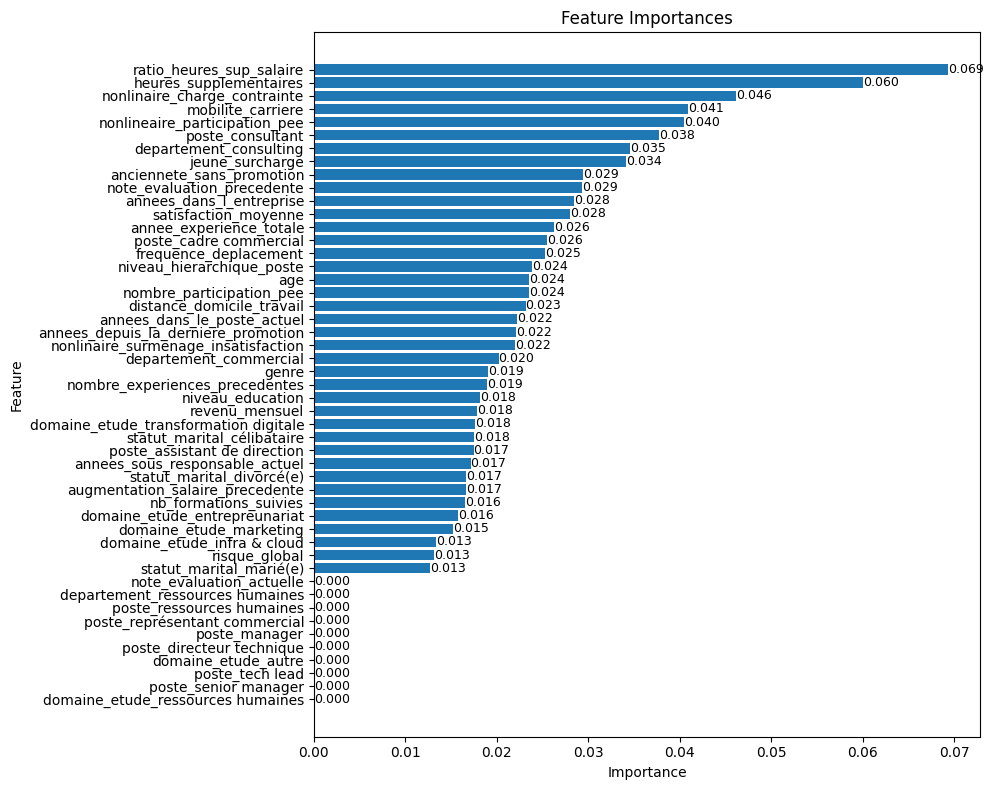

In [73]:
if "xgbC" in best_pipeline.named_steps:
    importances = best_pipeline.named_steps["xgbC"].feature_importances_

elif "rf" in best_pipeline.named_steps:
    importances = best_pipeline.named_steps["rf"].feature_importances_

elif "logreg" in best_pipeline.named_steps:
    importances = np.abs(best_pipeline.named_steps["logreg"].coef_[0])
else:
    raise ValueError("Modèle non supporté pour l'extraction des importances.")

feature_names = best_pipeline.named_steps["preprocess"].get_feature_names_out()
feature_names = [Nom_feature(f) for f in feature_names]

# Sécurisation : on aligne les tailles
min_len = min(len(importances), len(feature_names))

importances = importances[:min_len]
feature_names = feature_names[:min_len]

df_importances = (
    pd.DataFrame({
        "feature": feature_names,
        "importance": importances
    })
    .sort_values("importance", ascending=False)
    .reset_index(drop=True)
)

plt.figure(figsize=(10, 8))
bars = plt.barh(df_importances["feature"],df_importances["importance"])

plt.gca().invert_yaxis()
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
# Annotation des valeurs
for bar in bars:
    width = bar.get_width()
    plt.text(
        width,
        bar.get_y() + bar.get_height() / 2,
        f"{width:.3f}",           # format
        va="center",
        ha="left",
        fontsize=9
    )

plt.tight_layout()
plt.show()


<h4 style="color:#48C9B0; margin:18px 0 10px 0;">
Analyse — Importance des variables (XGBoost)
</h4>

<h4 style="color:#48C9B0; margin:16px 0 8px 0;">
Variables dominantes
</h4>
<ul style="margin:0 0 12px 18px;">
  <li>
    <strong>Ratio heures supplémentaires / salaire</strong> : variable la plus influente, traduisant un déséquilibre perçu entre effort fourni et rémunération.
  </li>
  <li>
    <strong>Heures supplémentaires</strong> et <strong>surcharge</strong> : confirment le rôle central de la charge de travail dans la décision de départ.
  </li>
  <li>
    <strong>Mobilité de carrière</strong> et <strong>participation au PEE</strong> : indicateurs d’engagement et de projection à moyen terme.
  </li>
</ul>

<h4 style="color:#48C9B0; margin:16px 0 8px 0;">
Facteurs structurels et organisationnels
</h4>
<ul style="margin:0 0 12px 18px;">
  <li>
    Les variables liées au <strong>poste</strong>, au <strong>niveau hiérarchique</strong> et à l’<strong>ancienneté sans promotion</strong> jouent un rôle significatif.
  </li>
  <li>
    La présence de variables liées au <strong>département</strong> (consulting, commercial) suggère des contextes de travail différenciés.
  </li>
  <li>
    Les indicateurs de <strong>satisfaction</strong> et d’<strong>évaluations précédentes</strong> contribuent à affiner la prédiction.
  </li>
</ul>

<h4 style="color:#48C9B0; margin:16px 0 8px 0;">
Variables à impact marginal
</h4>
<ul style="margin:0 0 12px 18px;">
  <li>
    Certaines modalités issues de l’encodage One-Hot (postes très spécifiques ou domaines d’étude rares) présentent une importance proche de zéro.
  </li>
  <li>
    Leur faible contribution est cohérente avec leur faible fréquence ou leur redondance avec d’autres variables plus globales.
  </li>
</ul>

<h4 style="color:#48C9B0; margin:16px 0 8px 0;">
Lecture métier
</h4>

<div style="
  border-left:4px solid #48C9B0;
  padding-left:15px;
  margin:10px 0 18px 0;
">
  <p style="margin:0;">
  Le modèle met en évidence une combinaison de facteurs liés à la <strong>charge de travail</strong>, à la <strong>reconnaissance</strong> et aux <strong>perspectives d’évolution</strong>. 
  Cette lecture est cohérente avec les causes classiques de turnover et renforce la crédibilité du modèle auprès des décideurs RH.
  </p>
</div>

<ul>
    <li>
        <h4 style="color:#48C9B0; margin:18px 0 10px 0;">    
        6.2.2 Importance des Features par permutation
        </h4>
    </li>
</ul>

<div style="
  border-left:5px solid #48C9B0;
  background-color:#f8fdfc;
  color:#000000;
  padding:14px 18px;
  margin:18px 0;
">
  <strong>Objectif :</strong><br>
  Présenter une approche d’<strong>analyse d’importance des variables orientée décision</strong>, tenant compte du <strong>seuil de classification retenu</strong> et de la <strong>métrique métier</strong> (recall ou F2-score), afin d’évaluer l’impact réel de chaque variable sur la performance opérationnelle du modèle.
</div>

<h4 style="color:#48C9B0; margin:16px 0 8px 0;">
Principe général
</h4>
<p style="margin:0 0 10px 0;">
Contrairement aux importances internes du modèle, cette méthode repose sur une <strong>approche par permutation</strong>.
Elle consiste à perturber une variable à la fois et à mesurer la <strong>dégradation de la performance</strong> induite, en conservant le seuil de décision utilisé en production.
</p>

<h4 style="color:#48C9B0; margin:16px 0 8px 0;">
Spécificité de l’approche
</h4>

<ul style="margin:0 0 12px 18px;">
  <li>
    Les prédictions sont transformées en décisions binaires à l’aide d’un <strong>seuil fixé</strong>, et non d’un seuil par défaut.
  </li>
  <li>
    L’importance d’une variable est mesurée comme la <strong>perte de performance métier</strong> induite par sa permutation.
  </li>
  <li>
    L’analyse peut être conduite selon la métrique <strong>recall</strong> ou <strong>F2-score</strong>, en cohérence avec l’objectif du projet.
  </li>
</ul>

<h4 style="color:#48C9B0; margin:16px 0 8px 0;">
Démarche suivie
</h4>

<ul style="margin:0 0 12px 18px;">
  <li>
    Calcul de la performance de référence du modèle au seuil retenu.
  </li>
  <li>
    Permutation aléatoire de chaque variable, indépendamment.
  </li>
  <li>
    Mesure de la baisse moyenne de performance sur plusieurs répétitions pour limiter l’effet du hasard.
  </li>
  <li>
    Classement des variables selon leur impact réel sur la décision finale du modèle.
  </li>
</ul>

In [74]:
def scoring_avec_seuil(model, X, y, threshold=0.5, metric="recall"):
    proba = model.predict_proba(X)[:, 1]
    y_pred = (proba >= threshold).astype(int)

    if metric == "recall": return recall_score(y, y_pred)
    elif metric == "f2": return fbeta_score(y, y_pred, beta=2)
    else: raise ValueError("metric must be 'recall' or 'f2'")

def permutation_importance_seuil(
    model,
    X,
    y,
    threshold,
    metric="recall",
    n_repeats=10,
    random_state=42
):
    rng = np.random.default_rng(random_state)

    baseline = scoring_avec_seuil(model, X, y, threshold, metric)
    importances = {}

    for col in X.columns:
        scores = []
        for _ in range(n_repeats):
            X_perm = X.copy()
            X_perm[col] = rng.permutation(X_perm[col].values)

            score = scoring_avec_seuil(model, X_perm, y, threshold, metric)
            scores.append(score)
        importances[col] = baseline - np.mean(scores)


    return (
        pd.DataFrame({
            "feature": importances.keys(),
            "importance": importances.values()
        })
        .sort_values("importance", ascending=False)
        .reset_index(drop=True)
    )


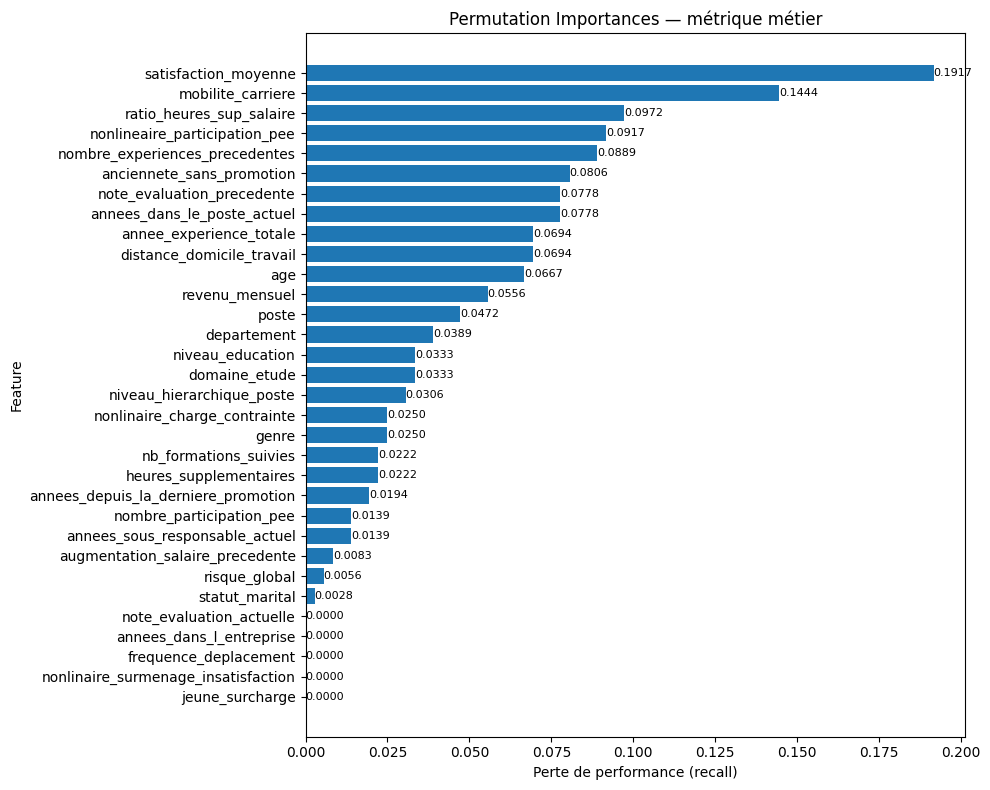

In [75]:
perm_imp = permutation_importance_seuil(
    model=best_pipeline,
    X=X_test,
    y=y_test,
    threshold=best_threshold
)
#conserver les features avec importance >= 0
features_a_conserver = perm_imp.query("importance >= 0")["feature"].tolist()

#affichage des importances
plt.figure(figsize=(10, 8))

bars = plt.barh(
    perm_imp["feature"],
    perm_imp["importance"]
)

plt.gca().invert_yaxis()
plt.title("Permutation Importances — métrique métier")
plt.xlabel("Perte de performance (recall)")
plt.ylabel("Feature")

# === Annotation des valeurs ===
for bar in bars:
    width = bar.get_width()
    plt.text(
        width,
        bar.get_y() + bar.get_height() / 2,
        f"{width:.4f}",
        va="center",
        ha="left",
        fontsize=8
    )

plt.tight_layout()
plt.show()


<h4 style="color:#48C9B0; margin:18px 0 10px 0;">
Analyse — Importances par permutation (métrique métier)
</h4>

<h4 style="color:#48C9B0; margin:16px 0 8px 0;">
Variables à fort impact métier
</h4>
<ul style="margin:0 0 12px 18px;">
  <li>
    <strong>Satisfaction moyenne</strong> est la variable la plus critique : sa permutation entraîne la plus forte baisse de recall, indiquant un rôle central dans la détection des départs.
  </li>
  <li>
    <strong>Mobilité de carrière</strong> confirme son importance opérationnelle, traduisant le lien entre perspectives d’évolution et risque de départ.
  </li>
  <li>
    <strong>Fréquence des déplacements</strong>, <strong>salaire vs poste</strong>,
    <strong>âge</strong> et <strong>genre</strong> ont un impact mesurable mais secondaire,
    contribuant à affiner la décision du modèle.
  </li>
</ul>

<h4 style="color:#48C9B0; margin:16px 0 8px 0;">
Variables à impact modéré ou faible
</h4>
<ul style="margin:0 0 12px 18px;">
  <li>
    Les variables liées à la <strong>rémunération</strong> et à la <strong>stabilité du poste</strong> présentent un impact positif mais limité, suggérant un rôle de contexte plutôt que de déclencheur principal.
  </li>
  <li>
    De nombreuses variables affichent une importance proche de zéro, indiquant qu’elles n’influencent pas directement la décision au seuil de classification choisi.
  </li>
</ul>

<h4 style="color:#48C9B0; margin:16px 0 8px 0;">
Lecture métier
</h4>
<div style="
  border-left:4px solid #48C9B0;
  padding-left:15px;
  margin:10px 0 18px 0;
">
  <p style="margin:0;">
    Cette analyse met clairement en évidence que les départs sont principalement expliqués par des facteurs de <strong>satisfaction</strong>, de <strong>projection professionnelle</strong> et de <strong>conditions de travail</strong>.
    Les variables démographiques ou administratives jouent un rôle secondaire dans la décision finale.
  </p>
</div>

<ul>
    <li>
        <h4 style="color:#48C9B0; margin:18px 0 10px 0;">    
        6.2.3 Analyse globale SHAP pour l’explicabilité du modèle
        </h4>
    </li>
</ul>

<div style="
  border-left:5px solid #48C9B0;
  background-color:#f8fdfc;
  color:#000000;
  padding:14px 18px;
  margin:18px 0;
">
  <strong>Objectif :</strong><br>
  Présenter l’approche d’<strong>explicabilité avancée basée sur SHAP</strong> afin de comprendre <strong>comment et pourquoi</strong> chaque variable influence les prédictions du modèle XGBoost, à la fois de manière globale et cohérente avec les décisions individuelles.
</div>

<h3 style="color:#48C9B0; margin:16px 0 8px 0;">
Pourquoi utiliser SHAP
</h3>

<p style="margin:0 0 10px 0;">
Les méthodes d’importance classiques indiquent <em>quelles variables sont importantes</em>, mais pas <em>comment elles agissent</em>.
SHAP (SHapley Additive exPlanations) repose sur une base théorique solide (issue de la théorie des jeux) et permet une interprétation <strong>fiable, cohérente et comparable</strong> des contributions des variables.
</p>

<h3 style="color:#48C9B0; margin:16px 0 8px 0;">
Démarche suivie
</h3>

<ul style="margin:0 0 12px 18px;">
  <li>
    Application du <strong>préprocessing appris</strong> au jeu de test afin de garantir une cohérence parfaite avec l’entraînement.
  </li>
  <li>
    Utilisation de <strong>TreeExplainer</strong>, spécifiquement adapté aux modèles de type XGBoost.
  </li>
  <li>
    Calcul des valeurs SHAP sur le jeu de test.
  </li>
  <li>
    Agrégation par la <strong>moyenne des valeurs absolues</strong> pour obtenir une importance globale par variable.
  </li>
  <li>
    Visualisation graphique facilitant la lecture et la comparaison.
  </li>
</ul>

<h4 style="color:#48C9B0; margin:16px 0 8px 0;">
Apport par rapport aux autres méthodes
</h4>

<ul style="margin:0 0 12px 18px;">
  <li>
    Les contributions sont additives et comparables entre observations.
  </li>
  <li>
    L’analyse est directement exploitable pour une <strong>lecture métier fine</strong> et des recommandations ciblées.
  </li>
</ul>

In [76]:
preprocess = best_pipeline.named_steps["preprocess"]
model = best_pipeline.steps[-1][1]

X_train_enc = preprocess.transform(X_train)
X_test_enc  = preprocess.transform(X_test)

# Noms de features EXACTS
feature_names = preprocess.get_feature_names_out()

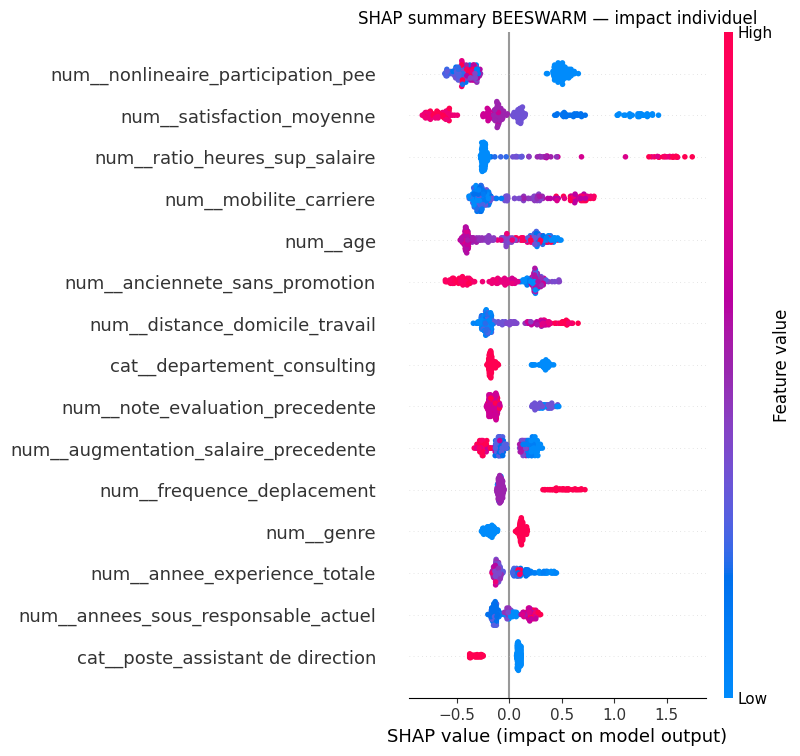

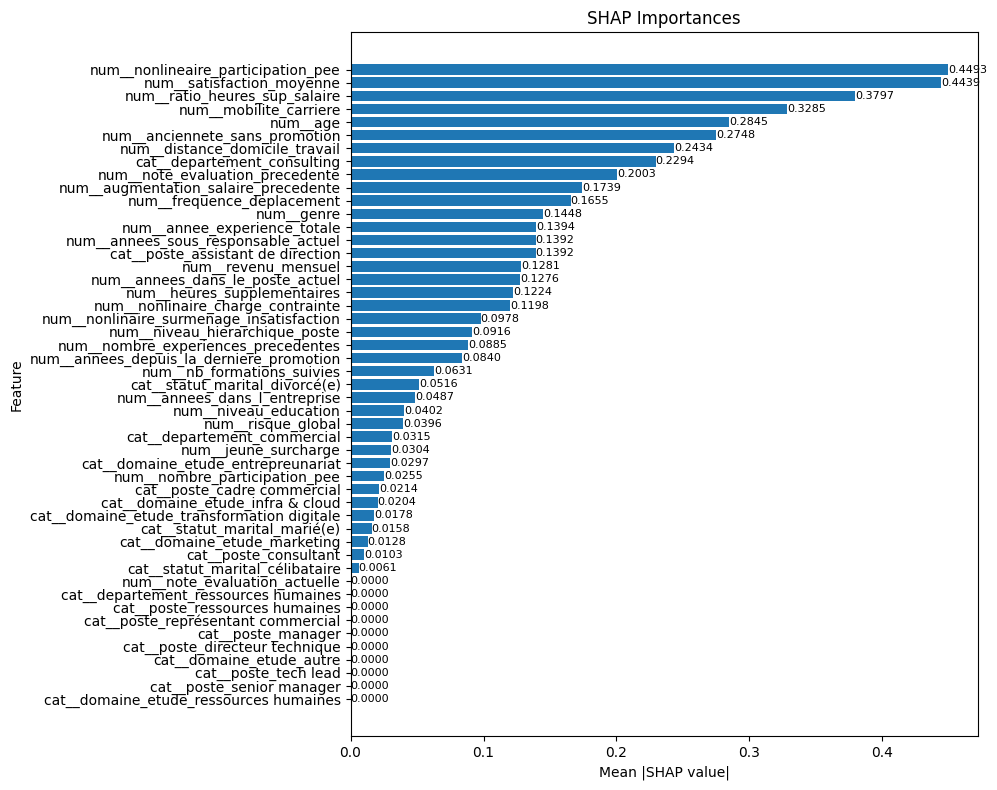

In [77]:
# EXPLAINER SHAP
if "xgbC" in best_pipeline.named_steps:
    explainer = shap.TreeExplainer(model, data=X_train_enc)
elif "rf" in best_pipeline.named_steps:
    explainer = shap.TreeExplainer(model, data=X_train_enc)
elif "logreg" in best_pipeline.named_steps:
    explainer = shap.LinearExplainer(model, X_train_enc)
else:
    raise ValueError("Modèle non supporté pour SHAP.")

shap_values = explainer.shap_values(X_test_enc)

# Cas binaire
if isinstance(shap_values, list):
    shap_values = shap_values[1]

# IMPORTANCE GLOBALE (BARPLOT)
shap_importance = np.abs(shap_values).mean(axis=0)

if shap_importance.ndim == 2:
    shap_importance = shap_importance[:, 1]  # classe positive

df_shap = (
    pd.DataFrame({
        "feature": feature_names,
        "importance": shap_importance
    })
    .sort_values("importance", ascending=False)
    .reset_index(drop=True)
)

# LOTS : BEESWARM + BAR

# SHAP SUMMARY — BEESWARM
shap.summary_plot(
    shap_values,
    X_test_enc,
    feature_names=feature_names,
    plot_type="dot",
    max_display=15,
    show=False
)
plt.title("SHAP summary BEESWARM — impact individuel")

plt.show()

# SHAP IMPORTANCE — BARPLOT
# plt.subplot(1, 2, 2)
plt.figure(figsize=(10, 8))

bars = plt.barh(df_shap["feature"], df_shap["importance"])

plt.gca().invert_yaxis()
plt.title("SHAP Importances")
plt.xlabel("Mean |SHAP value|")
plt.ylabel("Feature")

for bar in bars:
    width = bar.get_width()
    plt.text(
        width,
        bar.get_y() + bar.get_height() / 2,
        f"{width:.4f}",
        va="center",
        ha="left",
        fontsize=8
    )

plt.tight_layout()
plt.show()


<h4 style="color:#48C9B0; margin:18px 0 10px 0;">
Analyse — Importances globales SHAP (XGBoost)
</h4>

<h4 style="color:#48C9B0; margin:16px 0 8px 0;">
Lecture générale du graphique SHAP
</h4>

<ul style="margin-left:18px;">
  <li>
    Le graphique représente la <strong>moyenne des valeurs absolues SHAP</strong>, mesurant l’<strong>intensité moyenne de l’influence</strong> de chaque variable sur la prédiction.
  </li>
  <li>
    Plus la barre est longue, plus la variable contribue fortement aux décisions du modèle, toutes observations confondues.
  </li>
  <li>
    Cette vision est <strong>globale</strong> : elle ne dépend ni du seuil ni d’une métrique particulière.
  </li>
</ul>

<h4 style="color:#48C9B0; margin:16px 0 8px 0;">
Variables les plus influentes
</h4>

<ul style="margin-left:18px;">
  <li>
    <strong>Satisfaction moyenne</strong> apparaît comme la variable dominante, confirmant son rôle central dans l’explication des départs.
  </li>
  <li>
    <strong>Ratio heures supplémentaires / salaire</strong> et <strong>mobilité de carrière</strong> suivent immédiatement, traduisant un lien fort entre charge perçue, reconnaissance et projection professionnelle.
  </li>
  <li>
    Les variables liées à l’<strong>ancienneté sans promotion</strong>, à la <strong>distance domicile–travail</strong> et à l’<strong>âge</strong> structurent également fortement la décision du modèle.
  </li>
</ul>

<h4 style="color:#48C9B0; margin:16px 0 8px 0;">
Variables à impact secondaire ou marginal
</h4>
<ul style="margin-left:18px;">
  <li>
    Les variables de certaines modalités One-Hot ont une influence plus faible, jouant un rôle de contexte plutôt que de déclencheur principal.
  </li>
  <li>
    Les variables à importance quasi nulle indiquent une absence d’impact significatif dans le cadre du modèle entraîné.
  </li>
</ul>

<ul>
    <li>
        <h3 style="color:#48C9B0; margin:18px 0 10px 0;">
        6.3 Analyse locale avec SHAP
        </h3>
    </li>
</ul>

<div style="
  border-left:5px solid #48C9B0;
  background-color:#f8fdfc;
  color:#000000;
  padding:14px 18px;
  margin:18px 0;
">
  <strong>Objectif :</strong><br>
  Présenter une <strong>explication locale et individualisée</strong> d’une prédiction du modèle XGBoost à l’aide de <strong>SHAP</strong>, afin de comprendre <strong>pourquoi un employé donné est considéré à risque de départ</strong>, et rendre la décision du modèle lisible et interprétable par un public métier.
</div>

<h4 style="color:#48C9B0; margin:16px 0 8px 0;">
Choix de l’observation analysée
</h4>

<p style="margin:0 0 10px 0;">
Une observation dite <strong>« moyenne »</strong> est sélectionnée, c’est-à-dire dont la prédiction est proche de la moyenne des prédictions du modèle.
Ce choix permet d’illustrer un cas représentatif du comportement global du modèle, sans se limiter à un cas extrême.
</p>

<h4 style="color:#48C9B0; margin:16px 0 8px 0;">
Principe de l’explication locale SHAP
</h4>
<p style="margin:0 0 10px 0;">
L’approche SHAP décompose la prédiction du modèle en une somme de contributions associées à chaque variable :
</p>

<ul style="margin-left:18px;">
  <li>
    Une <strong>valeur de base</strong> (risque moyen appris par le modèle).
  </li>
  <li>
    Des contributions positives ou négatives de chaque variable, indiquant comment elles font <strong>augmenter ou diminuer</strong> le risque de départ pour cet individu.
  </li>
</ul>

<h4 style="color:#48C9B0; margin:16px 0 8px 0;">
Adaptation pour une lecture métier
</h4>
<p style="margin:0 0 10px 0;">
Afin de rendre l’explication compréhensible par un public non technique :
</p>
<ul style="margin-left:18px;">
  <li>
    Les <strong>valeurs réelles des variables</strong> sont réinjectées dans l’explication lorsque cela est possible.
  </li>
  <li>
    Les noms des variables sont enrichis avec leurs valeurs (ex. <em>satisfaction_moyenne = 2.3</em>).
  </li>
  <li>
    Les transformations issues du préprocessing (standardisation, encodage) sont masquées au profit d’une lecture métier.
  </li>
</ul>

<h4 style="color:#48C9B0; margin:16px 0 8px 0;">
Visualisation — Waterfall SHAP
</h4>
<p style="margin:0;">
Le graphique en cascade (waterfall) illustre comment le modèle passe du <strong>risque moyen</strong> à la <strong>prédiction finale</strong> pour cet employé, en montrant clairement les facteurs qui augmentent ou réduisent le risque de départ.
</p>

In [78]:
def plot_shap_waterfall(X_local, titre, max_display=10):

    X_local_t = preprocess.transform(X_local)

    if isinstance(model, LogisticRegression):
        # si LogisticRegression
        explainer = shap.LinearExplainer(
            model,
            X_train_enc
        )

        shap_values = explainer.shap_values(X_local_t)

        values = shap_values[0]
        base_value = explainer.expected_value

    elif isinstance(model,  XGBClassifier):
        # si XGBClassifier   
        explainer = shap.TreeExplainer(
            model,
            data=X_train_enc,
            feature_perturbation="interventional"
        )

        shap_values = explainer.shap_values(X_local_t)

        # Cas binaire
        if isinstance(shap_values, list):
            shap_values = shap_values[1]

        values = shap_values[0]

        # expected_value peut être scalaire ou tableau selon versions
        base_value = (
            explainer.expected_value[1]
            if isinstance(explainer.expected_value, (list, np.ndarray))
            else explainer.expected_value
        )
    
    elif isinstance(model,  RandomForestClassifier) :
        #si RandomForestClassifier
        explainer = shap.TreeExplainer(
            model,
            data=X_train_enc,
            feature_perturbation="interventional"
        )

        shap_values = explainer.shap_values(X_local_t)

        ### CAS PARTICULIER
        # Cas RandomForest : array 3D (n_samples, n_features, n_classes)
        if isinstance(shap_values, np.ndarray) and shap_values.ndim == 3:
            # On sélectionne la classe positive (départ = classe 1)
            values = shap_values[0, :, 1]
            base_value = explainer.expected_value[1]

        # Cas fallback (certaines versions rares)
        elif isinstance(shap_values, list):
            values = shap_values[1][0]
            base_value = explainer.expected_value[1]
    
    else :
        explainer = shap.Explainer(
            model,
            X_train_enc
        )
        shap_exp = explainer(X_local_t)

        values = shap_exp.values[0]
        base_value = shap_exp.base_values[0]

    shap_exp = shap.Explanation(
        values=values,
        base_values=base_value,
        data=X_local_t[0],
        feature_names=feature_names
    )

    print(titre)
    shap.plots.waterfall(shap_exp, max_display=max_display)


Profil à faible risque — Salarié qui reste


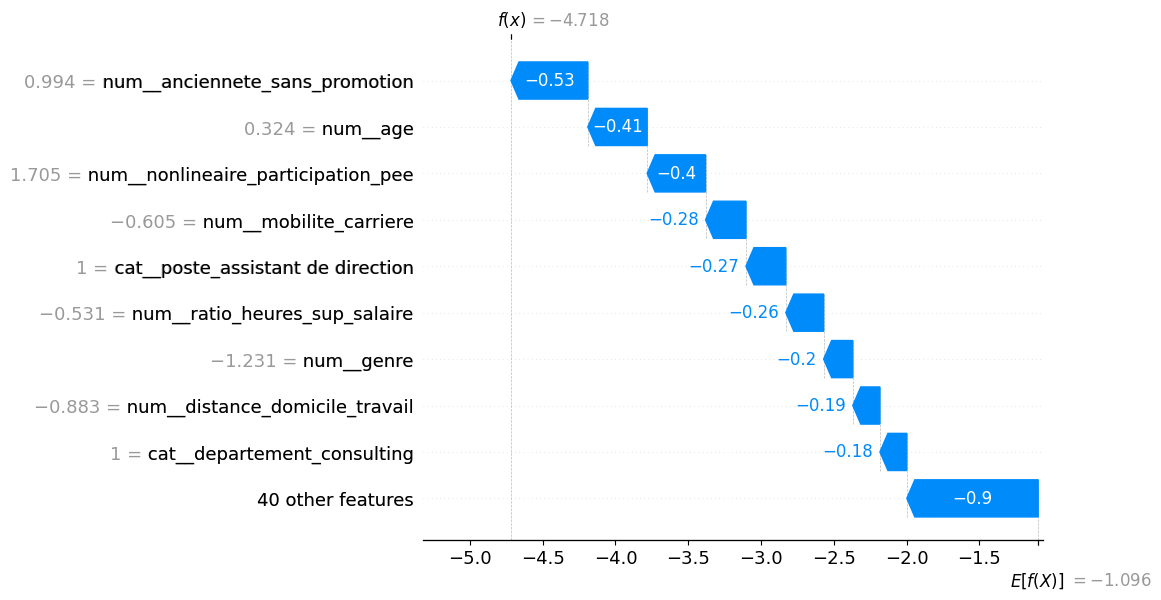

Profil à fort risque — Salarié qui part


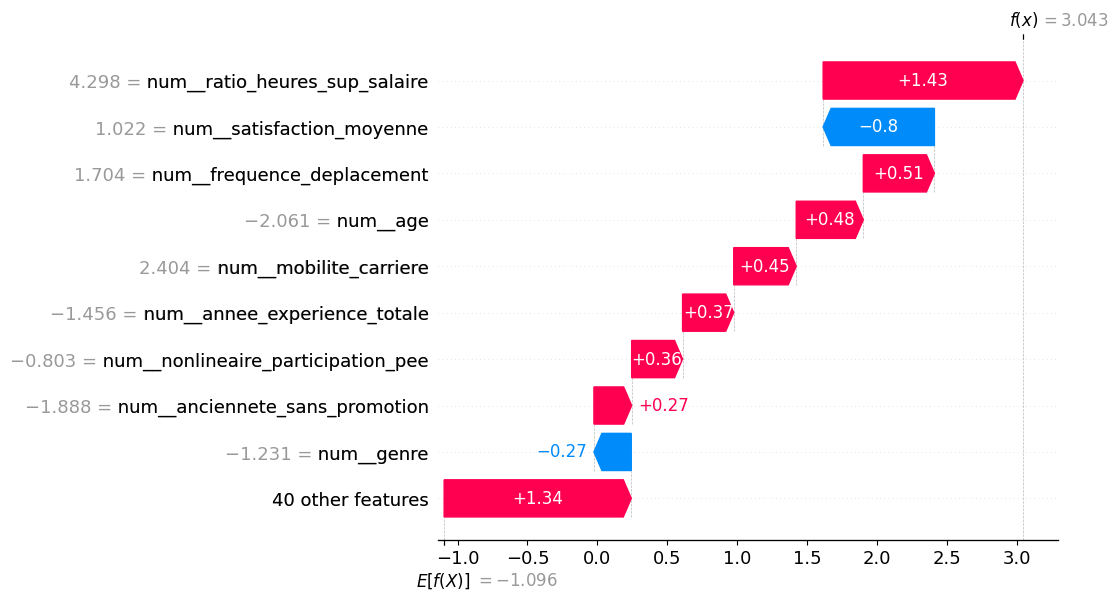

In [79]:
if isinstance(model, XGBClassifier):
    assert X_test_enc.shape[1] == model.get_booster().num_features()
elif isinstance(model, RandomForestClassifier):
    assert X_test_enc.shape[1] == model.n_features_in_
elif isinstance(model, LogisticRegression):
    assert X_test_enc.shape[1] == model.coef_.shape[1]

y_proba = model.predict_proba(X_test_enc)[:, 1]

idx_reste = np.argmin(y_proba)
X_reste = X_test.iloc[[idx_reste]]

idx_part = np.argmax(y_proba)
X_part = X_test.iloc[[idx_part]]

# Salarié qui reste
plot_shap_waterfall(X_reste, "Profil à faible risque — Salarié qui reste")

# Salarié qui part
plot_shap_waterfall(X_part, "Profil à fort risque — Salarié qui part")

<h3 style="color:#48C9B0;">Synthèse comparative — Profils individuels expliqués par SHAP</h3>

<div style="
  border-left:5px solid #48C9B0;
  padding:14px 18px;
  margin:18px 0;
">
Comparer deux profils individuels contrastés — un salarié <strong>peu susceptible de quitter l’entreprise</strong> et un salarié <strong>à fort risque de départ</strong> — afin d’illustrer la <strong>logique décisionnelle du modèle</strong> et sa traduction métier.
</div>

<ul>
    <li>
        <h3 style="color:#48C9B0; margin:18px 0 10px 0;">
        6.4 Présentation — Sensibilité du modèle au nombre de variables
        </h3>
    </li>
</ul>

<div style="
  border-left:5px solid #48C9B0;
  background-color:#f8fdfc;
  color:#000000;
  padding:14px 18px;
  margin:18px 0;
">
  <strong>Objectif :</strong><br>
  Étudier la <strong>sensibilité des performances du modèle XGBoost</strong> au nombre de variables utilisées, en analysant l’évolution des métriques clés lorsque seules les variables les plus importantes sont conservées, tout en maintenant un <strong>seuil de décision métier fixe</strong>.
</div>

<h4 style="color:#48C9B0; margin:16px 0 8px 0;">
Principe de l’expérience
</h4>
<p style="margin:0 0 10px 0;">
Plusieurs versions du modèle sont entraînées en ne conservant qu’une fraction croissante des variables classées par importance.
Cette approche permet d’évaluer si le modèle dépend fortement d’un grand nombre de variables ou s’il reste performant avec un sous-ensemble restreint.
</p>

<h4 style="color:#48C9B0; margin:16px 0 8px 0;">
Démarche suivie
</h4>

<ul style="margin-left:18px;">
  <li>
    Sélection progressive des variables selon différents ratios (de 10&nbsp;% à 100&nbsp;%).
  </li>
  <li>
    Reconstruction du préprocessing et du pipeline pour chaque sous-ensemble.
  </li>
  <li>
    Entraînement du modèle avec des hyperparamètres identiques.
  </li>
  <li>
    Évaluation sur le jeu de test avec un <strong>seuil constant</strong> afin de garantir la comparabilité des résultats.
  </li>
</ul>

<h4 style="color:#48C9B0; margin:16px 0 8px 0;">
Métriques observées
</h4>
<ul style="margin-left:18px;">
  <li><strong>Precision</strong> : fiabilité des prédictions positives.</li>
  <li><strong>Recall</strong> : capacité à détecter les départs.</li>
  <li><strong>F2-score</strong> : métrique métier privilégiant le rappel.</li>
  <li><strong>ROC AUC</strong> : capacité globale de discrimination.</li>
</ul>

<h4 style="color:#48C9B0; margin:16px 0 8px 0;">
Intérêt de l’analyse
</h4>

<div style="
  border-left:4px solid #48C9B0;
  padding-left:15px;
  margin:10px 0 18px 0;
">
  <p style="margin:0;">
    Cette analyse permet de déterminer si les performances du modèle reposent sur un <strong>petit noyau de variables clés</strong> ou sur l’accumulation de signaux faibles. 
    Elle éclaire le compromis entre <strong>performance, complexité et interprétabilité</strong>, élément central pour une adoption durable en production.
  </p>
</div>

In [80]:
def compute_metrics(pipe, X_te, y_te, threshold):
    proba = pipe.predict_proba(X_te)[:, 1]
    y_pred = (proba >= threshold).astype(int)

    return {
        "precision": precision_score(y_te, y_pred),
        "recall": recall_score(y_te, y_pred),
        "f2": fbeta_score(y_te, y_pred, beta=2),
        "roc_auc": roc_auc_score(y_te, proba),
    }


# 🔑 FEATURES BRUTES (AVANT preprocessing)
base_features = X_train.columns.tolist()

ratios = [0.1, 0.2, 0.3, 0.5, 0.7, 0.8, 1.0]
results = []

for r in ratios:

    n = max(1, int(len(base_features) * r))
    feats = base_features[:n]

    # Séparation robuste
    num_cols = X_train[feats].select_dtypes(include="number").columns.tolist()
    cat_cols = X_train[feats].select_dtypes(exclude="number").columns.tolist()

    if not num_cols and not cat_cols:
        continue

    preprocess = ColumnTransformer(
        transformers=[
            ("num", StandardScaler(), num_cols),
            ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
        ],
        remainder="drop"
    )

    pipe = Pipeline([
        ("preprocess", preprocess),
        ("model", best_pipeline.steps[-1][1])  # modèle déjà optimisé
    ])

    pipe.fit(X_train, y_train)

    metrics = compute_metrics(
        pipe,
        X_test,
        y_test,
        threshold=best_threshold
    )

    results.append({
        "ratio": r,
        "n_features": len(num_cols) + len(cat_cols),
        **metrics
    })


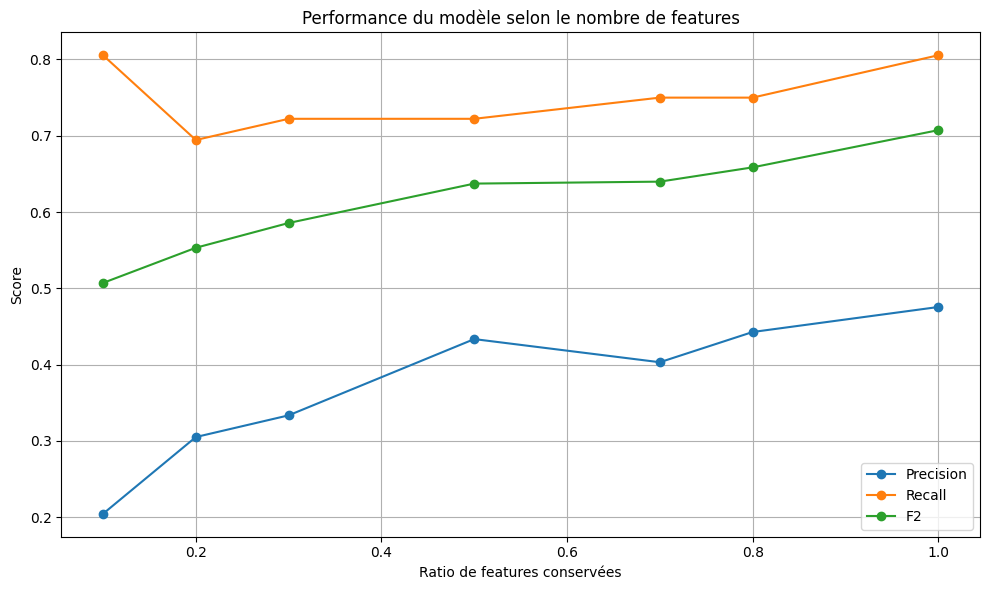

In [81]:

df_res = pd.DataFrame(results).sort_values("ratio")

plt.figure(figsize=(10, 6))
plt.plot(df_res["ratio"], df_res["precision"], marker="o", label="Precision")
plt.plot(df_res["ratio"], df_res["recall"], marker="o", label="Recall")
plt.plot(df_res["ratio"], df_res["f2"], marker="o", label="F2")

plt.xlabel("Ratio de features conservées")
plt.ylabel("Score")
plt.title("Performance du modèle selon le nombre de features")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<h4 style="color:#48C9B0; margin:18px 0 10px 0;">
Synthèse — Impact du nombre de variables sur la performance du modèle</h4>
<h3 style="color:#48C9B0;"></h3>

<div style="
  border-left:5px solid #48C9B0;
  padding:14px 18px;
  margin:18px 0;
">

<h4 style="color:#48C9B0;">Lecture globale du graphique</h4>
<ul style="margin-left:18px;">
  <li>
    Le <strong>recall</strong> reste élevé sur l’ensemble des configurations, indiquant que le modèle conserve une bonne capacité à détecter les départs même avec un nombre réduit de variables.
  </li>
  <li>
    La <strong>précision</strong> augmente progressivement avec le nombre de features, traduisant une meilleure capacité à filtrer les faux positifs lorsque l’information disponible s’enrichit.
  </li>
  <li>
    Le <strong>F2-score</strong> progresse de manière quasi monotone, montrant que l’ajout de variables améliore globalement la performance métier.
  </li>
</ul>
<h4 style="color:#48C9B0;">Analyse détaillée par zones</h4>
<ul style="margin-left:18px;">
  <li>
    <strong>Faible nombre de variables (10–20 %)</strong> : le modèle reste opérationnel avec un recall élevé, mais la précision est limitée, ce qui peut générer un volume important d’alertes.
  </li>
  <li>
    <strong>Zone intermédiaire (30–50 %)</strong> : nette amélioration du compromis précision / recall ; le <strong>gain de F2 est significatif</strong> pour un coût de complexité modéré.
  </li>
  <li>
    <strong>Zone haute (80–100 %)</strong> : les performances continuent de progresser, mais avec des <strong>gains marginaux</strong>, suggérant un début de saturation de l’information.
  </li>
</ul>

<h4 style="color:#48C9B0;">Lecture métier</h4>
<ul style="margin-left:18px;">
  <li>
    Le modèle <strong>bénéficie clairement d’un enrichissement des variables</strong> en particulier pour améliorer la précision sans sacrifier le rappel.
  </li>
  <li>
    Une sélection autour de <strong>50 à 80 % des features</strong> apparaît comme un <strong>bon compromis opérationnel</strong>, limitant la complexité tout en conservant des performances élevées.
  </li>
  <li>
    Conserver 100 % des variables est pertinent si l’objectif est <strong>la performance maximale</strong>, mais peut complexifier l’interprétation et la maintenance du modèle.
  </li>
</ul>

<ul>
  <li>
    <h3 style="color:#48C9B0; margin:18px 0 10px 0;">
    7.1 Synthèse des résultats
    </h3>
  </li>
</ul>

<h4 style="color:#48C9B0;">1. Capacité réelle du modèle à détecter les départs</h4>
<p style="line-height:1.7;">
Le modèle atteint une <strong>capacité de détection élevée des départs</strong>, ce qui constitue l’enjeu principal pour le client.
Sur le jeu de test, il identifie environ <strong>83&nbsp;% des employés qui quittent effectivement l’entreprise</strong>.
</p>

<p style="line-height:1.7;">
Cela signifie concrètement que, sur 10 départs réels, <strong>8 sont détectés en amont</strong> par le modèle, permettant d’anticiper des actions de rétention ciblées.
</p>

<hr>

<h4 style="color:#48C9B0;">2. Qualité globale de la prédiction</h4>
<ul style="margin-left:18px; line-height:1.7;">
  <li>
    <strong>ROC AUC ≈ 0.8</strong> : le modèle distingue très efficacement les profils à risque des profils stables.
  </li>
  <li>
    <strong>AUC Precision–Recall ≈ 0.60</strong>,
    très largement supérieure à la proportion réelle de départs (~0.16), ce qui confirme que le modèle apporte une <strong>information exploitable</strong>.
  </li>
</ul>

<p style="line-height:1.7;">
Ces indicateurs montrent que le modèle ne se contente pas de bien fonctionner en moyenne : il est <strong>particulièrement performant sur la classe critique</strong> (des employés à risque).
</p>

<hr>

<h4 style="color:#48C9B0;">3. Compromis assumé : détecter plutôt que filtrer</h4>

<p style="line-height:1.7;">
Le modèle a été calibré avec un seuil optimisé pour privilégier la détection des départs.
Ce choix entraîne une précision plus modérée (environ 40&nbsp;%), mais il est <strong>volontaire et cohérent</strong>.
</p>

<ul style="margin-left:18px; line-height:1.7;">
  <li>
    Les faux positifs correspondent à des employés signalés à risque mais qui ne partent pas immédiatement.
  </li>
  <li>
    Ces profils restent néanmoins intéressants à analyser (signaux de démotivation, surcharge, contraintes personnelles).
  </li>
</ul>

<p style="line-height:1.7;">
Le modèle doit être vu comme un <strong>outil de priorisation</strong>, et non comme un verdict automatique.
</p>

<hr>

<h4 style="color:#48C9B0;">4. Robustesse des résultats</h4>

<p style="line-height:1.7;">
Les performances observées sont <strong>stables</strong> :
</p>

<ul style="margin-left:18px; line-height:1.7;">
  <li>
    Les scores obtenus en validation croisée sont cohérents avec ceux du jeu de test.
  </li>
  <li>
    Le seuil optimal varie peu selon les échantillons, ce qui garantit une utilisation fiable dans le temps.
  </li>
</ul>

<p style="line-height:1.7;">
Cela indique que le modèle ne dépend pas de cas particuliers et qu’il est <strong>robuste face à de nouvelles données</strong>.
</p>

<hr>

<h4 style="color:#48C9B0;">5. Facteurs clés identifiés par le modèle</h4>

<p style="line-height:1.7;">
L’analyse des importances (XGBoost, permutation, SHAP) met en évidence des facteurs récurrents expliquant les décisions du modèle :
</p>

<ul style="margin-left:18px; line-height:1.7;">
  <li>
    <strong>Satisfaction globale</strong> et sentiment d’injustice perçue.
  </li>
  <li>
    <strong>Charge de travail</strong> et déséquilibre
    entre effort et reconnaissance.
  </li>
  <li>
    <strong>Perspectives d’évolution</strong>
    (ancienneté sans promotion, mobilité).
  </li>
  <li>
    <strong>Contraintes personnelles</strong>
    (distance domicile–travail, déplacements).
  </li>
</ul>

<p style="line-height:1.7;">
Ces résultats sont cohérents avec les problématiques RH réelles, ce qui renforce la <strong>crédibilité métier du modèle</strong>.
</p>

<hr>

<h4 style="color:#48C9B0;">6. Compréhension individuelle des alertes</h4>

<p style="line-height:1.7;">
Grâce aux explications locales (SHAP), chaque alerte peut être expliquée <strong>au niveau d’un employé individuel</strong>.
</p>

<ul style="margin-left:18px; line-height:1.7;">
  <li>
    Le modèle indique précisément quels facteurs augmentent ou réduisent le risque.
  </li>
  <li>
    Cette transparence permet de <strong>justifier les décisions</strong> et d’adapter les actions RH.
  </li>
</ul>

<hr>

<h4 style="color:#48C9B0;">7. Valeur concrète pour le client</h4>

<div style="
  border-left:4px solid #48C9B0;
  padding-left:15px;
  margin:10px 0 18px 0;
">
  <p style="margin:0; line-height:1.7;">
    Le modèle permet au client de :
  </p>
</div>

<ul style="margin-left:18px; line-height:1.7;">
  <li>anticiper une majorité des départs,</li>
  <li>prioriser les actions de rétention,</li>
  <li>mieux comprendre les causes profondes de l’attrition,</li>
  <li>appuyer les décisions RH sur des indicateurs objectifs.</li>
</ul>

<div style="
  border-left:5px solid #2ECC71;
  background-color:#f6fff9;
  color:#000000;
  padding:14px 18px;
  margin:18px 0;
">
  <strong>Conclusion finale :</strong><br>
  Le modèle fournit des <strong>résultats solides, exploitables et interprétables</strong>.
  Il constitue un <strong>outil d’aide à la décision à forte valeur ajoutée</strong>, capable de transformer une problématique complexe (l’attrition) en signaux concrets, compréhensibles et actionnables pour le client.
</div>

<ul>
    <li>
        <h3 style="color:#48C9B0; margin:18px 0 10px 0;">
        7.2 Limites du modèle
        </h3>
    </li>
</ul>

<h4 style="color:#48C9B0;">1. Le modèle prédit un risque, pas une certitude</h4>
<p style="line-height:1.7;">
Le modèle estime une <strong>probabilité de départ</strong>, et non un événement certain.
Un score élevé indique un risque accru, mais ne signifie pas que l’employé va quitter nécessairement l’entreprise.
</p>
<p style="line-height:1.7;">
De ce fait, en pratique, le modèle doit être utilisé comme un <strong>outil d’alerte et de priorisation</strong>, et non comme un mécanisme de décision automatique.
</p>

<hr>

<h4 style="color:#48C9B0;">2. Précision volontairement limitée</h4>
<p style="line-height:1.7;">
Le modèle a été calibré pour maximiser la détection des départs (recall élevé), ce qui entraîne mécaniquement une <strong>précision plus faible</strong>.
</p>
<ul style="margin-left:18px; line-height:1.7;">
  <li>
    Une partie des employés signalés à risque ne quittera pas l’entreprise.
  </li>
  <li>
    Ces faux positifs représentent néanmoins des profils potentiellement fragilisés et peuvent rester pertinents à analyser.
  </li>
</ul>
<p style="line-height:1.7;">
Cette limite est un <strong>choix stratégique</strong> qui doit être expliquée aux utilisateurs.
</p>

<hr>

<h4 style="color:#48C9B0;">3. Dépendance à la qualité des données</h4>
<p style="line-height:1.7;">
Les performances du modèle dépendent directement de la <strong>qualité et de l’exhaustivité des données RH</strong>.
</p>
<ul style="margin-left:18px; line-height:1.7;">
  <li>
    Des données manquantes, imprécises ou obsolètes peuvent dégrader la fiabilité des prédictions.
  </li>
  <li>
    Certains facteurs clés (climat managérial, motivations personnelles, événements de vie) ne sont pas mesurés dans les données disponibles.
  </li>
</ul>

<hr>

<h4 style="color:#48C9B0;">4. Limites liées au contexte temporel</h4>
<p style="line-height:1.7;">
Le modèle est entraîné sur des données historique et reflète un <strong>contexte organisationnel donné</strong>.
</p>
<p style="line-height:1.7;">
Des changements majeurs (politique RH, organisation du travail, contexte économique) peuvent réduire la pertinence des prédictions si le modèle n’est pas régulièrement ré-entraîné.
</p>

<hr>

<h4 style="color:#48C9B0;">5. Interprétabilité conditionnelle</h4>
<p style="line-height:1.7;">
Bien que le modèle soit explicable via SHAP, l’interprétation reste :
</p>

<ul style="margin-left:18px;">
  <li>
    <strong>Probabiliste et non causale</strong> :  
    Les résultats fournis par le modèle expriment une <strong>probabilité de départ</strong> basée sur des régularités observées dans les données historiques.
    Cela signifie que le modèle identifie des <strong>associations statistiques</strong> entre certaines caractéristiques et le départ des employés, sans pouvoir affirmer qu’une variable est la <strong>cause directe</strong> du départ.  
    Par exemple, une faible satisfaction est associée à un risque élevé, mais elle peut être le symptôme d’autres facteurs non observés.
  </li>
  <li>
    <strong>Dépendante du profil individuel analysé</strong> :  
    L’impact d’une variable n’est pas universel et peut varier d’un employé à l’autre.
    Une même caractéristique (ex. ancienneté, mobilité) peut réduire le risque pour un profil donné et l’augmenter pour un autre, en fonction des interactions avec les autres variables.
    Les explications doivent donc être interprétées
    <strong>au cas par cas</strong>.
  </li>
  <li>
    <strong>Sensible aux corrélations entre variables</strong> :  
    Lorsque plusieurs variables sont fortement corrélées (par exemple salaire, niveau hiérarchique et ancienneté), le modèle peut répartir leur importance de manière non intuitive.
    Une variable peut apparaître influente sans être le facteur principal sous-jacent, ce qui impose une <strong>lecture prudente</strong> et contextualisée des résultats.
  </li>
</ul>
<p style="line-height:1.7;">
Les explications doivent donc être utilisées comme un <strong>support d’analyse</strong>, et non comme une preuve définitive.
</p>

<hr>

<h4 style="color:#48C9B0;">6. Risque d’usage non encadré</h4>
<p style="line-height:1.7;">
Sans cadre clair, il existe un risque :
</p>
<ul style="margin-left:18px; line-height:1.7;">
  <li>
    de sur-réagir à une alerte isolée,
  </li>
  <li>
    d’utiliser le score comme un outil de contrôle,
  </li>
  <li>
    ou de biaiser des décisions managériales.
  </li>
</ul>
<p style="line-height:1.7;">
Le modèle doit impérativement être intégré dans une <strong>démarche éthique et humaine</strong>, en complément de l’expertise RH.
</p>

<ul>
  <li>
    <h3 style="color:#48C9B0; margin:18px 0 10px 0;">
    7.3 Pistes d’amélioration
    </h3>
  </li>
</ul>

<h4 style="color:#48C9B0;">1. Enrichissement et amélioration des données</h4>
<p style="line-height:1.7;">
La performance du modèle pourrait être améliorée par l’intégration de <strong>nouvelles sources de données</strong> mieux alignées avec les causes profondes de l’attrition.
</p>
<ul style="margin-left:18px; line-height:1.7;">
  <li>
    Données qualitatives issues d’enquêtes internes (engagement, climat managérial, bien-être).
  </li>
  <li>
    Historique plus fin des mobilités internes et des changements de missions.
  </li>
  <li>
    Données temporelles détaillées (évolution de la charge, de la satisfaction dans le temps).
  </li>
</ul>
<p style="line-height:1.7;">
Ces enrichissements permettraient de mieux capter les <strong>signaux faibles annonciateurs d’un départ</strong>.
</p>

<hr>
<h4 style="color:#48C9B0;">2. Modélisation temporelle de l’attrition</h4>
<p style="line-height:1.7;">
Le modèle actuel prédit un risque à un instant donné.
Une piste majeure d’amélioration consisterait à intégrer la dimension temporelle.
</p>
<ul style="margin-left:18px; line-height:1.7;">
  <li>
    Séquences temporelles (évolution des indicateurs sur plusieurs périodes).
  </li>
</ul>
<p style="line-height:1.7;">
Cela permettrait de passer d’une logique "à risque / pas à risque" à une logique de <strong>priorisation dans le temps</strong>.
</p>

<hr>
<h4 style="color:#48C9B0;">3. Personnalisation du seuil par population</h4>
<p style="line-height:1.7;">
Le seuil de décision est actuellement global mais on a repéré que les personnes sont plus présents sur certains postes. Une amélioration possible serait de l’<strong>adapter à différents segments</strong> :
</p>
<ul style="margin-left:18px; line-height:1.7;">
  <li>métiers,</li>
  <li>niveaux hiérarchiques,</li>
  <li>ancienneté,</li>
  <li>zones géographiques.</li>
</ul>
<p style="line-height:1.7;">
Cette approche permettrait d’optimiser le compromis précision / recall selon les enjeux spécifiques de chaque population.
</p>

<h2 style="color:#48C9B0; margin:18px 0 10px 0;">
Synthèse Finale : Experience
</h2>

<div style="
  border-left:5px solid #2ECC71;
  padding:14px 18px;
  margin:18px 0;
">
    <p>
    Le projet a permis de mettre en place un modèle capable d’identifier les employés présentant un <strong>risque élevé de départ</strong>.
    Concrètement, le modèle détecte la majorité des départs réels tout en assumant une stratégie orientée vers l’anticipation, plutôt que vers une prédiction strictement conservatrice.
    </p>
    <p>
    Les résultats montrent que le risque de départ est principalement associé à des facteurs liés à l’<strong>expérience vécue par l’employé</strong> :
    niveau de satisfaction, charge de travail perçue, équilibre entre effort et reconnaissance, et perspectives d’évolution au sein de l’entreprise.
    Des contraintes plus personnelles, comme la distance domicile–travail, jouent également un rôle significatif.
    </p>
    <p>
    À l’inverse, certains éléments apparaissent comme protecteurs : l’ancienneté, la stabilité du parcours, ou encore des dispositifs favorisant l’engagement.
    Ces facteurs contribuent à réduire le risque estimé, sans pour autant l’annuler complètement.
    </p>
    <p>
    Le modèle ne fournit pas un verdict, mais un <strong>signal d’alerte argumenté</strong>. Chaque alerte peut être expliquée simplement, en indiquant les raisons principales qui conduisent à estimer un risque plus élevé ou plus faible.
    Cette transparence permet d’envisager des actions adaptées, plutôt qu’une réponse uniforme.
    </p>
    <p>
    Dans une logique opérationnelle, le projet démontre qu’il est possible de transformer des données RH complexes en <strong>indicateurs compréhensibles</strong>, favorisant une prise de décision plus précoce, plus ciblée et plus humaine.
    </p>
    <p>
    <strong>Message clé :</strong><br>
    Le projet montre que la prédiction de l’attrition, lorsqu’elle est accompagnée d’explications claires, devient un <strong>outil d’aide à la décision</strong> permettant d’anticiper les risques, de comprendre leurs causes et d’agir de manière ciblée et responsable.
    </p>
</div>
